In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)
from tqdm import tqdm
tqdm.pandas()

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# DATA CLEANING AND WRANGLING

## Typeform Data

In [3]:
d0 = pd.read_excel("risk literacy_985 responses.xlsx", sheet_name = "643 above median").rename({"#":"ResponseId"}, axis = 1)
# d0 = d0.loc[ (d0["Please state your current occupation."] != "Student") ]
d0

ResponseId Please indicate your Gender.  \
0    wjkzxyv1zx3q7oxgmtwwjwkq24ey2n48                         Male   
1    fbv4e1fblmp0yreyfbv4eifpzx4ax7zs                         Male   
2    6458w9qj8sqw7ldtt56457hzeduqz2qb                       Female   
3    9woo3kquplxhob9whhbfvhleezgy3m8l                         Male   
4    bago2g5wtk2g5u2h0xbago2g00a6b3jx                       Female   
..                                ...                          ...   
638  tod55nr27ozkyci5tod5rup87g8lo9ss                         Male   
639  phtgoyb2qh5lc4mhzq1fcphtgo8o361s                         Male   
640  c2ba33tn344exordvkc2baixvpwi0b7s                       Female   
641  13nxdmew77mtq97scc6r13nxduhpev0l                         Male   
642  s5m2omt6lyzdyeb1k9cs5m2omtmv05c3                       Female   

    Please mark your age (in years) What is currently your highest Education?  \
0                           25 - 35                             Post Graduate   
1                           36 - 45                           Ph.D. or higher   
2                           36 - 45                             Post Graduate   
3                           25 - 35                             Post Graduate   
4                           18 - 25                             Post Graduate   
..                              ...                                       ...   
638                         18 - 25              Diploma or vocation training   
639                         25 - 35              Diploma or vocation training   
640                         25 - 35              Diploma or vocation training   
641                         25 - 35                             Post Graduate   
642                         18 - 25                             Post Graduate   

                 Please state your current occupation.  \
0    Investment Professional, i.e. stock broker/tra...   
1    Investment Professional, i.e. stock broker/tra...   
2    Employee/Consultant in Other than the Finance ...   
3    Employee/Consultant in Other than the Finance ...   
4                                              Student   
..                                                 ...   
638                       Entrepreneur or Own Business   
639  Investment Professional, i.e. stock broker/tra...   
640  Investment Professional, i.e. stock broker/tra...   
641                       Entrepreneur or Own Business   
642  Employee/Consultant in Other than the Finance ...   

     How do you describe your willingness to take financial risk in general?  \
0                                                    5                         
1                                                    6                         
2                                                    6                         
3                                                    5                         
4                                                    3                         
..                                                 ...                         
638                                                  4                         
639                                                  7                         
640                                                  1                         
641                                                  5                         
642                                                  6                         

     Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?  \
0                                                    8                                                                                                                                         
1                                                    8                                                                                                                     

In [4]:
d0["Please state your current occupation."].value_counts()

Please state your current occupation.
Employee/Consultant in Other than the Finance Sector                                                                                                                                        378
Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.    154
Entrepreneur or Own Business                                                                                                                                                                 96
Student                                                                                                                                                                                       7
Home Maker or not employed                                                                                                                                                                    5
Re

## Demographics

In [5]:
# Age groups/rec = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)

d0["age_rec"] = np.where( d0["Please mark your age (in years)"] == "18 - 25" , 2,
                          np.where(d0["Please mark your age (in years)"] == "25 - 35", 2,
                                   np.where( d0["Please mark your age (in years)"] == "36 - 45", 3,
                                            np.where( d0["Please mark your age (in years)"] == "46 - 55", 3,
                                                     np.where( d0["Please mark your age (in years)"] == "56 - 65", 4,
                                                              np.where( d0["Please mark your age (in years)"] == "Above 65", 4, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                        )

d0["age"] = np.where( d0["Please mark your age (in years)"] == "18 - 25" , (18 + 25) / 2,
                          np.where(d0["Please mark your age (in years)"] == "25 - 35", (26 + 35) / 2,
                                   np.where( d0["Please mark your age (in years)"] == "36 - 45", (36 + 45) / 2,
                                            np.where( d0["Please mark your age (in years)"] == "46 - 55", (46 + 55) / 2,
                                                     np.where( d0["Please mark your age (in years)"] == "56 - 65", (56 + 65) / 2,
                                                              np.where( d0["Please mark your age (in years)"] == "Above 65", (66 + 75) / 2, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                        )


# Secondary upto 10 – ISCED 3
# Senior Secondary upto 12 - ISCED 3 
# Diploma and voca – ISCED 2
# UG – ISCED 2
# PG – ISCED 1
# PhD and higher – ISCED 1

d0["isced"] = np.where(d0["What is currently your highest Education?"] == "Post Graduate", 1,
                        np.where(d0["What is currently your highest Education?"] == "Under Graduate", 2,
                                 np.where(d0["What is currently your highest Education?"] == "Ph.D. or higher", 1,
                                          np.where(d0["What is currently your highest Education?"] == "Diploma or vocation training", 2,
                                                   np.where(d0["What is currently your highest Education?"] == "School degree (X or XII)", 3, 0
                                                           )
                                                  )
                                         )
                                )
                       )

d0["income"] = np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "&lt; 5,00,000", 1,
                         np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "5,00,000 - 15,00,000", 2,
                                  np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "15,00,001 - 25,00,000", 3,
                                           np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "25,00,001 - 35,00,000", 4,
                                                    np.where(d0["Please indicate your approximate annual personal income from all sources for last year"] == "35,00,001 - 45,00,000", 4,
                                                             np.where( d0["Please indicate your approximate annual personal income from all sources for last year"] == "&gt; 45,00,000", 5,0
                                                                     )
                                                            )
                                                   )
                                           )
                                  )
                         )

d0["wealth"] = d0["Please provide a rough guess (in Indian Rupees) of the worth of your household's assets. Please do not forget to correct it for your debts, such as a mortgage or any loans you might have."]


## Questions

In [6]:
matchCol = ["q8_2_1", "q8_2_2", "q8_2_3", "q8_2_4", "q8_2_5", "q8_3", "q8_4", "q8_5berlin_1", 
            "q8_5london_1", "q8_5paris_1", "q8_6", "q8_7", "q9_1_1", "q9_2_1", "q9_3",
            "q10_1_1", "q10_2_1", "q10_3_1", "q10_4"]
d0[ matchCol ] = 0

In [7]:
d0.columns

Index(['ResponseId', 'Please indicate your Gender.',
       'Please mark your age (in years)',
       'What is currently your highest Education?',
       'Please state your current occupation.',
       'How do you describe your willingness to take financial risk in general?',
       'Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?',
       'If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.',
       'I only buy a financial product I understand.', 'I trust doctors.',
       'When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.',
       'I always keep in mind that everything I do on the web could be used to my disadvantage.',
       'In my household, we/I spend:', 'In my household, we/

In [8]:
d0["HIV test"].value_counts()

HIV test
Yes    436
No     207
Name: count, dtype: int64

In [9]:
d0["q8_2_1"] = np.where(d0["HIV test"] == "Yes", 1, 2)
d0["q8_2_2"] = np.where(d0["Fingerprint"] == "Yes", 1, 2)
d0["q8_2_3"] = np.where(d0["DNA test"] == "Yes", 1, 2)
d0["q8_2_4"] = np.where(d0["Cancer screening test"] == "Yes", 1, 2)
d0["q8_2_5"] = np.where(d0["Professional horoscope"] == "Yes", 1, 2)

d0["q8_3"] = np.where(d0["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "The lower the quality of the study, the more likely that future studies will change the risk estimate.", 1,
                          np.where(d0["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "The higher the quality of the study, the more likely that future studies will change the risk estimate.", 2,
                                  np.where(d0["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "Irrespective of the quality of the study, future studies will not change the risk estimate.", 3,
                                          np.where(d0["A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"] == "Irrespective of the quality of the study, future studies will change the risk estimate substantially anyway.", 4,0
                                                  )
                                          )
                                  )
                         )


d0["q8_4"] = np.where(d0["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "the growth rate will be 0.4% on average each year", 1,
                          np.where(d0["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "the growth rate over five years will be exactly 2%", 2,
                                  np.where(d0["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "the growth rate over five years will be between 1% and 3%", 3,
                                          np.where(d0["There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"] == "it is not possible to predict the growth rate with certainty.", 4,0
                                                  )
                                          )
                                  )
                         )

In [10]:
d0["q8_5berlin_1"] = np.where(d0["*Mumbai * A = 9 out of 10000   *OR   * B = 1 out of 1000"] == "A", 1, 2)
d0["q8_5london_1"] = np.where(d0["*Bengaluru * A = 0.7%   *OR  * B = 0.099%"] == "A", 1, 2)
d0["q8_5paris_1"] = np.where(d0["*Kolkata * A = 0.61%   *OR   * B = 6 out of 10000"] == "A", 1, 2)

d0["q8_6"] = np.where(d0["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "The medication increases recovery by 100%", 1,
                          np.where(d0["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "The medication increases recovery by 50%", 2,
                                   np.where(d0["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "The medication increases recovery by 2%", 3,
                                            np.where(d0["Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"] == "None of the above is implied.", 4, 0
                                                    )
                                           )
                                  )
                         )

d0["q8_7"] = np.where(d0["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "5 in 100 people prior to the intervention to 6 out of 100 people after the intervention", 1,
                          np.where(d0["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "100 in 10,000 people prior to the intervention to 120 out of 10,000 people after the intervention", 2,
                                   np.where(d0["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "70 in 100 people prior to the intervention to 90 out of 100 people after the intervention", 3,
                                            np.where(d0["A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"] == "it is not possible to determine which of the answers is correct given the information provided", 4, 0
                                                    )
                                           )
                                  )
                         )


d0["q9_1_1"] = d0["Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?"].copy()
d0["q9_2_1"] = d0["The following figure shows the number of men and women among a group of smartphone users. The total number of circles is 100. \n\nHow many more men than women are there among the 100 people using a smartphone?"].copy()

d0["q9_3"] = np.where(d0["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "Crosicol", 1,
                          np.where(d0["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "Hertinol", 2,
                                   np.where(d0["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "They are equal", 3,
                                            np.where(d0["In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"] == "Can’t say", 4, 0
                                                    )
                                           )
                                  )
                         )

In [11]:
d0["q10_1_1"] = d0["Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000."].copy()
d0["q10_2_1"] = d0["In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000."].copy()
d0["q10_3_1"] = d0["In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets"].copy()

d0["q10_4"] = np.where(d0["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "9 out of 59", 1,
                          np.where(d0["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "9 out of 10", 2,
                                   np.where(d0["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "59 out of 1000", 3,
                                            np.where(d0["About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"] == "59 out of 100", 4, 0
                                                    )
                                           )
                                  )
                         )

## Scoring

In [12]:
scoreColumns = ["certainty1", "certainty2", "certainty3", "certainty4", "certainty5", "uncertainty1", "uncertainty2", "numeracy1", "numeracy2", "numeracy3", "numeracy4", "numeracy5", "graph1", "graph2", "graph3", "riskcomprehension1", "riskcomprehension2", "riskcomprehension3", "riskcomprehension4", "riskcomprehension5", "bayesian1"]
d0[scoreColumns] = 0

In [13]:
# Assigning scores

def scoring1(surveyFacet):
    surveyFacet.loc[ surveyFacet["q8_2_1"] == 2, "certainty1"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_2"] == 2, "certainty2"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_3"] == 2, "certainty3"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_4"] == 2, "certainty4"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_5"] == 2, "certainty5"] = 1

    surveyFacet.loc[ surveyFacet["q8_3"] == 1, "uncertainty1"] = 1
    surveyFacet.loc[ surveyFacet["q8_4"] == 4, "uncertainty2"] = 1

    surveyFacet.loc[ surveyFacet["q8_5berlin_1"] == 2, "riskcomprehension1"] = 1
    surveyFacet.loc[ surveyFacet["q8_5london_1"] == 1, "riskcomprehension2"] = 1
    surveyFacet.loc[ surveyFacet["q8_5paris_1"] == 1, "riskcomprehension3"] = 1
    
    surveyFacet.loc[ surveyFacet["q8_6"] == 1, "riskcomprehension4"] = 1
    surveyFacet.loc[ surveyFacet["q8_7"] == 4, "riskcomprehension5"] = 1

    surveyFacet.loc[ surveyFacet["q9_1_1"] == 25, "graph1"] = 1
    surveyFacet.loc[ surveyFacet["q9_2_1"] == 20, "graph2"] = 1
    surveyFacet.loc[ surveyFacet["q9_3"] == 3, "graph3"] = 1

    surveyFacet.loc[ surveyFacet["q10_1_1"] == 500, "numeracy1"] = 1
    surveyFacet.loc[ surveyFacet["q10_2_1"] == 10, "numeracy2"] = 1
    surveyFacet.loc[ (surveyFacet["q10_3_1"] == 0.1) | (surveyFacet["q10_3_1"] == ".1") | (surveyFacet["q10_3_1"] == ",1") , "numeracy3"] = 1
    surveyFacet.loc[ surveyFacet["q10_4"] == 1, "bayesian1"] = 1

    # Assigning total scores
    # surveyFacet["Certainty score_5"] = surveyFacet["certainty1"] + surveyFacet["certainty2"] + surveyFacet["certainty3"] + surveyFacet["certainty4"] + surveyFacet["certainty5"]
    #surveyFacet["Uncertainty score_5"] = surveyFacet["uncertainty1"] + surveyFacet["uncertainty2"]

    #surveyFacet["Number Comprehension score_5"] = surveyFacet["numeracy1"] + surveyFacet["numeracy2"] + surveyFacet["numeracy3"] + surveyFacet["numeracy4"] + surveyFacet["numeracy5"]
    #surveyFacet["Graph Comprehension score_5"] = surveyFacet["graph1"] + surveyFacet["graph2"] + surveyFacet["graph3"]

    #surveyFacet["Calculation score_4"] = surveyFacet["riskcalculation1"] + surveyFacet["riskcalculation2"] + surveyFacet["riskcalculation3"] + surveyFacet["riskcalculation4"]

    #surveyFacet["Total Score_19"] = surveyFacet["Certainty score_5"] + surveyFacet["Uncertainty score_5"] + surveyFacet["Number Comprehension score_5"] + surveyFacet["Graph Comprehension score_5"] + surveyFacet["Calculation score_4"]

    return surveyFacet

In [14]:
d0 = d0.groupby(["ResponseId"]).progress_apply(scoring1)
d0

100%|███████████████████████████████████████████████████████████████████████████████| 643/643 [00:03<00:00, 171.80it/s]


ResponseId  \
ResponseId                                                               
00dn8csjzlekx6gzhrcv00dn8csj32tz 547  00dn8csjzlekx6gzhrcv00dn8csj32tz   
00ujdxbfoya0donu8r00ujcjdkojc99x 428  00ujdxbfoya0donu8r00ujcjdkojc99x   
01ro2iftnum5v4cn01r03c75aa24emhq 528  01ro2iftnum5v4cn01r03c75aa24emhq   
022xoawhrghfhv4a1g022xmz7hb0m41f 442  022xoawhrghfhv4a1g022xmz7hb0m41f   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558  02pxtdbyibecqqfvwlw02pxwfbane9zd   
...                                                                ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396  zeoufbqlngfunzzeoymhtj2sp5cw6lur   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185  zfemo30rg0ekva18x1kjwzfemo2wpg2p   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305  znqvw4t38br3072znqvwvjsgb6wvj7nt   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306  zstpq23h1x3ilab8s8vsrbkw8t4zstpq   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95   ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9   

                                     Please indicate your Gender.  \
ResponseId                                                          
00dn8csjzlekx6gzhrcv00dn8csj32tz 547                         Male   
00ujdxbfoya0donu8r00ujcjdkojc99x 428                       Female   
01ro2iftnum5v4cn01r03c75aa24emhq 528                       Female   
022xoawhrghfhv4a1g022xmz7hb0m41f 442                       Female   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558                       Female   
...                                                           ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396                         Male   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185                         Male   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305                       Female   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306                         Male   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95                          Male   

                                     Please mark your age (in years)  \
ResponseId                                                             
00dn8csjzlekx6gzhrcv00dn8csj32tz 547                         25 - 35   
00ujdxbfoya0donu8r00ujcjdkojc99x 428                         25 - 35   
01ro2iftnum5v4cn01r03c75aa24emhq 528                         18 - 25   
022xoawhrghfhv4a1g022xmz7hb0m41f 442                         46 - 55   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558                         46 - 55   
...                                                              ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396                         25 - 35   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185                         36 - 45   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305                         36 - 45   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306                         18 - 25   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95                          25 - 35   

                                     What is currently your highest Education?  \
ResponseId                                                                       
00dn8csjzlekx6gzhrcv00dn8csj32tz 547                            Under Graduate   
00ujdxbfoya0donu8r00ujcjdkojc99x 428                            Under Graduate   
01ro2iftnum5v4cn01r03c75aa24emhq 528                            Under Graduate   
022xoawhrghfhv4a1g022xmz7hb0m41f 442                            Under Graduate   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558                             Post Graduate   
...                                                                        ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396                             Post Graduate   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185                           Ph.D. or higher   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305                             Post Graduate   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306                            Under Graduate   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95                              Post Graduate   

                                                  Please state your current occupation.  \
ResponseId                                                                                
00dn8csjzlekx

In [15]:
def scoring2(survey):
    
    survey["Certainty_5"] = survey["certainty1"] + survey["certainty2"] + survey["certainty3"] + survey["certainty4"] + survey["certainty5"]
    
    survey["Uncertainty_2"] = survey["uncertainty1"] + survey["uncertainty2"]
    
    survey["RiskComprehension_5"] = survey["riskcomprehension1"] + survey["riskcomprehension2"] + survey["riskcomprehension3"] + survey["riskcomprehension4"] + survey["riskcomprehension5"]
    
    survey["GraphLiteracy_3"] = survey["graph1"] + survey["graph2"] + survey["graph3"]
    
    survey["Numeracy_2"] = survey["numeracy1"] + survey["numeracy2"] # + survey["numeracy3"]
    
    survey["Bayesianreasoning_1"] = survey["bayesian1"]
    
    survey["TotalScore_18"] = survey["Certainty_5"] + survey["Uncertainty_2"] + survey["RiskComprehension_5"] + survey["GraphLiteracy_3"] + survey["Numeracy_2"] + survey["Bayesianreasoning_1"]
    
    survey["Certainty_%"] = survey["Certainty_5"] / 5 * 100
    survey["Uncertainty_%"] = survey["Uncertainty_2"] / 2 * 100
    survey["RiskComprehension_%"] = survey["RiskComprehension_5"] / 5 * 100
    survey["GraphLiteracy_%"] = survey["GraphLiteracy_3"] / 3 * 100
    survey["Numeracy_%"] = survey["Numeracy_2"] / 2 * 100
    survey["Bayesianreasoning_%"] = survey["Bayesianreasoning_1"] / 1 * 100
    
    survey["TotalScore_%"] = survey["TotalScore_18"] / 18 * 100
    
    
    colReq = ["ResponseId", "age", "age_rec", "isced", "income", "wealth", "Certainty_5", "Uncertainty_2", "RiskComprehension_5", "GraphLiteracy_3",
              "Numeracy_2", "Bayesianreasoning_1", "Certainty_%", "Uncertainty_%", "RiskComprehension_%", "GraphLiteracy_%", "Numeracy_%", "Bayesianreasoning_%",
              "TotalScore_18", "TotalScore_%",]
    
    survey1 = survey[colReq].copy()
    return survey1

In [16]:
d01 = scoring2(d0)
d01

ResponseId   age  \
ResponseId                                                                     
00dn8csjzlekx6gzhrcv00dn8csj32tz 547  00dn8csjzlekx6gzhrcv00dn8csj32tz  30.5   
00ujdxbfoya0donu8r00ujcjdkojc99x 428  00ujdxbfoya0donu8r00ujcjdkojc99x  30.5   
01ro2iftnum5v4cn01r03c75aa24emhq 528  01ro2iftnum5v4cn01r03c75aa24emhq  21.5   
022xoawhrghfhv4a1g022xmz7hb0m41f 442  022xoawhrghfhv4a1g022xmz7hb0m41f  50.5   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558  02pxtdbyibecqqfvwlw02pxwfbane9zd  50.5   
...                                                                ...   ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396  zeoufbqlngfunzzeoymhtj2sp5cw6lur  30.5   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185  zfemo30rg0ekva18x1kjwzfemo2wpg2p  40.5   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305  znqvw4t38br3072znqvwvjsgb6wvj7nt  40.5   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306  zstpq23h1x3ilab8s8vsrbkw8t4zstpq  21.5   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95   ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9  30.5   

                                      age_rec  isced  income    wealth  \
ResponseId                                                               
00dn8csjzlekx6gzhrcv00dn8csj32tz 547        2      2       2     50000   
00ujdxbfoya0donu8r00ujcjdkojc99x 428        2      2       1   1500000   
01ro2iftnum5v4cn01r03c75aa24emhq 528        2      2       2    500000   
022xoawhrghfhv4a1g022xmz7hb0m41f 442        3      2       1  15000000   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558        3      1       2   3000000   
...                                       ...    ...     ...       ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396        2      1       1     50000   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185        3      1       3   8500000   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305        3      1       2   2000000   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306        2      2       2  60000000   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95         2      1       3   5000000   

                                      Certainty_5  Uncertainty_2  \
ResponseId                                                         
00dn8csjzlekx6gzhrcv00dn8csj32tz 547            0              1   
00ujdxbfoya0donu8r00ujcjdkojc99x 428            1              0   
01ro2iftnum5v4cn01r03c75aa24emhq 528            1              1   
022xoawhrghfhv4a1g022xmz7hb0m41f 442            2              1   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558            1              1   
...                                           ...            ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396            4              0   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185            3              0   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305            2              1   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306            3              0   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95             1              1   

                                      RiskComprehension_5  GraphLiteracy_3  \
ResponseId                                                                   
00dn8csjzlekx6gzhrcv00dn8csj32tz 547                    2                1   
00ujdxbfoya0donu8r00ujcjdkojc99x 428                    2                1   
01ro2iftnum5v4cn01r03c75aa24emhq 528                    1                0   
022xoawhrghfhv4a1g022xmz7hb0m41f 442                    2                1   
02pxtdbyibecqqfvwlw02pxwfbane9zd 558                    3                1   
...                                                   ...              ...   
zeoufbqlngfunzzeoymhtj2sp5cw6lur 396                    4                0   
zfemo30rg0ekva18x1kjwzfemo2wpg2p 185                    4                2   
znqvw4t38br3072znqvwvjsgb6wvj7nt 305                    2                2   
zstpq23h1x3ilab8s8vsrbkw8t4zstpq 306                    1                1   
ztfdlcbiyo1xco3ztfdl4ozqpte2q3m9 95                     3                1   

                                      Numeracy_2  Bayesianreasoning_1  \
ResponseId                                                              
00dn8csjzl

## BeSample Data

In [17]:
d1 = pd.read_csv('Indian Risk Survey_Besample_Filtered_12_2024.csv')
d11 = d1.iloc[:, 19:62].copy()
d11.insert(0, "ResponseId",0)
d11["ResponseId"] = d1["ResponseId"].copy()
#d11 = d11.loc[ (d11["Q4"] != "Student")]

In [18]:
d11["Q4"].value_counts()

Q4
Salaried/Employee/Consultant in a sector other than Finance    167
Student                                                        100
Not employed                                                    50
Entrepreneur/Business Owner in a sector other than Finance      30
Stock analyst                                                   12
Insurance agent, etc                                             7
Retired                                                          3
Venture capital/private equity                                   1
Name: count, dtype: int64

In [19]:
d11["age"] = d11["Q2"]

# Age groups/rec = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)

d11["age_rec"] = np.where( (d11["age"] >= 18) & (d11["age"] <= 35), 2,
                          np.where( (d11["age"] >= 36) & (d11["age"] <= 55), 3,
                                   np.where( (d11["age"] >= 56), 4, 0
                                           )
                                  )
                         )


# Secondary upto 10 – ISCED 3
# Senior Secondary upto 12 - ISCED 3 
# Diploma and voca – ISCED 2
# UG – ISCED 2
# PG – ISCED 1
# PhD and higher – ISCED 1

d11["isced"] = np.where(d11["Q3"] == "Post-Graduate Program", 1,
                        np.where(d11["Q3"] == "Undergraduate Program", 2,
                                 np.where(d11["Q3"] == "Ph.D. and higher", 1,
                                          np.where(d11["Q3"] == "Diploma and Vocational Training", 2,
                                                   np.where(d11["Q3"] == "Secondary School (11th to 12th Std.)", 3,
                                                            np.where( d11["Q3"] == "Primary School (up to 10th Std.)", 3,
                                                                     np.where( d11["Q3"] == "M.Phil.", 1, 0
                                                                             )
                                                                    )
                                                           )
                                                  )
                                         )
                                )
                       )

d11["income"] = np.where(d11["Q15a"] == "< INR 500,000", 1,
                         np.where(d11["Q15a"] == "INR 500,001 – INR 15,00,000", 2,
                                  np.where(d11["Q15a"] == "INR 1500,001 – INR 30,00,000", 3,
                                           np.where(d11["Q15a"] == "INR 30,00,001 – INR 50,00,000", 4,
                                                    np.where(d11["Q15a"] == "INR 50,00,001 – INR 75,00,000", 5,
                                                             np.where( d11["Q15a"] == "> INR 75,00,000", 5,0
                                                                     )
                                                            )
                                                   )
                                           )
                                  )
                         )

d11["wealth"] = d11["Q14b.1"]

## Scoring

In [20]:
matchCol = ["q8_2_1", "q8_2_2", "q8_2_3", "q8_2_4", "q8_2_5", "q8_3", "q8_4", "q8_5berlin_1", 
            "q8_5london_1", "q8_5paris_1", "q8_6", "q8_7", "q9_1_1", "q9_2_1", "q9_3",
            "q10_1_1", "q10_2_1", "q10_3_1", "q10_4"]
d11[ matchCol ] = 0

d11.columns

Index(['ResponseId', 'Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5_1', 'Q6_1', 'Q8_1',
       'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q9b_1',
       'Q9b_4', 'Q9b_5', 'Q9b_6', 'Q9b_7', 'Q9b_8', 'Q9b_9', 'Q11a_1',
       'Q11a_2', 'Q11a_3', 'Q11b', 'Q11c', 'Q11d', 'Q11h', 'Attention Check',
       'Q11i', 'Q12a', 'Q12b', 'Q12c', 'Q13a', 'Q13b', 'Q13c', 'Q13d', 'Q14a',
       'Q14b', 'Q14c', 'Q15a', 'Q14b.1', 'age', 'age_rec', 'isced', 'income',
       'wealth', 'q8_2_1', 'q8_2_2', 'q8_2_3', 'q8_2_4', 'q8_2_5', 'q8_3',
       'q8_4', 'q8_5berlin_1', 'q8_5london_1', 'q8_5paris_1', 'q8_6', 'q8_7',
       'q9_1_1', 'q9_2_1', 'q9_3', 'q10_1_1', 'q10_2_1', 'q10_3_1', 'q10_4'],
      dtype='object')

In [21]:
d11["q8_2_1"] = np.where(d11["Q11b"].str.contains("HIV test"), 1, 2)
d11["q8_2_2"] = np.where(d11["Q11b"].str.contains("Fingerprint"), 1, 2)
d11["q8_2_3"] = np.where(d11["Q11b"].str.contains("DNA test"), 1, 2)
d11["q8_2_4"] = np.where(d11["Q11b"].str.contains("Cancer screening test"), 1, 2)
d11["q8_2_5"] = np.where(d11["Q11b"].str.contains("Professional horoscope"), 1, 2)

d11["q8_3"] = np.where(d11["Q11c"] == "The lower the quality of the study, the more likely that future studies will change the risk estimate.", 1,
                          np.where(d11["Q11c"] == "The higher the quality of the study, the more likely that future studies will change the risk estimate.", 2,
                                  np.where(d11["Q11c"] == "Irrespective of the quality of the study, future studies will not change the risk estimate.", 3,
                                          np.where(d11["Q11c"] == "Irrespective of the quality of the study, future studies will change the risk estimate substantially anyway.", 4,0
                                                  )
                                          )
                                  )
                         )


d11["q8_4"] = np.where(d11["Q11d"] == "The growth rate will be 0.4% on average each year", 1,
                          np.where(d11["Q11d"] == "The growth rate over five years will be exactly 2%", 2,
                                  np.where(d11["Q11d"] == "The growth rate over five years will be between 1% and 3%", 3,
                                          np.where(d11["Q11d"] == "It is not possible to predict the growth rate with certainty", 4,0
                                                  )
                                          )
                                  )
                         )

In [22]:
d11["q8_5berlin_1"] = np.where(d11["Q11a_1"] == 1, 1, 2)
d11["q8_5london_1"] = np.where(d11["Q11a_1"] == 1, 1, 2)
d11["q8_5paris_1"] = np.where(d11["Q11a_1"] == 1, 1, 2)

d11["q8_6"] = np.where(d11["Q11i"] == "The medication increases recovery by 100%", 1,
                          np.where(d11["Q11i"] == "The medication increases recovery by 50%", 2,
                                   np.where(d11["Q11i"] == "The medication increases recovery by 2%", 3,
                                            np.where(d11["Q11i"] == "None of the above is implied", 4, 0
                                                    )
                                           )
                                  )
                         )

d11["q8_7"] = np.where(d11["Q11h"] == "5 in 100 people prior to the intervention to 6 out of 100 people after the intervention", 1,
                          np.where(d11["Q11h"] == "100 in 10,000 people prior to the intervention to 120 out of 10,000 people after the intervention", 2,
                                   np.where(d11["Q11h"] == "70 in 100 people prior to the intervention to 90 out of 100 people after the intervention", 3,
                                            np.where(d11["Q11h"] == "It is not possible to determine which of the answers is correct given the information provided", 4, 0
                                                    )
                                           )
                                  )
                         )


d11["q9_1_1"] = d11["Q14a"].copy()
d11["q9_2_1"] = d11["Q14b"].copy()

d11["q9_3"] = np.where(d11["Q14c"] == "Crosicol", 1,
                          np.where(d11["Q14c"] == "Hertinol", 2,
                                   np.where(d11["Q14c"] == "They are equal", 3,
                                            np.where(d11["Q14c"] == "Can’t say", 4, 0
                                                    )
                                           )
                                  )
                         )

In [23]:
d11["q10_1_1"] = d11["Q13a"].copy()
d11["q10_2_1"] = d11["Q13b"].copy()
d11["q10_3_1"] = d11["Q13c"].copy()

d11["q10_4"] = np.where(d11["Q13d"] == "9 out of 59", 1,
                          np.where(d11["Q13d"] == "9 out of 10", 2,
                                   np.where(d11["Q13d"] == "59 out of 1000", 3,
                                            np.where(d11["Q13d"] == "59 out of 100", 4, 0
                                                    )
                                           )
                                  )
                         )

In [24]:
d11[ matchCol ]

q8_2_1  q8_2_2  q8_2_3  q8_2_4  q8_2_5  q8_3  q8_4  q8_5berlin_1  \
0         1       2       2       2       1     4     3             2   
1         1       1       1       2       2     4     4             2   
2         2       1       2       2       2     2     4             1   
3         2       1       1       2       2     2     2             1   
4         1       1       1       1       2     2     2             2   
..      ...     ...     ...     ...     ...   ...   ...           ...   
365       2       2       2       2       1     3     2             1   
366       2       2       2       1       2     2     2             2   
367       2       2       1       2       2     3     4             1   
368       1       1       1       1       2     2     3             2   
369       2       2       1       2       2     2     4             2   

     q8_5london_1  q8_5paris_1  q8_6  q8_7  q9_1_1  q9_2_1  q9_3  q10_1_1  \
0               2            2     1     1    25.0      20     3      500   
1               2            2     1     2    25.0      20     4      500   
2               1            1     2     3    50.0      20     3     1000   
3               1            1     2     2    25.0      20     3      500   
4               2            2     1     2    25.0      20     3      500   
..            ...          ...   ...   ...     ...     ...   ...      ...   
365             1            1     3     3    50.0      40     3      500   
366             2            2     3     4    25.0      20     3      500   
367             1            1     3     4    90.0      20     3      345   
368             2            2     1     3    25.0       5     2      600   
369             2            2     1     1    25.0      10     2      500   

     q10_2_1  q10_3_1  q10_4  
0         10     0.10      2  
1         10     0.10      3  
2         10    50.00      1  
3         10     0.10      3  
4         10     0.10      3  
..       ...      ...    ...  
365       68     0.01      4  
366       50     0.10      1  
367        1     0.10      2  
368       10     0.10      2  
369      500    50.00      3  

[370 rows x 19 columns]

In [25]:
scoreColumns = ["certainty1", "certainty2", "certainty3", "certainty4", "certainty5", "uncertainty1", "uncertainty2", "numeracy1", "numeracy2", "numeracy3", "numeracy4", "numeracy5", "graph1", "graph2", "graph3", "riskcomprehension1", "riskcomprehension2", "riskcomprehension3", "riskcomprehension4", "riskcomprehension5", "bayesian1"]
d11[scoreColumns] = 0

In [26]:
d11Facet = d11.groupby(["ResponseId"]).progress_apply(scoring1)

100%|███████████████████████████████████████████████████████████████████████████████| 370/370 [00:02<00:00, 161.45it/s]


In [27]:
d11Facet

ResponseId  \
ResponseId                                 
R_1YkMM2lMB9aEuVL 150  R_1YkMM2lMB9aEuVL   
R_401xXJ9E3ZgU9gu 96   R_401xXJ9E3ZgU9gu   
R_40N8bUn3C0jwGzf 200  R_40N8bUn3C0jwGzf   
R_40VyTmJ6i96wUP4 235  R_40VyTmJ6i96wUP4   
R_40ZEg7vX3Y7mMQl 184  R_40ZEg7vX3Y7mMQl   
...                                  ...   
R_4yzFrFYMa7w8nQZ 238  R_4yzFrFYMa7w8nQZ   
R_4zPiSk23ayGvFD4 364  R_4zPiSk23ayGvFD4   
R_4zdzjECYeO2A5Ox 255  R_4zdzjECYeO2A5Ox   
R_8k6D0jzzHCC5X3Z 369  R_8k6D0jzzHCC5X3Z   
R_8taN3wUPbeZMxzM 2    R_8taN3wUPbeZMxzM   

                                                                      Q0  \
ResponseId                                                                 
R_1YkMM2lMB9aEuVL 150  Yes, I would like to participate in the study ...   
R_401xXJ9E3ZgU9gu 96   Yes, I would like to participate in the study ...   
R_40N8bUn3C0jwGzf 200  Yes, I would like to participate in the study ...   
R_40VyTmJ6i96wUP4 235  Yes, I would like to participate in the study ...   
R_40ZEg7vX3Y7mMQl 184  Yes, I would like to participate in the study ...   
...                                                                  ...   
R_4yzFrFYMa7w8nQZ 238  Yes, I would like to participate in the study ...   
R_4zPiSk23ayGvFD4 364  Yes, I would like to participate in the study ...   
R_4zdzjECYeO2A5Ox 255  Yes, I would like to participate in the study ...   
R_8k6D0jzzHCC5X3Z 369  Yes, I would like to participate in the study ...   
R_8taN3wUPbeZMxzM 2    Yes, I would like to participate in the study ...   

                           Q1  Q2                                    Q3  \
ResponseId                                                                
R_1YkMM2lMB9aEuVL 150  Female  41                 Undergraduate Program   
R_401xXJ9E3ZgU9gu 96     Male  33                 Undergraduate Program   
R_40N8bUn3C0jwGzf 200  Female  18                 Undergraduate Program   
R_40VyTmJ6i96wUP4 235  Female  34                 Post-Graduate Program   
R_40ZEg7vX3Y7mMQl 184  Female  31                 Undergraduate Program   
...                       ...  ..                                   ...   
R_4yzFrFYMa7w8nQZ 238  Female  18  Secondary School (11th to 12th Std.)   
R_4zPiSk23ayGvFD4 364    Male  70                 Undergraduate Program   
R_4zdzjECYeO2A5Ox 255  Female  19  Secondary School (11th to 12th Std.)   
R_8k6D0jzzHCC5X3Z 369    Male  25                 Undergraduate Program   
R_8taN3wUPbeZMxzM 2      Male  20                 Undergraduate Program   

                                                                      Q4  \
ResponseId                                                                 
R_1YkMM2lMB9aEuVL 150  Salaried/Employee/Consultant in a sector other...   
R_401xXJ9E3ZgU9gu 96                                       Stock analyst   
R_40N8bUn3C0jwGzf 200                                            Student   
R_40VyTmJ6i96wUP4 235                                       Not employed   
R_40ZEg7vX3Y7mMQl 184                                       Not employed   
...                                                                  ...   
R_4yzFrFYMa7w8nQZ 238                                            Student   
R_4zPiSk23ayGvFD4 364  Salaried/Employee/Consultant in a sector other...   
R_4zdzjECYeO2A5Ox 255                                            Student   
R_8k6D0jzzHCC5X3Z 369  Salaried/Employee/Consultant in a sector other...   
R_8taN3wUPbeZMxzM 2                                              Student   

                                             Q5_1  \
ResponseId                                          
R_1YkMM2lMB9aEuVL 150                           3   
R_401xXJ9E3ZgU9gu 96     7 (willing to take risk)   
R_40N8bUn3C0jwGzf 200  0 (unwilling to take risk)   
R_40VyTmJ6i96wUP4 235                           2   
R_40ZEg7vX3Y7mMQl 184                           4   
...                                           ...   
R_4yzFrFYMa7w8nQZ 238  0 (unwilling to take risk)   
R_4zPiSk23ayGvFD4 364     

In [28]:
d11 = d11Facet.copy().reset_index(drop = True)

In [29]:
d12 = scoring2(d11)
d12

ResponseId  age  age_rec  isced  income      wealth  Certainty_5  \
0    R_1YkMM2lMB9aEuVL   41        3      2       1     25000.0            4   
1    R_401xXJ9E3ZgU9gu   33        2      2       2  16000000.0            3   
2    R_40N8bUn3C0jwGzf   18        2      2       1     80000.0            1   
3    R_40VyTmJ6i96wUP4   34        2      1       1    500000.0            4   
4    R_40ZEg7vX3Y7mMQl   31        2      2       1    500000.0            1   
..                 ...  ...      ...    ...     ...         ...          ...   
365  R_4yzFrFYMa7w8nQZ   18        2      3       1     90000.0            4   
366  R_4zPiSk23ayGvFD4   70        4      2       3   7000000.0            4   
367  R_4zdzjECYeO2A5Ox   19        2      3       1    800000.0            3   
368  R_8k6D0jzzHCC5X3Z   25        2      2       5   8000000.0            4   
369  R_8taN3wUPbeZMxzM   20        2      2       1     10000.0            4   

     Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
0                0                    2                1           1   
1                0                    2                3           1   
2                0                    2                1           0   
3                1                    3                1           0   
4                0                    2                2           2   
..             ...                  ...              ...         ...   
365              0                    3                2           0   
366              1                    3                2           2   
367              1                    1                3           2   
368              1                    2                1           1   
369              1                    2                2           1   

     Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
0                      0         80.0            0.0                 40.0   
1                      0         60.0            0.0                 40.0   
2                      1         20.0            0.0                 40.0   
3                      0         80.0           50.0                 60.0   
4                      0         20.0            0.0                 40.0   
..                   ...          ...            ...                  ...   
365                    0         80.0            0.0                 60.0   
366                    0         80.0           50.0                 60.0   
367                    1         60.0           50.0                 20.0   
368                    0         80.0           50.0                 40.0   
369                    1         80.0           50.0                 40.0   

     GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
0          33.333333        50.0                  0.0              8   
1         100.000000        50.0                  0.0              9   
2          33.333333         0.0                100.0              5   
3          33.333333         0.0                  0.0              9   
4          66.666667       100.0                  0.0              7   
..               ...         ...                  ...            ...   
365        66.666667         0.0                  0.0              9   
366        66.666667       100.0                  0.0             12   
367       100.000000       100.0                100.0             11   
368        33.333333        50.0                  0.0              9   
369        66.666667        50.0                100.0             11   

     TotalScore_%  
0       44.444444  
1       50.000000  
2       27.777778  
3       50.000000  
4       38.888889  
..            ...  
365     50.000000  
366     66.666667  
367     61.111111  
368     50.000000  
369     61.111111  

[370 rows x 20 columns]

In [30]:
df2 = pd.concat([d01, d12], axis = 0).reset_index(drop = True)

In [31]:
df2

ResponseId   age  age_rec  isced  income  \
0     00dn8csjzlekx6gzhrcv00dn8csj32tz  30.5        2      2       2   
1     00ujdxbfoya0donu8r00ujcjdkojc99x  30.5        2      2       1   
2     01ro2iftnum5v4cn01r03c75aa24emhq  21.5        2      2       2   
3     022xoawhrghfhv4a1g022xmz7hb0m41f  50.5        3      2       1   
4     02pxtdbyibecqqfvwlw02pxwfbane9zd  50.5        3      1       2   
...                                ...   ...      ...    ...     ...   
1008                 R_4yzFrFYMa7w8nQZ  18.0        2      3       1   
1009                 R_4zPiSk23ayGvFD4  70.0        4      2       3   
1010                 R_4zdzjECYeO2A5Ox  19.0        2      3       1   
1011                 R_8k6D0jzzHCC5X3Z  25.0        2      2       5   
1012                 R_8taN3wUPbeZMxzM  20.0        2      2       1   

          wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
0        50000.0            0              1                    2   
1      1500000.0            1              0                    2   
2       500000.0            1              1                    1   
3     15000000.0            2              1                    2   
4      3000000.0            1              1                    3   
...          ...          ...            ...                  ...   
1008     90000.0            4              0                    3   
1009   7000000.0            4              1                    3   
1010    800000.0            3              1                    1   
1011   8000000.0            4              1                    2   
1012     10000.0            4              1                    2   

      GraphLiteracy_3  Numeracy_2  Bayesianreasoning_1  Certainty_%  \
0                   1           0                    0          0.0   
1                   1           1                    0         20.0   
2                   0           0                    0         20.0   
3                   1           1                    0         40.0   
4                   1           0                    0         20.0   
...               ...         ...                  ...          ...   
1008                2           0                    0         80.0   
1009                2           2                    0         80.0   
1010                3           2                    1         60.0   
1011                1           1                    0         80.0   
1012                2           1                    1         80.0   

      Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0              50.0                 40.0        33.333333         0.0   
1               0.0                 40.0        33.333333        50.0   
2              50.0                 20.0         0.000000         0.0   
3              50.0                 40.0        33.333333        50.0   
4              50.0                 60.0        33.333333         0.0   
...             ...                  ...              ...         ...   
1008            0.0                 60.0        66.666667         0.0   
1009           50.0                 60.0        66.666667       100.0   
1010           50.0                 20.0       100.000000       100.0   
1011           50.0                 40.0        33.333333        50.0   
1012           50.0                 40.0        66.666667        50.0   

      Bayesianreasoning_%  TotalScore_18  TotalScore_%  
0                     0.0              4     22.222222  
1                     0.0              5     27.777778  
2                     0.0              3     16.666667  
3                     0.0              7     38.888889  
4                     0.0              6     33.333333  
...                   ...            ...           ...  
1008                  0.0              9     50.000000  
1009                  0.0             12     66.666667  
1010                100.0             11     61.111111  
1011                  0.0         

# GRAPHS

<Axes: title={'center': 'Frequency of Scores'}, xlabel='TotalScore_18', ylabel='Frequency'>

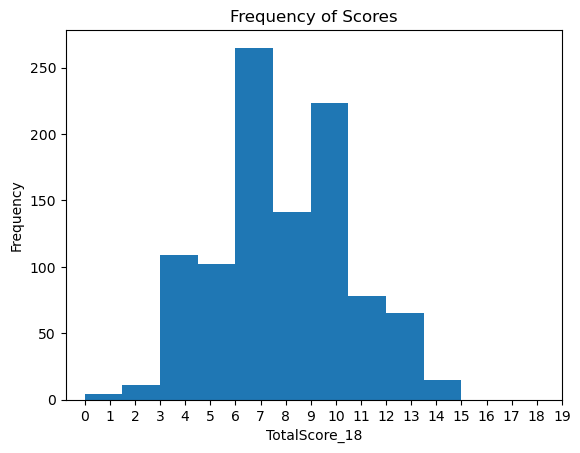

In [32]:
# The following graph represents frequency of each data point on "TotalScore_18" or the total score out of 13 questions across the sample.

df2['TotalScore_18'].plot(kind = 'hist', xticks = np.arange(0, 20, step=1), xlabel = 'TotalScore_18', title = 'Frequency of Scores' )

<Axes: title={'center': 'Absolute mean of scores for above data set'}>

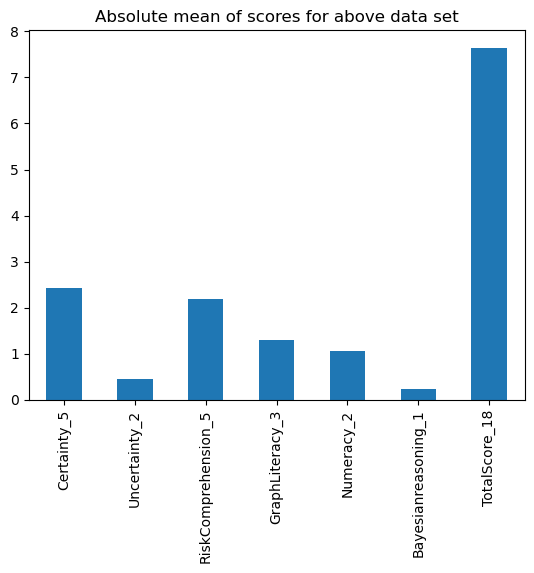

In [33]:
# Absolute mean scores for each facet

(df2[['Certainty_5', 'Uncertainty_2', 'RiskComprehension_5','GraphLiteracy_3','Numeracy_2','Bayesianreasoning_1','TotalScore_18']].mean(axis = 0)).plot(kind = 'bar', title = 'Absolute mean of scores for above data set')

<Axes: title={'center': '% mean of scores for above data set'}>

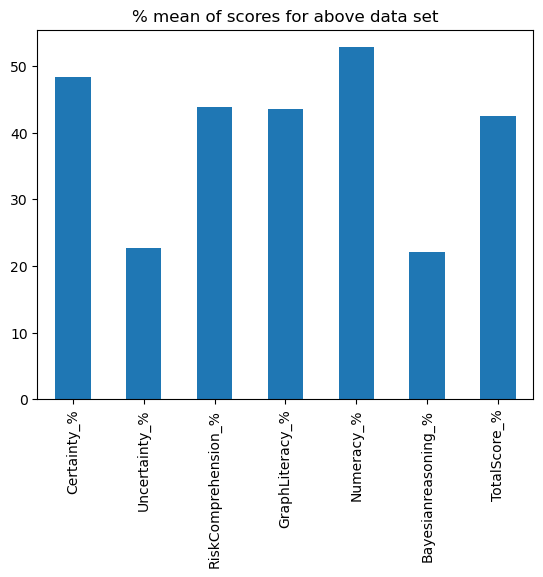

In [34]:
# Normalised mean scores for each facet

df2[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0).plot(kind = 'bar', title = '% mean of scores for above data set')

# ISCED

In [35]:
# Data Frame 5 or df5 is an aggregate data on facet total scores and over all total score, along with  education data vs each response. 
# This data set is now sorted by education.

df5 = df2.sort_values(by = 'isced')
df5 = df5.reset_index(drop = True)

df5

ResponseId   age  age_rec  isced  income  \
0     ssrs382tg88lrssrnbo164l29aginpp7  40.5        3      1       4   
1     o4gmm9twzl8mnxkt4nc3o4gmpxu1o787  30.5        2      1       2   
2     o7cqrckiw88li0ww70jwhb7o7cqrcki9  60.5        4      1       2   
3     obftinjncjw2fkari22ghobfti6alubg  30.5        2      1       3   
4     odfxscnhx6pz1ptrodfxs46gbnyv7ntb  60.5        4      1       2   
...                                ...   ...      ...    ...     ...   
1008  sw8rv2orxir5asm6jn8sw8rv24olibmz  21.5        2      3       1   
1009  t1hiz7zjzou3pfd59pqt1hizrglay7e5  40.5        3      3       1   
1010  tljgvfjwoh3aj1i4hdk8wtphtljgjahd  70.5        4      3       1   
1011                 R_4o6HCiZjPLlcuI1  19.0        2      3       3   
1012                 R_4aQfSYuVQoXAOIh  30.0        2      3       5   

          wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
0     12000000.0            2              0                    4   
1       100000.0            0              0                    1   
2      2000000.0            2              2                    4   
3      5200000.0            2              0                    4   
4      1250000.0            2              1                    2   
...          ...          ...            ...                  ...   
1008     30000.0            1              0                    3   
1009    200000.0            3              0                    1   
1010   2500000.0            2              1                    3   
1011       200.0            4              0                    3   
1012     50000.0            4              1                    2   

      GraphLiteracy_3  Numeracy_2  Bayesianreasoning_1  Certainty_%  \
0                   2           2                    1         40.0   
1                   2           2                    0          0.0   
2                   3           2                    0         40.0   
3                   3           1                    0         40.0   
4                   2           1                    0         40.0   
...               ...         ...                  ...          ...   
1008                0           1                    0         20.0   
1009                2           1                    0         60.0   
1010                3           1                    0         40.0   
1011                0           0                    0         80.0   
1012                1           1                    0         80.0   

      Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0               0.0                 80.0        66.666667       100.0   
1               0.0                 20.0        66.666667       100.0   
2             100.0                 80.0       100.000000       100.0   
3               0.0                 80.0       100.000000        50.0   
4              50.0                 40.0        66.666667        50.0   
...             ...                  ...              ...         ...   
1008            0.0                 60.0         0.000000        50.0   
1009            0.0                 20.0        66.666667        50.0   
1010           50.0                 60.0       100.000000        50.0   
1011            0.0                 60.0         0.000000         0.0   
1012           50.0                 40.0        33.333333        50.0   

      Bayesianreasoning_%  TotalScore_18  TotalScore_%  
0                   100.0             11     61.111111  
1                     0.0              5     27.777778  
2                     0.0             13     72.222222  
3                     0.0             10     55.555556  
4                     0.0              8     44.444444  
...                   ...            ...           ...  
1008                  0.0              5     27.777778  
1009                  0.0              7     38.888889  
1010                  0.0             10     55.555556  
1011                  0.0         

In [36]:
# Mean of each facet as a % for each category of isced

df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean()

Certainty_%  Uncertainty_%  RiskComprehension_%  Numeracy_%  \
isced                                                                
1        44.067797      21.939736            43.766478   52.542373   
2        51.558753      22.182254            44.220624   53.956835   
3        62.461538      33.076923            42.461538   46.923077   

       GraphLiteracy_%  Bayesianreasoning_%  
isced                                        
1            42.247332            19.209040  
2            45.323741            25.659472  
3            42.564103            23.076923

In [37]:
# Count of responses for each category isced

df5.groupby('isced')[['ResponseId']].count()

ResponseId
isced            
1             531
2             417
3              65

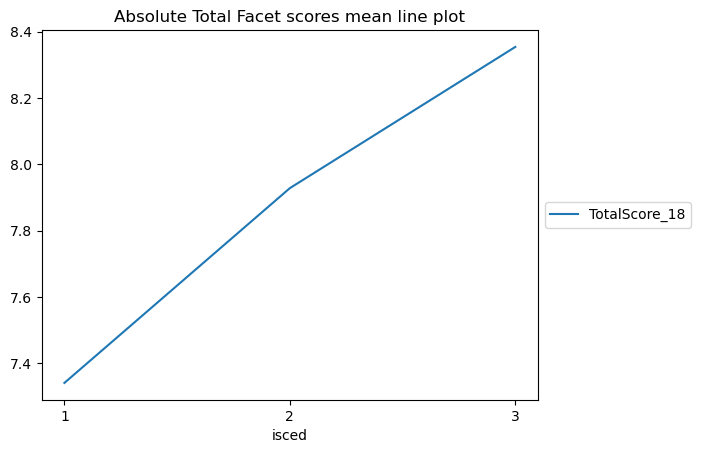

In [38]:
# Absolute Total Facet scores mean line plot from low to high ISCED

df5.groupby('isced')[['TotalScore_18']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

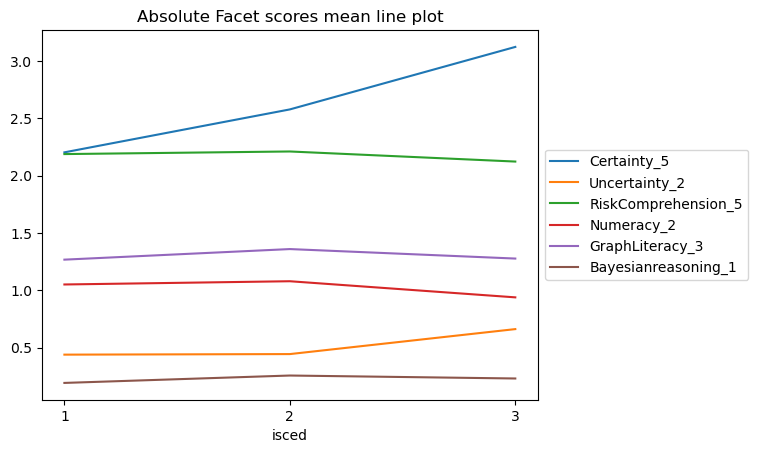

In [39]:
# Absolute Facet scores mean line plot from low to high edu

df5.groupby('isced')[['Certainty_5', "Uncertainty_2", 'RiskComprehension_5','Numeracy_2','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

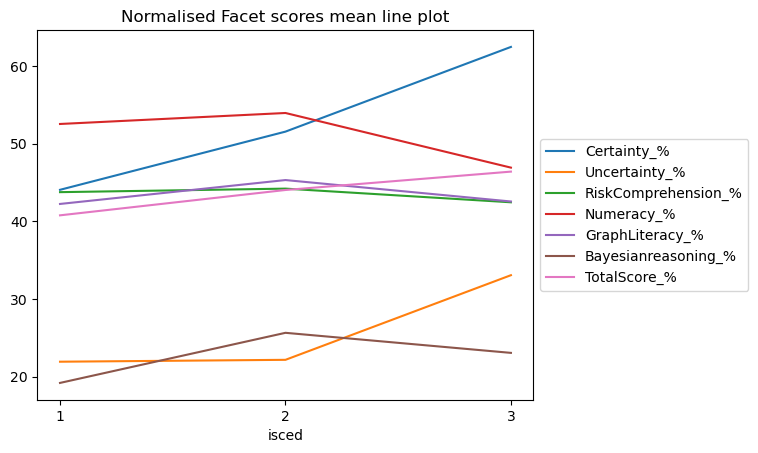

In [40]:
# Normalised Facet scores mean line plot from low to high edu


df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

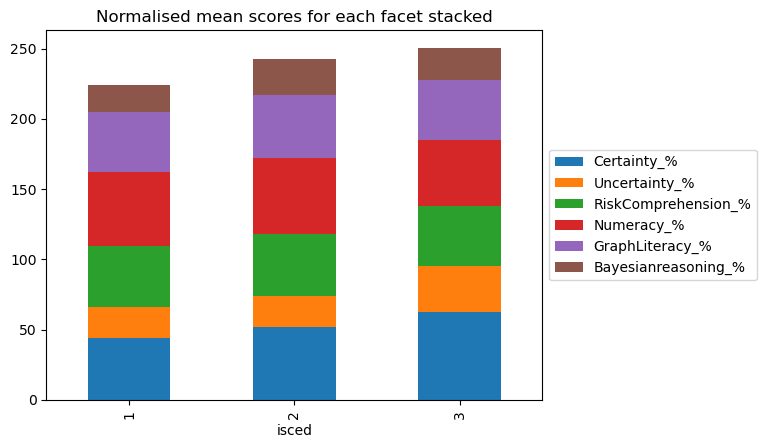

In [41]:
# Normalised mean scores for each facet stacked

df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

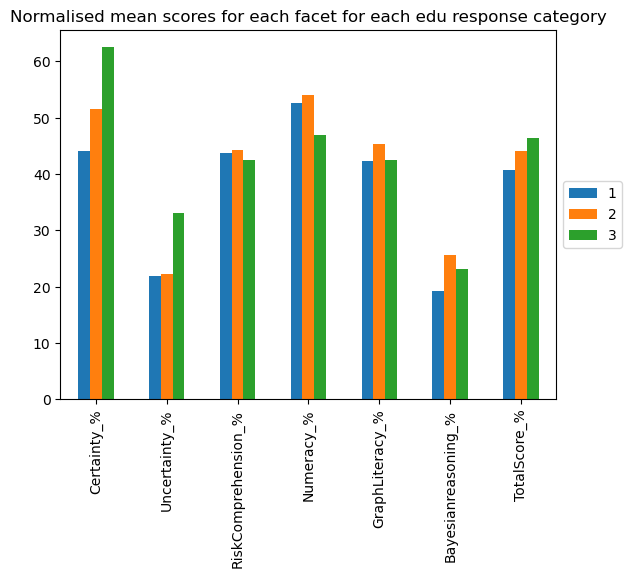

In [42]:
# Normalised mean scores for each facet for each edu response category

df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each edu response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='isced', ylabel='TotalScore_18'>

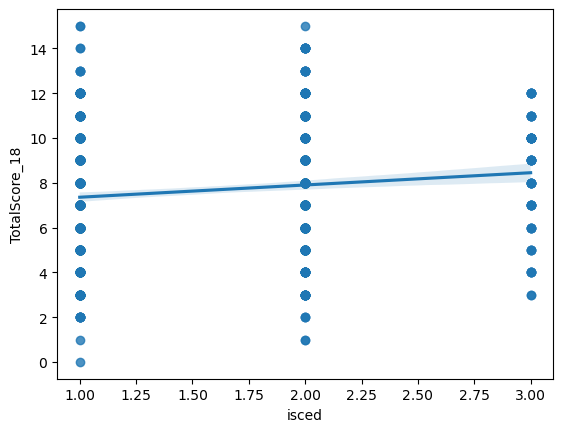

In [43]:
# Trend line for Absolute Total Facet Score vs edu (isced) reponses

sns.regplot (data = df5, x = 'isced', y = 'TotalScore_18')

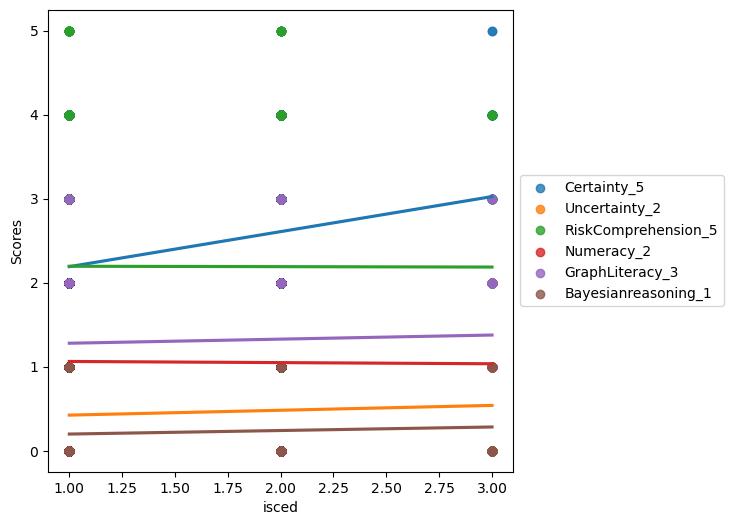

In [44]:
# Trend line for Absolute Independent Facet Score vs edu (isced) reponses

fig, ax6 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df5, x = 'isced', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax6, label='Certainty_5')
sns.regplot (data = df5, x = 'isced', y = 'Uncertainty_2', fit_reg=True, ci=None, ax=ax6, label='Uncertainty_2')
sns.regplot (data = df5, x = 'isced', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax6, label='RiskComprehension_5')
sns.regplot (data = df5, x = 'isced', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax6, label='Numeracy_2')
sns.regplot (data = df5, x = 'isced', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax6, label='GraphLiteracy_3')
sns.regplot (data = df5, x = 'isced', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax6, label='Bayesianreasoning_1' )

ax6.set(ylabel='Scores', xlabel='isced')
ax6.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='isced', ylabel='TotalScore_18'>

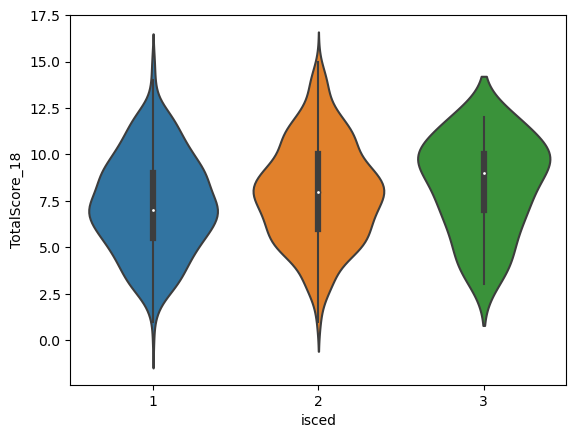

In [45]:
# Violine Plot for TotalScore_18 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'TotalScore_18')

<Axes: xlabel='isced', ylabel='Certainty_5'>

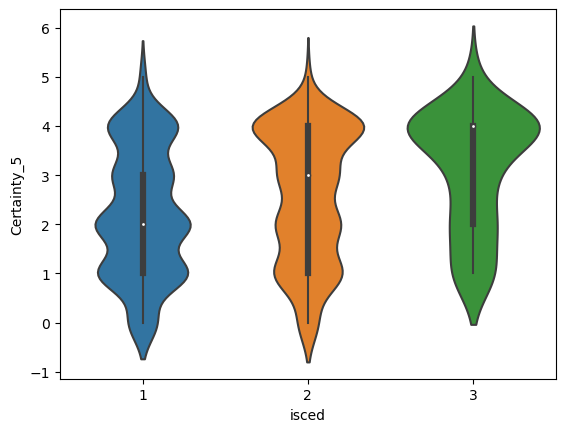

In [46]:
# Violine Plot for Certainty_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Certainty_5')

<Axes: xlabel='isced', ylabel='Uncertainty_2'>

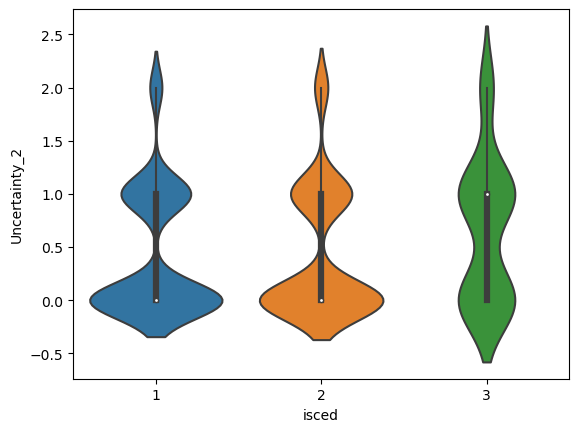

In [47]:
# Violine Plot for Uncertainty_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Uncertainty_2')

<Axes: xlabel='isced', ylabel='RiskComprehension_5'>

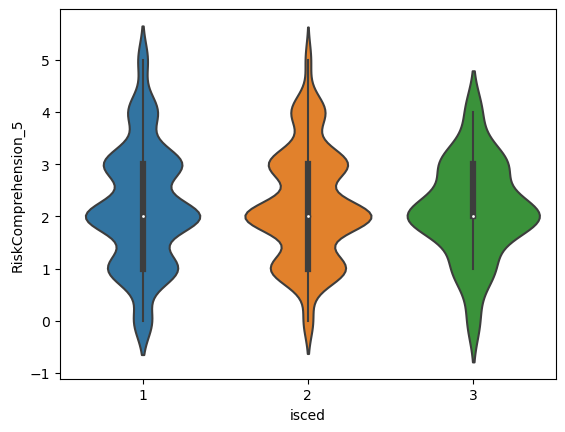

In [48]:
# Violine Plot for RiskComprehension_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'RiskComprehension_5')

<Axes: xlabel='isced', ylabel='GraphLiteracy_3'>

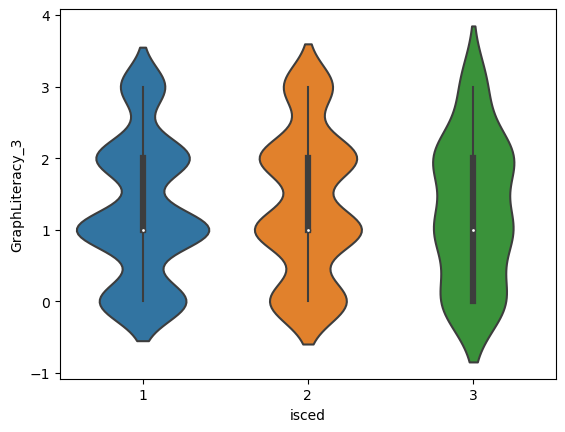

In [49]:
# Violine Plot for GraphLiteracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'GraphLiteracy_3')

<Axes: xlabel='isced', ylabel='Numeracy_2'>

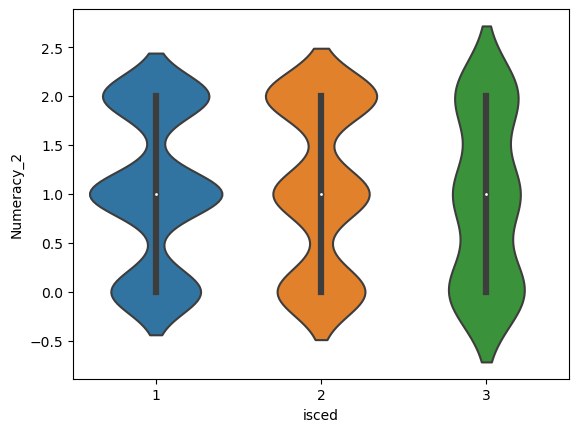

In [50]:
# Violine Plot for Numeracy_2 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Numeracy_2')

<Axes: xlabel='isced', ylabel='Bayesianreasoning_1'>

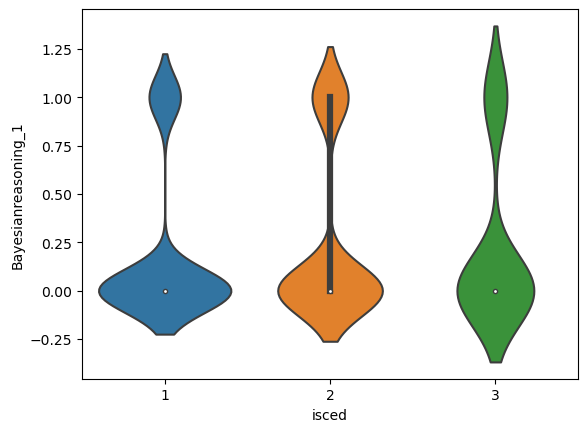

In [51]:
# Violine Plot for TotalScore_18 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Bayesianreasoning_1')

## INCOME

### INCOME VS SCORES

In [52]:
# DF3 = Sorted by income

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)

df3

ResponseId   age  age_rec  isced  income  \
0                    R_8taN3wUPbeZMxzM  20.0        2      2       1   
1     ge86fdpv5rtmpinge86emnjyhll5bbdk  21.5        2      2       1   
2                    R_4EaOO3SIpDoBOQ7  33.0        2      2       1   
3                    R_4Eb3NIVRk3rmBtq  21.0        2      2       1   
4                    R_4Ecp6YekNbrMCwi  39.0        3      1       1   
...                                ...   ...      ...    ...     ...   
1008  itawpb9x0ksqi4c429ubyitaw8d0isk8  30.5        2      1       5   
1009                 R_4mtTWcGW77ib4fT  70.0        4      1       5   
1010  i4ipejjfq0rnwbbi4ipe025xluvm5s8d  40.5        3      1       5   
1011  gs539g4qtok8tm7rmcjegs539g7ozj75  50.5        3      1       5   
1012  f14uszmzhoujwobpkif14uszd4f33ehs  50.5        3      1       5   

          wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
0        10000.0            4              1                    2   
1       500000.0            1              0                    3   
2      2500000.0            2              2                    4   
3        50000.0            4              0                    2   
4       165000.0            4              0                    1   
...          ...          ...            ...                  ...   
1008   9000000.0            0              1                    3   
1009   7465000.0            4              0                    2   
1010    850000.0            1              0                    2   
1011  10000000.0            2              0                    2   
1012    500000.0            3              0                    0   

      GraphLiteracy_3  Numeracy_2  Bayesianreasoning_1  Certainty_%  \
0                   2           1                    1         80.0   
1                   1           2                    0         20.0   
2                   3           2                    1         40.0   
3                   0           0                    0         80.0   
4                   1           1                    0         80.0   
...               ...         ...                  ...          ...   
1008                1           1                    0          0.0   
1009                0           2                    0         80.0   
1010                0           0                    0         20.0   
1011                1           1                    1         40.0   
1012                2           0                    0         60.0   

      Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0              50.0                 40.0        66.666667        50.0   
1               0.0                 60.0        33.333333       100.0   
2             100.0                 80.0       100.000000       100.0   
3               0.0                 40.0         0.000000         0.0   
4               0.0                 20.0        33.333333        50.0   
...             ...                  ...              ...         ...   
1008           50.0                 60.0        33.333333        50.0   
1009            0.0                 40.0         0.000000       100.0   
1010            0.0                 40.0         0.000000         0.0   
1011            0.0                 40.0        33.333333        50.0   
1012            0.0                  0.0        66.666667         0.0   

      Bayesianreasoning_%  TotalScore_18  TotalScore_%  
0                   100.0             11     61.111111  
1                     0.0              7     38.888889  
2                   100.0             14     77.777778  
3                     0.0              6     33.333333  
4                     0.0              7     38.888889  
...                   ...            ...           ...  
1008                  0.0              6     33.333333  
1009                  0.0              8     44.444444  
1010                  0.0              3     16.666667  
1011                100.0         

In [53]:
# Normalised mean of each facet as a numerical (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean()

Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
income                                                                  
1         57.592593            43.271605        47.016461   52.623457   
2         44.392765            44.392765        44.961240   55.943152   
3         45.256410            46.282051        39.316239   49.679487   
4         40.618557            42.268041        37.800687   48.453608   
5         43.265306            39.183673        34.013605   46.938776   

        Bayesianreasoning_%  TotalScore_%  
income                                     
1                 24.691358     46.004801  
2                 20.671835     41.903531  
3                 20.512821     40.954416  
4                 20.618557     38.144330  
5                 24.489796     37.301587

In [54]:
# Count of responses for each category (sorted by income)

df3.groupby('income')[['ResponseId']].count()

ResponseId
income            
1              324
2              387
3              156
4               97
5               49

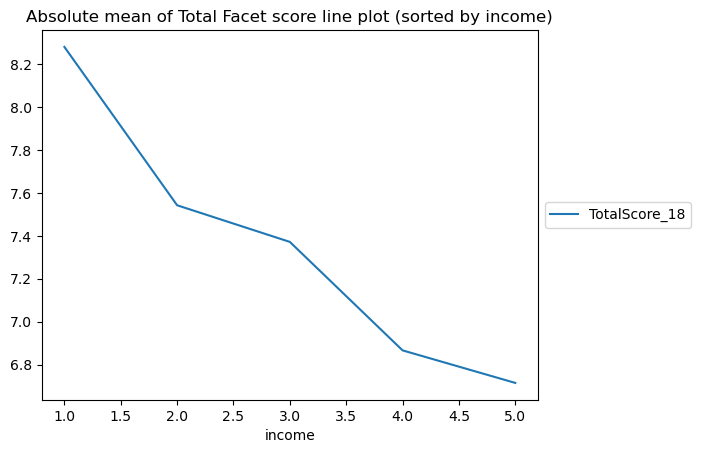

In [55]:
# Absolute mean of Total Facet score line plot (sorted by income)

df3.groupby('income')[['TotalScore_18']].mean().plot( kind = 'line', title = 'Absolute mean of Total Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

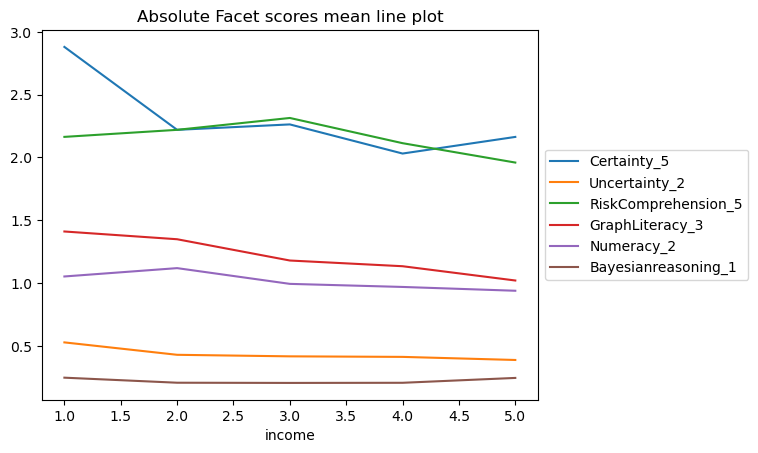

In [56]:
# Absolute mean of each Facet score line plot (sorted by income)

df3.groupby('income')[['Certainty_5', "Uncertainty_2", 'RiskComprehension_5','GraphLiteracy_3','Numeracy_2','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

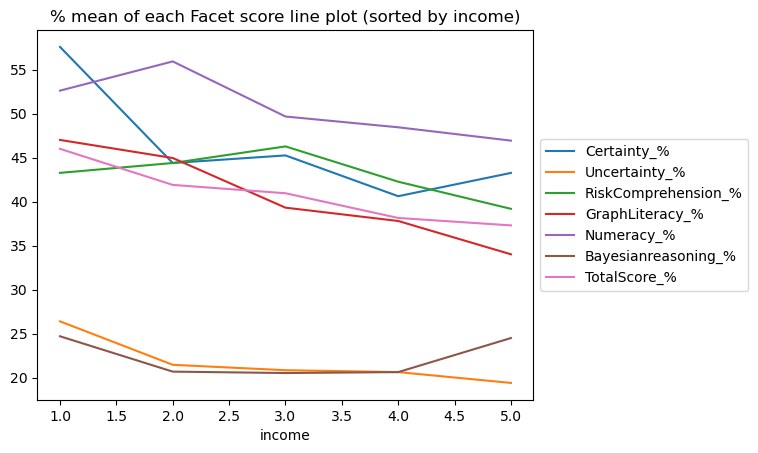

In [57]:
# Normalised mean of each Facet score line plot (sorted by income)


df3.groupby('income')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%', 'TotalScore_%']].mean().plot( kind = 'line', title = '% mean of each Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

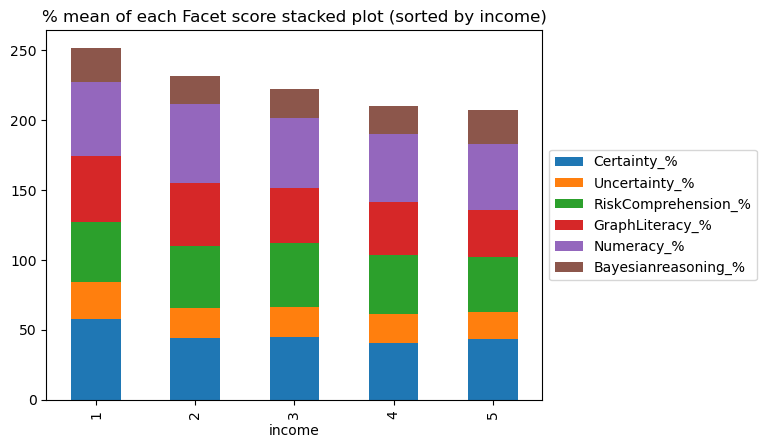

In [58]:
# Normalised mean of each Facet score stacked plot (sorted by income)

df3.groupby('income')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = '% mean of each Facet score stacked plot (sorted by income)', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

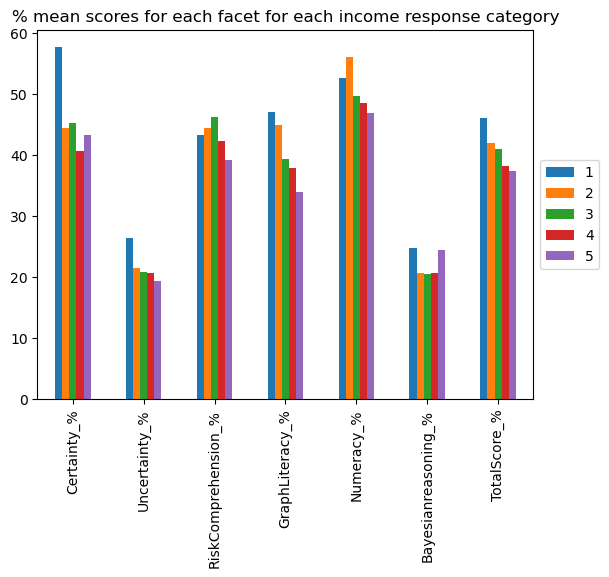

In [59]:
# Normalised mean of each Facet score hist plot (sorted by income)

df3.groupby('income')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = '% mean scores for each facet for each income response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='income', ylabel='TotalScore_18'>

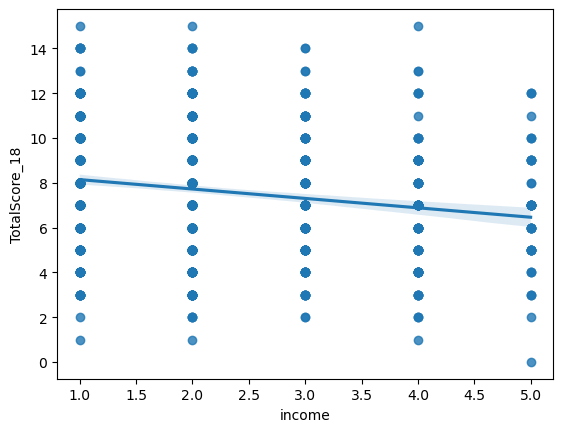

In [60]:
# Trend line for Absolute Total Facet Score vs income

sns.regplot (data = df3, x = 'income', y = 'TotalScore_18')

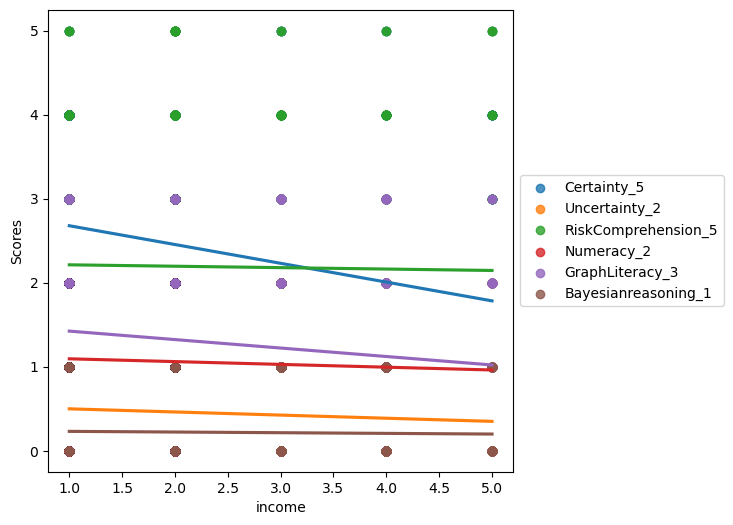

In [61]:
# Trend line for Absolute Independent Facet Score vs income reponses

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot (data = df3, x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax, label='Certainty_5')
sns.regplot (data = df3, x = 'income', y = 'Uncertainty_2', fit_reg=True, ci=None, ax=ax, label='Uncertainty_2')
sns.regplot (data = df3, x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax, label='RiskComprehension_5')
sns.regplot (data = df3, x = 'income', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax, label='Numeracy_2')
sns.regplot (data = df3, x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax, label='GraphLiteracy_3')
sns.regplot (data = df3, x = 'income', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax, label='Bayesianreasoning_1' )

ax.set(ylabel='Scores', xlabel='income')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='income', ylabel='TotalScore_18'>

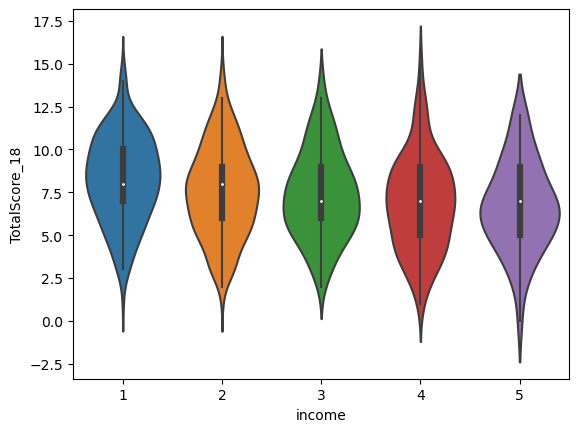

In [62]:
# Violin Plot for TotalScore_18 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'TotalScore_18')

<Axes: xlabel='income', ylabel='Certainty_5'>

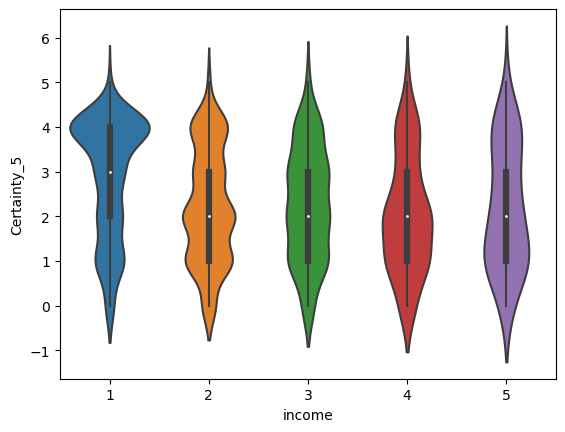

In [63]:
# Violin Plot for Certainty_5 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Certainty_5')

<Axes: xlabel='income', ylabel='Uncertainty_2'>

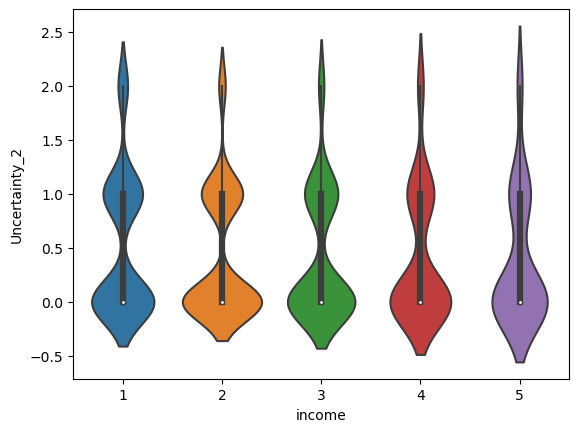

In [64]:
# Violin Plot for Certainty_5 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Uncertainty_2')

<Axes: xlabel='income', ylabel='RiskComprehension_5'>

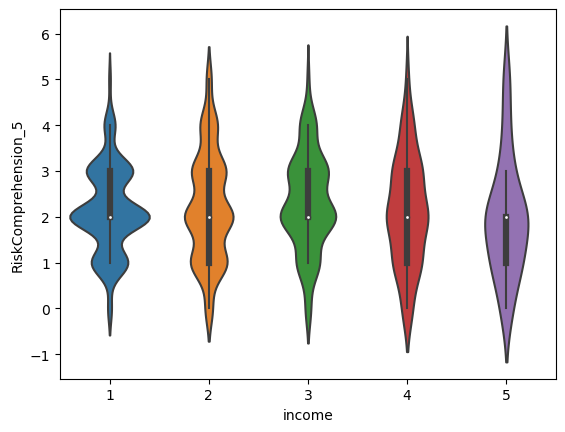

In [65]:
# Violine Plot for RiskComprehension_5 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'RiskComprehension_5')

<Axes: xlabel='income', ylabel='GraphLiteracy_3'>

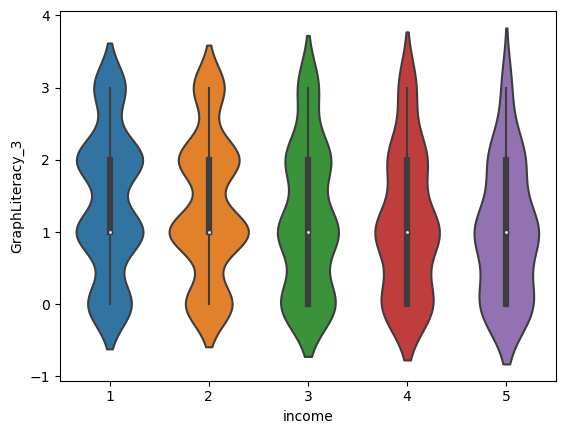

In [66]:
# Violine Plot for GraphLiteracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'GraphLiteracy_3')

<Axes: xlabel='income', ylabel='Numeracy_2'>

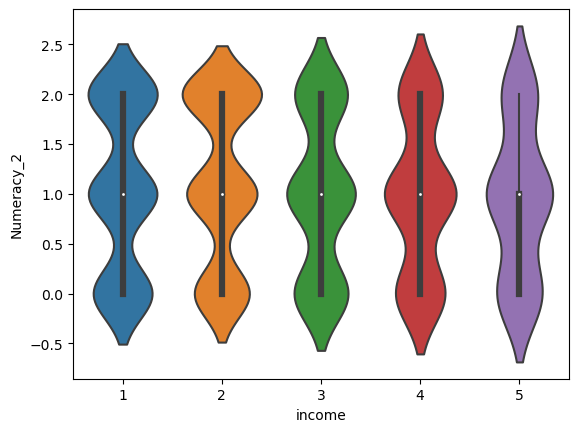

In [67]:
# Violine Plot for Numeracy_2 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Numeracy_2')

<Axes: xlabel='income', ylabel='Bayesianreasoning_1'>

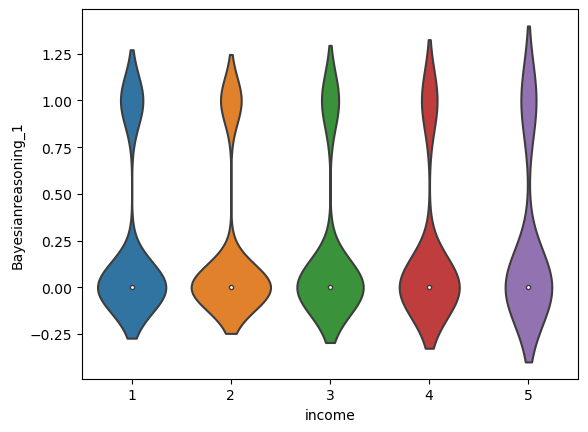

In [68]:
# Violine Plot for TotalScore_18 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Bayesianreasoning_1')

### INCOME vs SCORES w/ ISCED classification

In [69]:
# Descriptive stats for the data set, isced = 1
# NA values of income are removed

df7 = df5
df7.drop(df7[df7['income'] == 7].index, inplace = True)

df7.loc[df7['isced']==1].describe()

age     age_rec  isced      income        wealth  Certainty_5  \
count  531.000000  531.000000  531.0  531.000000  5.310000e+02   531.000000   
mean    34.803202    2.425612    1.0    2.448211  1.043356e+07     2.203390   
std      9.256072    0.562695    0.0    1.120416  4.024320e+07     1.290045   
min     18.000000    2.000000    1.0    1.000000  0.000000e+00     0.000000   
25%     30.500000    2.000000    1.0    2.000000  4.000000e+05     1.000000   
50%     30.500000    2.000000    1.0    2.000000  1.500000e+06     2.000000   
75%     40.500000    3.000000    1.0    3.000000  6.000000e+06     3.000000   
max     70.500000    4.000000    1.0    5.000000  5.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     531.000000           531.000000       531.000000  531.000000   
mean        0.438795             2.188324         1.267420    1.050847   
std         0.599938             1.138658         0.965466    0.771701   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count           531.000000   531.000000     531.000000           531.000000   
mean              0.192090    44.067797      21.939736            43.766478   
std               0.394315    25.800891      29.996920            22.773165   
min               0.000000     0.000000       0.000000             0.000000   
25%               0.000000    20.000000       0.000000            20.000000   
50%               0.000000    40.000000       0.000000            40.000000   
75%               0.000000    60.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       531.000000  531.000000           531.000000     531.000000   
mean         42.247332   52.542373            19.209040       7.340866   
std          32.182211   38.585064            39.431522       2.622581   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333    0.000000             0.000000       5.500000   
50%          33.333333   50.000000             0.000000       7.000000   
75%          66.666667  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  
count    531.000000  
mean      40.782591  
std       14.569894  
min        0.000000  
25%       30.555556  
50%       38.888889  
75%       50.000000  
max       83.333333

In [70]:
df7.loc[df7['isced']==2].describe()

age     age_rec  isced      income        wealth  Certainty_5  \
count  417.000000  417.000000  417.0  417.000000  4.170000e+02   417.000000   
mean    30.781775    2.263789    2.0    1.896882  9.459245e+06     2.577938   
std      9.887607    0.507120    0.0    1.031436  4.913786e+07     1.335280   
min     18.000000    2.000000    2.0    1.000000  0.000000e+00     0.000000   
25%     22.000000    2.000000    2.0    1.000000  2.000000e+05     1.000000   
50%     30.500000    2.000000    2.0    2.000000  6.900000e+05     3.000000   
75%     34.000000    2.000000    2.0    2.000000  4.000000e+06     4.000000   
max     70.000000    4.000000    2.0    5.000000  6.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     417.000000           417.000000       417.000000  417.000000   
mean        0.443645             2.211031         1.359712    1.079137   
std         0.618088             1.050903         0.997645    0.818048   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count           417.000000   417.000000     417.000000           417.000000   
mean              0.256595    51.558753      22.182254            44.220624   
std               0.437278    26.705607      30.904402            21.018061   
min               0.000000     0.000000       0.000000             0.000000   
25%               0.000000    20.000000       0.000000            20.000000   
50%               0.000000    60.000000       0.000000            40.000000   
75%               1.000000    80.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       417.000000  417.000000           417.000000     417.000000   
mean         45.323741   53.956835            25.659472       7.928058   
std          33.254842   40.902417            43.727842       2.670999   
min           0.000000    0.000000             0.000000       1.000000   
25%          33.333333    0.000000             0.000000       6.000000   
50%          33.333333   50.000000             0.000000       8.000000   
75%          66.666667  100.000000           100.000000      10.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  
count    417.000000  
mean      44.044764  
std       14.838883  
min        5.555556  
25%       33.333333  
50%       44.444444  
75%       55.555556  
max       83.333333

In [71]:
df7.loc[df7['isced']==3].describe()

age    age_rec  isced     income        wealth  Certainty_5  \
count  65.000000  65.000000   65.0  65.000000  6.500000e+01    65.000000   
mean   27.138462   2.230769    3.0   1.661538  3.763119e+06     3.123077   
std    12.124519   0.580119    0.0   1.135739  1.307520e+07     1.192525   
min    16.000000   0.000000    3.0   1.000000  0.000000e+00     1.000000   
25%    19.000000   2.000000    3.0   1.000000  5.000000e+04     2.000000   
50%    21.500000   2.000000    3.0   1.000000  2.000000e+05     4.000000   
75%    30.500000   2.000000    3.0   2.000000  2.000000e+06     4.000000   
max    70.500000   4.000000    3.0   5.000000  1.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count      65.000000            65.000000        65.000000   65.000000   
mean        0.661538             2.123077         1.276923    0.938462   
std         0.667947             0.910146         0.976404    0.826834   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             2.000000         0.000000    0.000000   
50%         1.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             4.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count            65.000000    65.000000      65.000000            65.000000   
mean              0.230769    62.461538      33.076923            42.461538   
std               0.424604    23.850496      33.397374            18.202916   
min               0.000000    20.000000       0.000000             0.000000   
25%               0.000000    40.000000       0.000000            40.000000   
50%               0.000000    80.000000      50.000000            40.000000   
75%               0.000000    80.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000            80.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count        65.000000   65.000000            65.000000      65.000000   
mean         42.564103   46.923077            23.076923       8.353846   
std          32.546810   41.341681            42.460389       2.546019   
min           0.000000    0.000000             0.000000       3.000000   
25%           0.000000    0.000000             0.000000       7.000000   
50%          33.333333   50.000000             0.000000       9.000000   
75%          66.666667  100.000000             0.000000      10.000000   
max         100.000000  100.000000           100.000000      12.000000   

       TotalScore_%  
count     65.000000  
mean      46.410256  
std       14.144549  
min       16.666667  
25%       38.888889  
50%       50.000000  
75%       55.555556  
max       66.666667

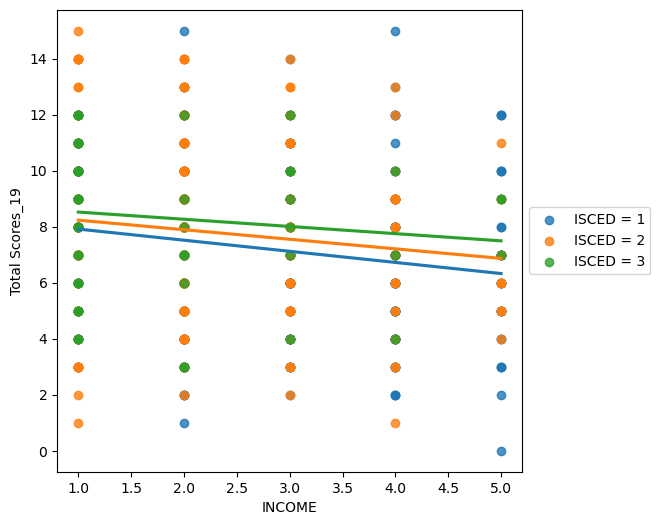

In [72]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==1]['TotalScore_18'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==2]['TotalScore_18'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==3]['TotalScore_18'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='INCOME')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

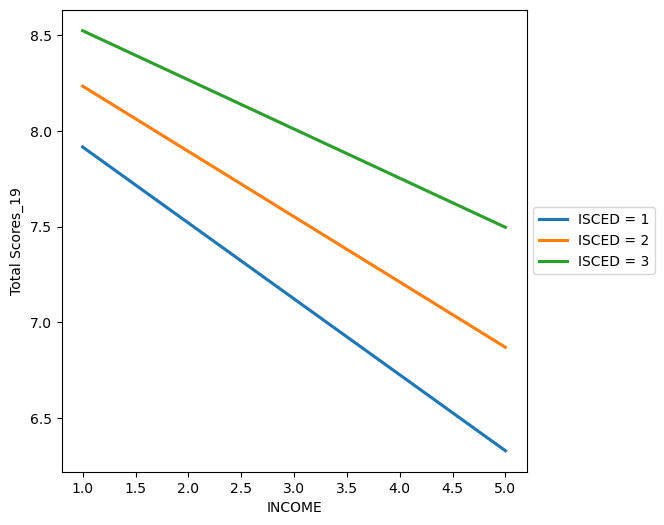

In [73]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='INCOME')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

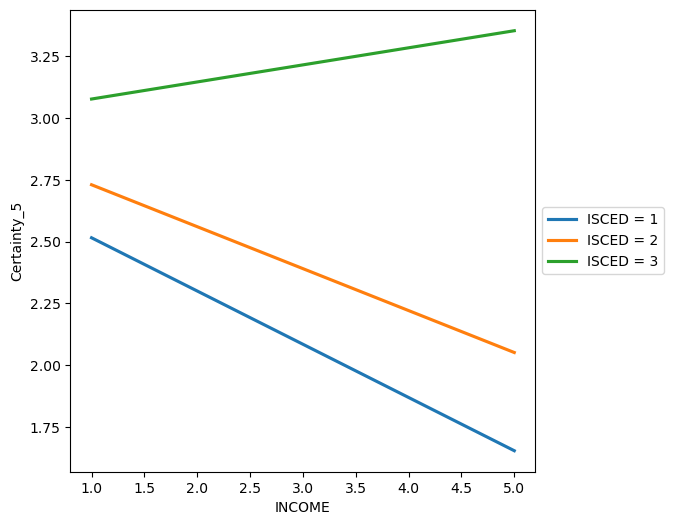

In [74]:
# Trend line for Absolute Certainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_5', xlabel='INCOME')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

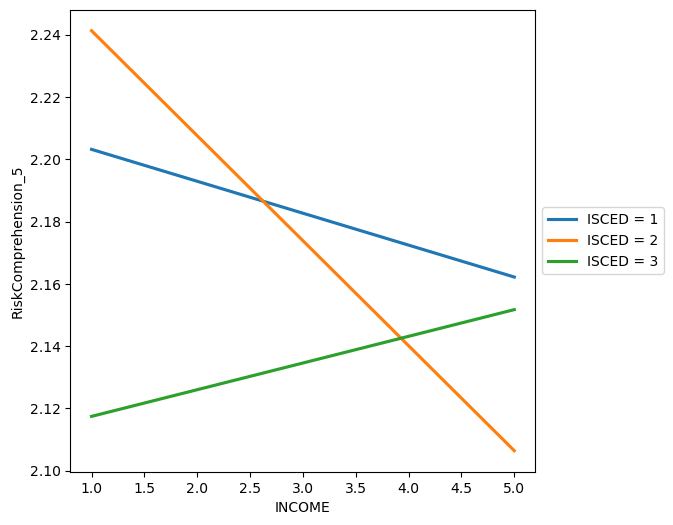

In [75]:
# Trend line for Absolute Risk Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_5', xlabel='INCOME')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

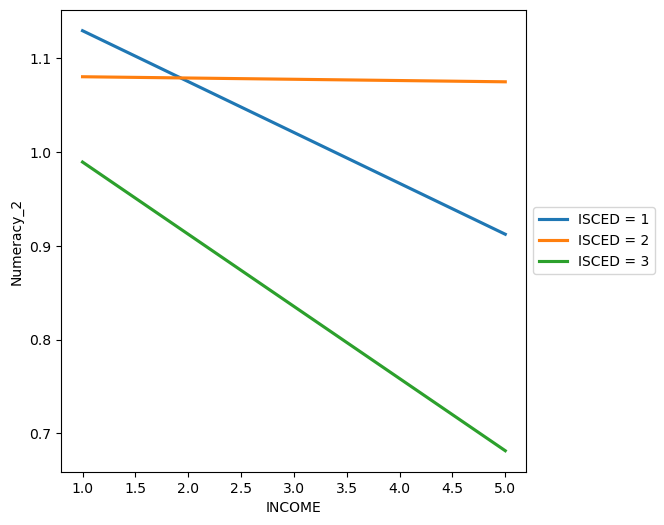

In [76]:
# Trend line for Absolute Number Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_2', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

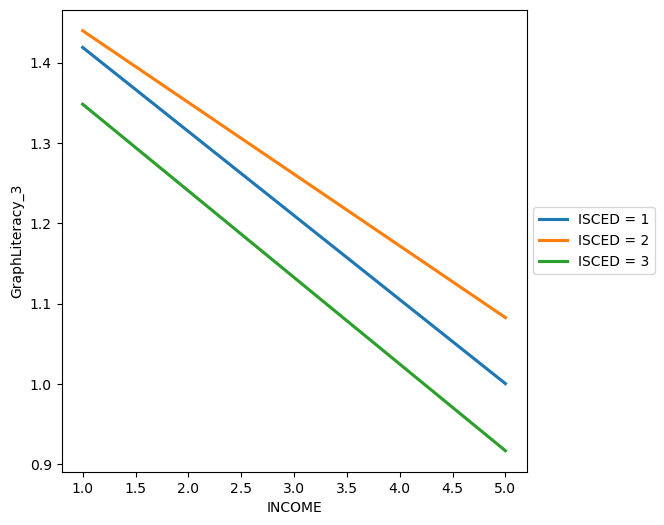

In [77]:
# Trend line for Absolute Graph Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

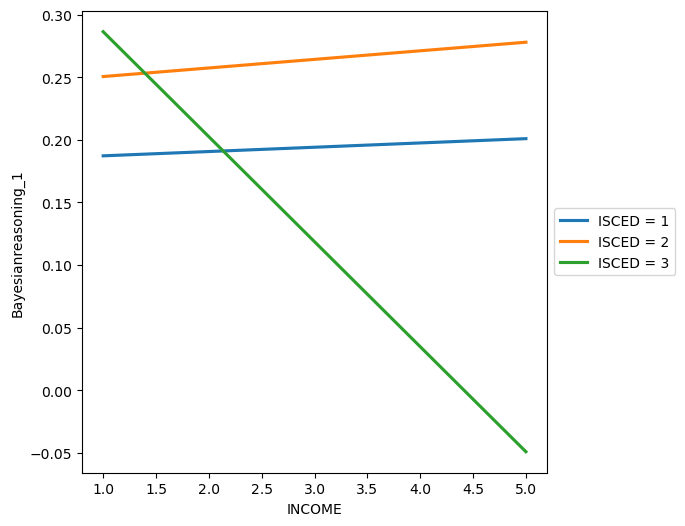

In [78]:
# Trend line for Absolute Bayesian Reasoning Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='INCOME')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### INCOME vs SCORES w/ ISCED and AGE based classification 

In [79]:
df7

ResponseId   age  age_rec  isced  income  \
0     ssrs382tg88lrssrnbo164l29aginpp7  40.5        3      1       4   
1     o4gmm9twzl8mnxkt4nc3o4gmpxu1o787  30.5        2      1       2   
2     o7cqrckiw88li0ww70jwhb7o7cqrcki9  60.5        4      1       2   
3     obftinjncjw2fkari22ghobfti6alubg  30.5        2      1       3   
4     odfxscnhx6pz1ptrodfxs46gbnyv7ntb  60.5        4      1       2   
...                                ...   ...      ...    ...     ...   
1008  sw8rv2orxir5asm6jn8sw8rv24olibmz  21.5        2      3       1   
1009  t1hiz7zjzou3pfd59pqt1hizrglay7e5  40.5        3      3       1   
1010  tljgvfjwoh3aj1i4hdk8wtphtljgjahd  70.5        4      3       1   
1011                 R_4o6HCiZjPLlcuI1  19.0        2      3       3   
1012                 R_4aQfSYuVQoXAOIh  30.0        2      3       5   

          wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
0     12000000.0            2              0                    4   
1       100000.0            0              0                    1   
2      2000000.0            2              2                    4   
3      5200000.0            2              0                    4   
4      1250000.0            2              1                    2   
...          ...          ...            ...                  ...   
1008     30000.0            1              0                    3   
1009    200000.0            3              0                    1   
1010   2500000.0            2              1                    3   
1011       200.0            4              0                    3   
1012     50000.0            4              1                    2   

      GraphLiteracy_3  Numeracy_2  Bayesianreasoning_1  Certainty_%  \
0                   2           2                    1         40.0   
1                   2           2                    0          0.0   
2                   3           2                    0         40.0   
3                   3           1                    0         40.0   
4                   2           1                    0         40.0   
...               ...         ...                  ...          ...   
1008                0           1                    0         20.0   
1009                2           1                    0         60.0   
1010                3           1                    0         40.0   
1011                0           0                    0         80.0   
1012                1           1                    0         80.0   

      Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0               0.0                 80.0        66.666667       100.0   
1               0.0                 20.0        66.666667       100.0   
2             100.0                 80.0       100.000000       100.0   
3               0.0                 80.0       100.000000        50.0   
4              50.0                 40.0        66.666667        50.0   
...             ...                  ...              ...         ...   
1008            0.0                 60.0         0.000000        50.0   
1009            0.0                 20.0        66.666667        50.0   
1010           50.0                 60.0       100.000000        50.0   
1011            0.0                 60.0         0.000000         0.0   
1012           50.0                 40.0        33.333333        50.0   

      Bayesianreasoning_%  TotalScore_18  TotalScore_%  
0                   100.0             11     61.111111  
1                     0.0              5     27.777778  
2                     0.0             13     72.222222  
3                     0.0             10     55.555556  
4                     0.0              8     44.444444  
...                   ...            ...           ...  
1008                  0.0              5     27.777778  
1009                  0.0              7     38.888889  
1010                  0.0             10     55.555556  
1011                  0.0         

In [80]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [81]:
df7.loc[(df7['age_rec']==2)].describe()

age  age_rec       isced      income        wealth  Certainty_5  \
count  693.000000    693.0  693.000000  693.000000  6.930000e+02   693.000000   
mean    27.116162      2.0    1.603175    2.059163  7.513477e+06     2.473304   
std      4.547104      0.0    0.617511    1.083624  3.290550e+07     1.350849   
min     18.000000      2.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     22.000000      2.0    1.000000    1.000000  2.000000e+05     1.000000   
50%     30.500000      2.0    2.000000    2.000000  8.000000e+05     2.000000   
75%     30.500000      2.0    2.000000    3.000000  3.500000e+06     4.000000   
max     35.000000      2.0    3.000000    5.000000  5.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     693.000000           693.000000       693.000000  693.000000   
mean        0.458874             2.155844         1.326118    1.057720   
std         0.629338             1.069256         0.978303    0.802535   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count            693.00000   693.000000     693.000000           693.000000   
mean               0.23088    49.466089      22.943723            43.116883   
std                0.42170    27.016973      31.466902            21.385112   
min                0.00000     0.000000       0.000000             0.000000   
25%                0.00000    20.000000       0.000000            20.000000   
50%                0.00000    40.000000       0.000000            40.000000   
75%                0.00000    80.000000      50.000000            60.000000   
max                1.00000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       693.000000  693.000000           693.000000     693.000000   
mean         44.203944   52.886003            23.088023       7.702742   
std          32.610103   40.126750            42.170032       2.639946   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333    0.000000             0.000000       6.000000   
50%          33.333333   50.000000             0.000000       8.000000   
75%          66.666667  100.000000             0.000000      10.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  
count    693.000000  
mean      42.793009  
std       14.666365  
min        0.000000  
25%       33.333333  
50%       44.444444  
75%       55.555556  
max       83.333333

In [82]:
df7.loc[(df7['age_rec']==3)].describe()

age  age_rec       isced      income        wealth  Certainty_5  \
count  285.000000    285.0  285.000000  285.000000  2.850000e+02   285.000000   
mean    42.577193      3.0    1.385965    2.445614  1.463604e+07     2.277193   
std      4.501683      0.0    0.573916    1.166442  6.251005e+07     1.298837   
min     36.000000      3.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     40.500000      3.0    1.000000    2.000000  3.000000e+05     1.000000   
50%     40.500000      3.0    1.000000    2.000000  2.000000e+06     2.000000   
75%     44.000000      3.0    2.000000    3.000000  7.500000e+06     3.000000   
max     54.000000      3.0    3.000000    5.000000  6.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     285.000000           285.000000       285.000000  285.000000   
mean        0.445614             2.266667         1.235088    1.042105   
std         0.576558             1.109710         0.984473    0.781599   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             2.000000         0.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count           285.000000   285.000000     285.000000           285.000000   
mean              0.196491    45.543860      22.280702            45.333333   
std               0.398043    25.976744      28.827898            22.194192   
min               0.000000     0.000000       0.000000             0.000000   
25%               0.000000    20.000000       0.000000            40.000000   
50%               0.000000    40.000000       0.000000            40.000000   
75%               0.000000    60.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       285.000000  285.000000           285.000000     285.000000   
mean         41.169591   52.105263            19.649123       7.463158   
std          32.815766   39.079949            39.804315       2.706840   
min           0.000000    0.000000             0.000000       1.000000   
25%           0.000000    0.000000             0.000000       5.000000   
50%          33.333333   50.000000             0.000000       7.000000   
75%          66.666667  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  
count    285.000000  
mean      41.461988  
std       15.038000  
min        5.555556  
25%       27.777778  
50%       38.888889  
75%       50.000000  
max       83.333333

In [83]:
df7.loc[(df7['age_rec']==4)].describe()

age  age_rec      isced     income        wealth  Certainty_5  \
count  34.000000     34.0  34.000000  34.000000  3.400000e+01    34.000000   
mean   62.897059      4.0   1.500000   2.176471  1.032985e+07     2.382353   
std     4.344588      0.0   0.615457   1.217812  1.451734e+07     0.953930   
min    57.000000      4.0   1.000000   1.000000  1.000000e+05     1.000000   
25%    60.500000      4.0   1.000000   1.000000  1.437500e+06     2.000000   
50%    60.500000      4.0   1.000000   2.000000  6.000000e+06     2.000000   
75%    64.250000      4.0   2.000000   2.000000  1.000000e+07     3.000000   
max    70.500000      4.0   3.000000   5.000000  5.250000e+07     4.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count      34.000000            34.000000        34.000000   34.000000   
mean        0.441176             2.323529         1.529412    1.117647   
std         0.612554             1.296162         0.928841    0.769286   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    1.000000   
50%         0.000000             2.000000         2.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count            34.000000    34.000000      34.000000            34.000000   
mean              0.235294    47.647059      22.058824            46.470588   
std               0.430562    19.078597      30.627717            25.923238   
min               0.000000    20.000000       0.000000             0.000000   
25%               0.000000    40.000000       0.000000            20.000000   
50%               0.000000    40.000000       0.000000            40.000000   
75%               0.000000    60.000000      50.000000            60.000000   
max               1.000000    80.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count        34.000000   34.000000            34.000000      34.000000   
mean         50.980392   55.882353            23.529412       8.029412   
std          30.961358   38.464281            43.056155       2.587678   
min           0.000000    0.000000             0.000000       3.000000   
25%          33.333333   50.000000             0.000000       6.000000   
50%          66.666667   50.000000             0.000000       7.500000   
75%          66.666667  100.000000             0.000000      10.000000   
max         100.000000  100.000000           100.000000      13.000000   

       TotalScore_%  
count     34.000000  
mean      44.607843  
std       14.375990  
min       16.666667  
25%       33.333333  
50%       41.666667  
75%       55.555556  
max       72.222222

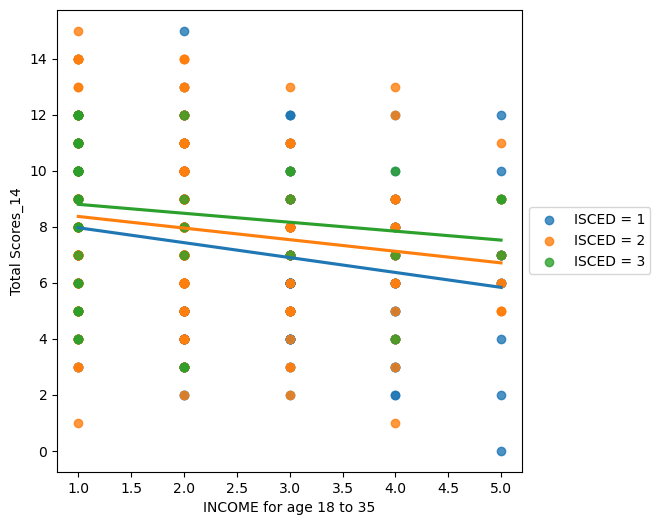

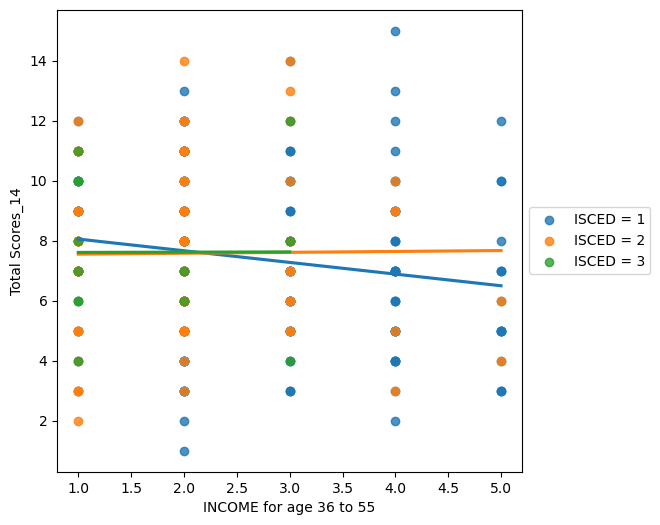

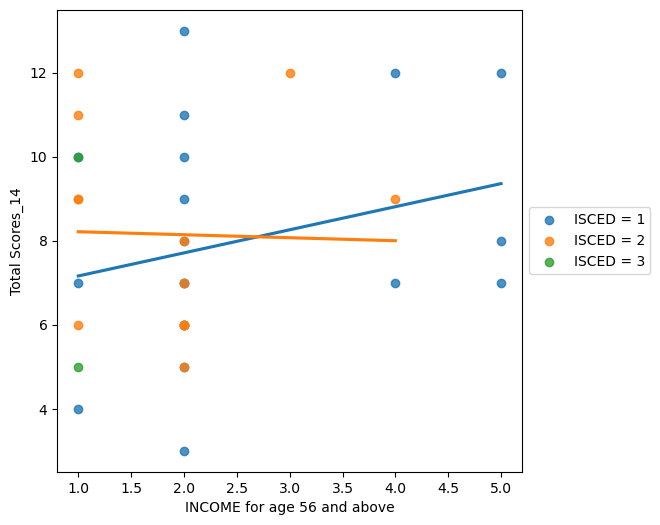

In [84]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='INCOME for age 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME for age 36 to 55')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME for age 56 and above')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

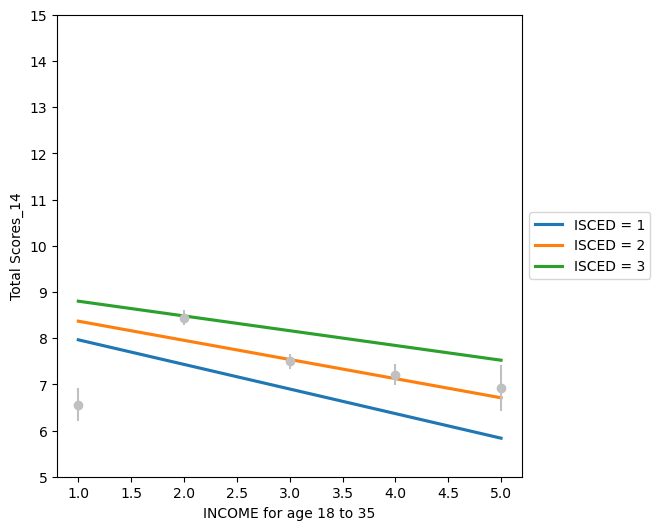

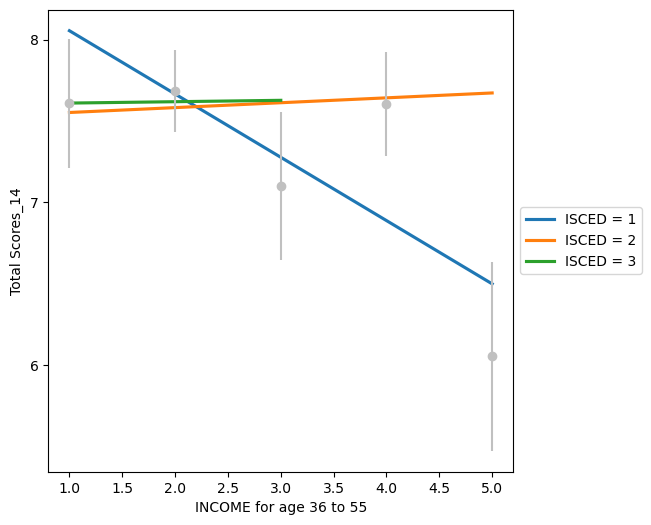

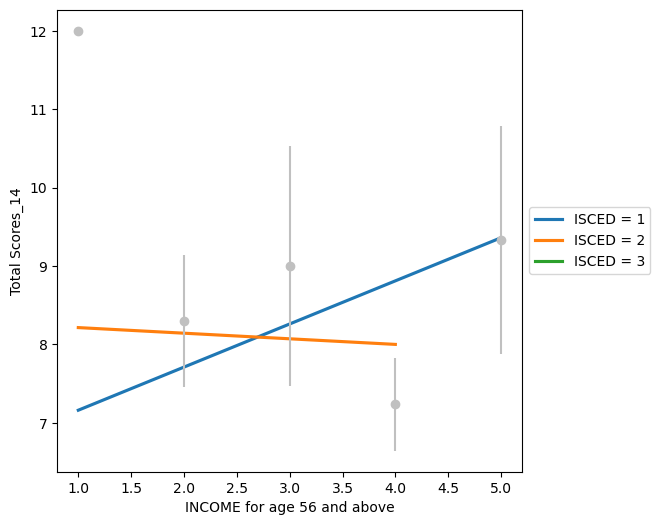

In [85]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean(numeric_only=True)['TotalScore_18'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='INCOME for age 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME for age 36 to 55',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean(numeric_only=True)['TotalScore_18'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME for age 56 and above',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean(numeric_only=True)['TotalScore_18'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

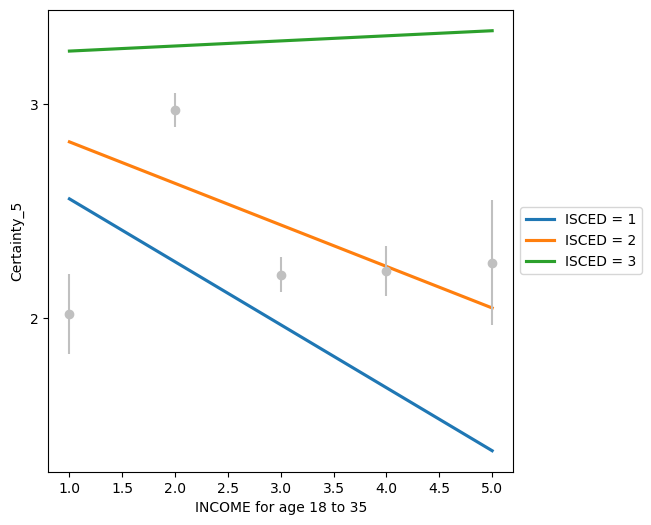

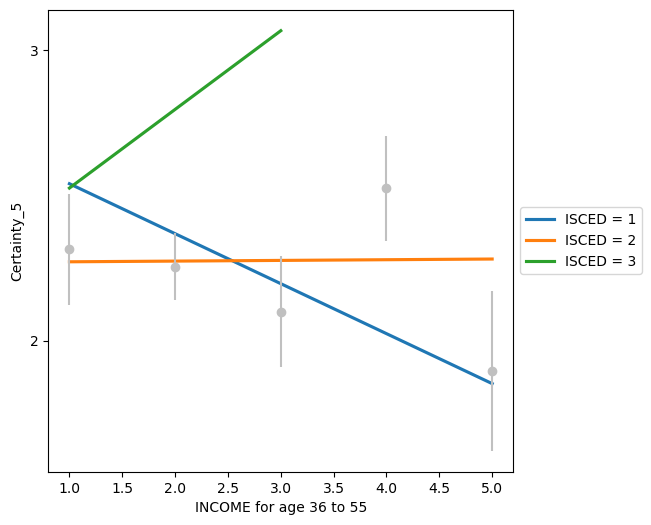

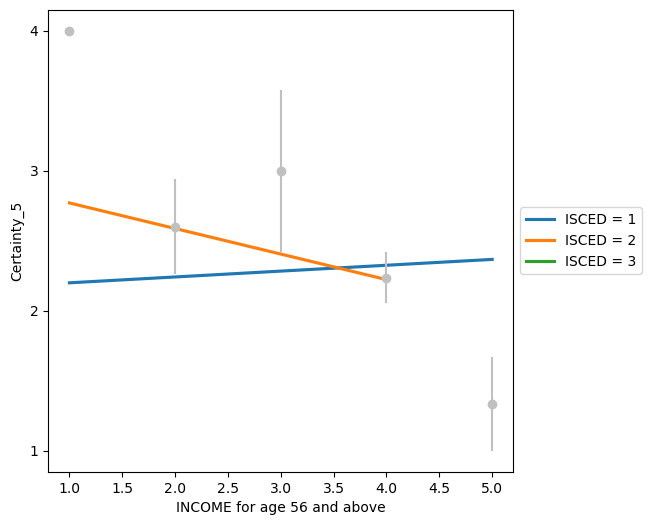

In [86]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_5', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_5', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_5', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

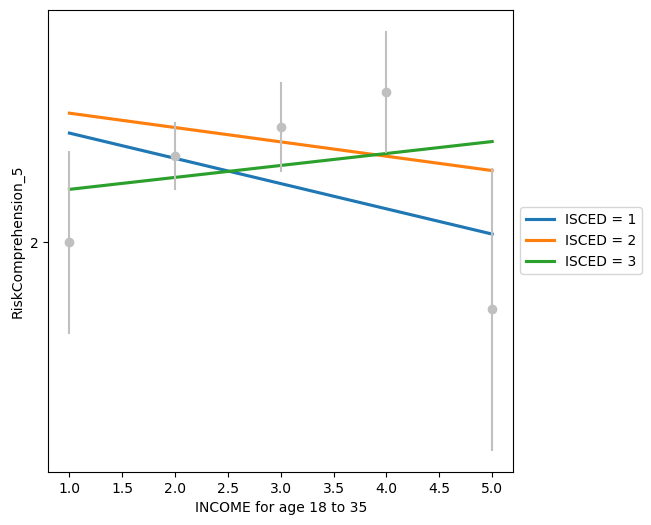

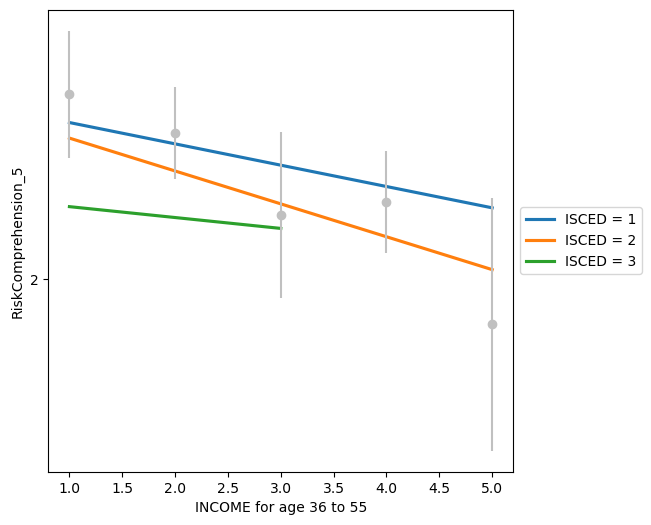

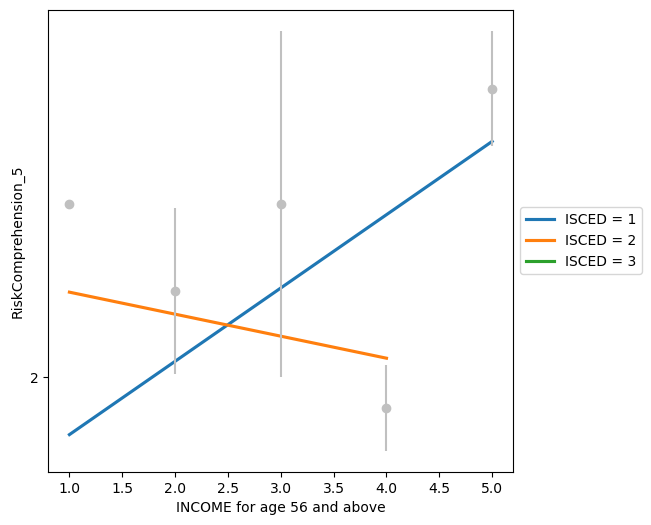

In [87]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_5', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_5', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_5', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

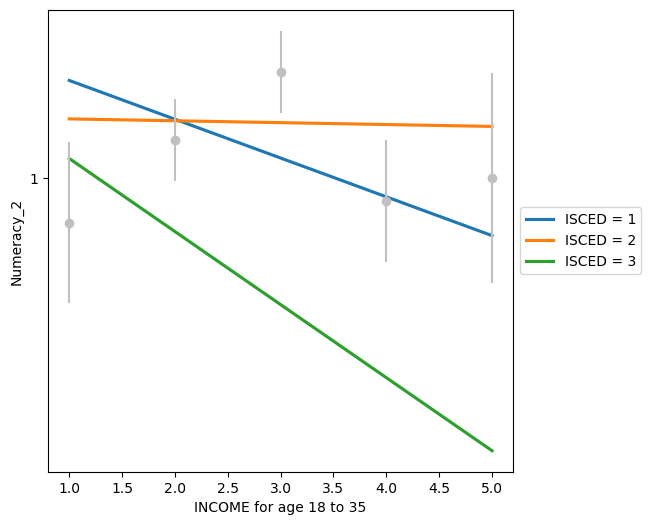

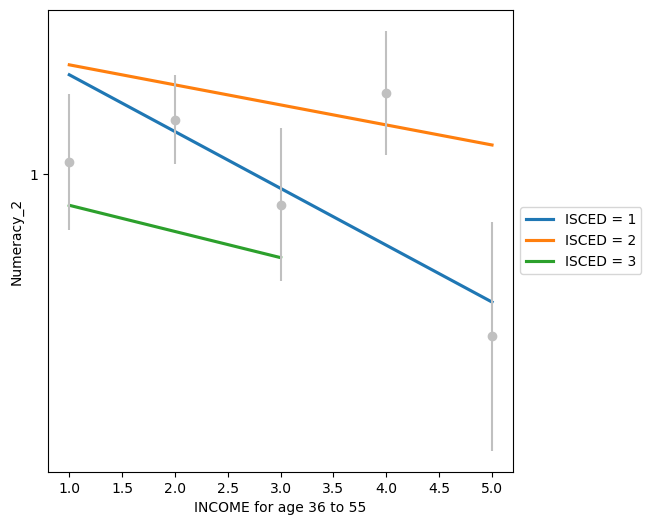

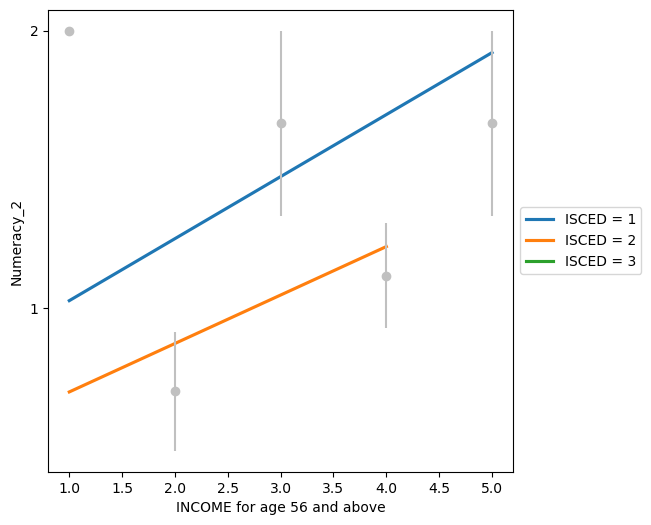

In [88]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_2', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Numeracy_2'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_2', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Numeracy_2'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_2', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Numeracy_2'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

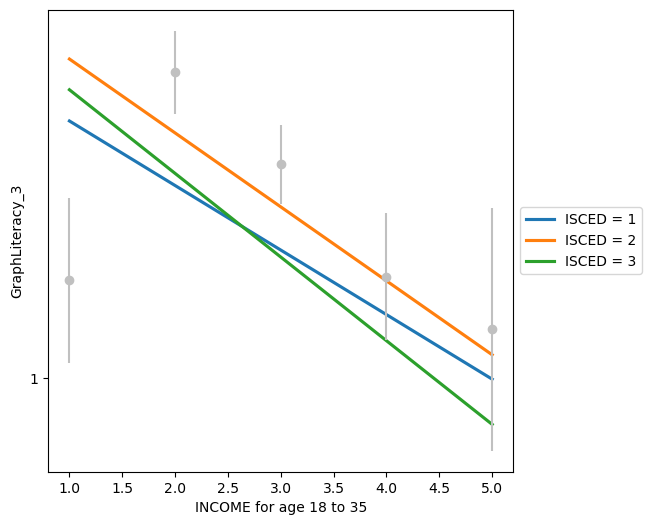

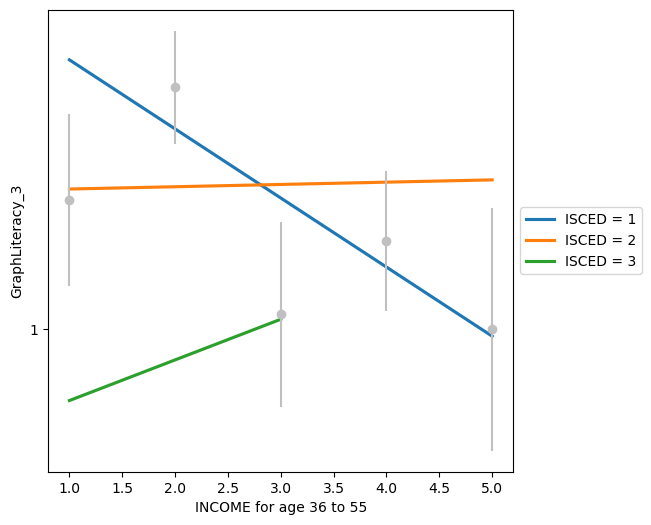

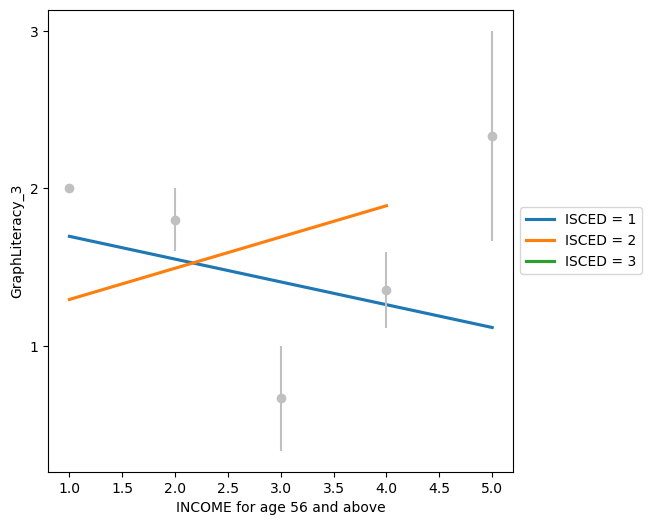

In [89]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

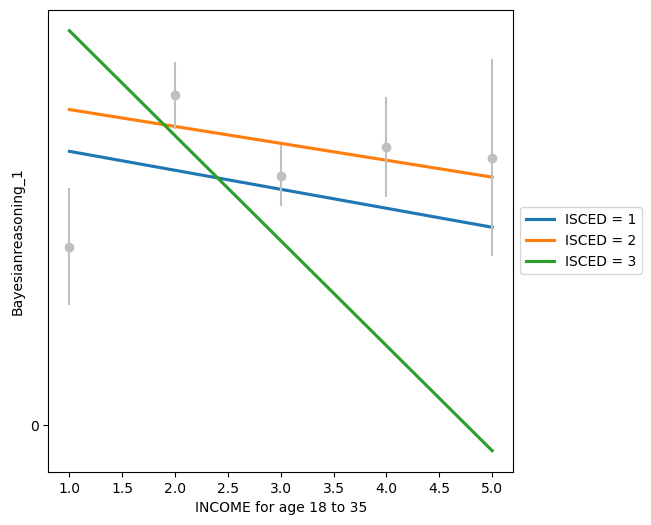

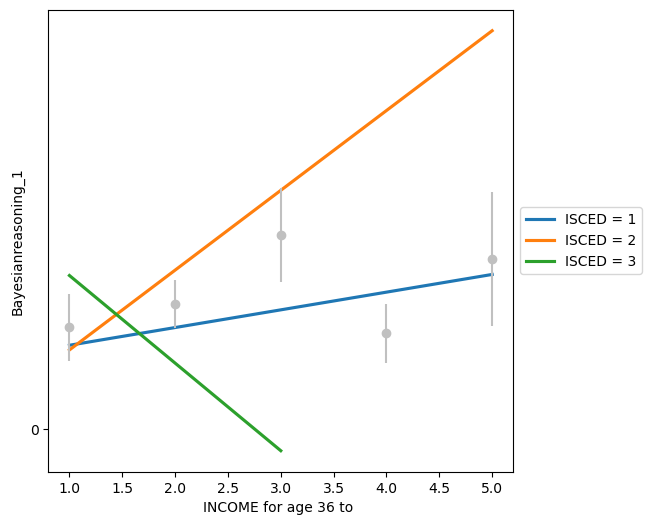

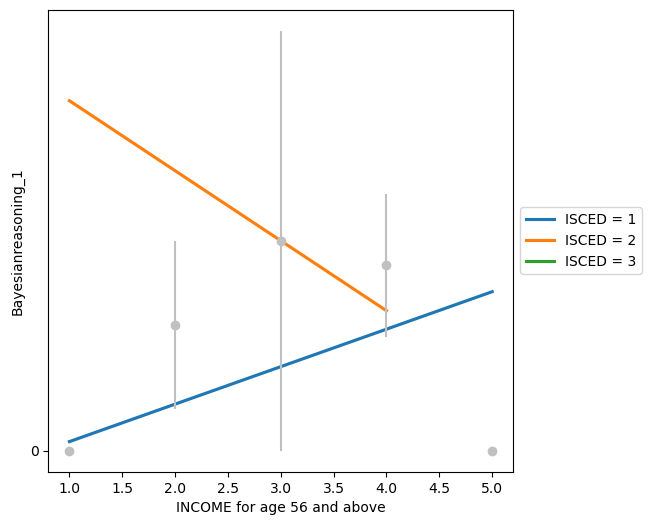

In [90]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for age 36 to ',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [91]:
# Age mean method
# Age_mean

In [92]:
age_m = df2["age"].median()
age_m

30.5

In [93]:
df7["income"].value_counts()

income
2    387
1    324
3    156
4     97
5     49
Name: count, dtype: int64

In [94]:
df7.loc[(df7['age'] < age_m)].describe()

age     age_rec       isced      income        wealth  \
count  338.000000  338.000000  338.000000  338.000000  3.380000e+02   
mean    23.139053    1.994083    1.837278    1.825444  7.068495e+06   
std      3.331116    0.108786    0.630694    1.037432  3.523029e+07   
min     16.000000    0.000000    1.000000    1.000000  0.000000e+00   
25%     21.500000    2.000000    1.000000    1.000000  1.000000e+05   
50%     21.500000    2.000000    2.000000    2.000000  5.000000e+05   
75%     26.000000    2.000000    2.000000    2.000000  2.000000e+06   
max     30.000000    2.000000    3.000000    5.000000  5.000000e+08   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   338.000000     338.000000           338.000000       338.000000   
mean      2.970414       0.520710             2.183432         1.423077   
std       1.253723       0.659005             0.987499         0.981279   
min       0.000000       0.000000             0.000000         0.000000   
25%       2.000000       0.000000             2.000000         1.000000   
50%       4.000000       0.000000             2.000000         1.000000   
75%       4.000000       1.000000             3.000000         2.000000   
max       4.000000       2.000000             5.000000         3.000000   

       Numeracy_2  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  338.000000           338.000000   338.000000     338.000000   
mean     1.136095             0.257396    59.408284      26.035503   
std      0.800111             0.437848    25.074468      32.950263   
min      0.000000             0.000000     0.000000       0.000000   
25%      0.000000             0.000000    40.000000       0.000000   
50%      1.000000             0.000000    80.000000       0.000000   
75%      2.000000             1.000000    80.000000      50.000000   
max      2.000000             1.000000    80.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           338.000000       338.000000  338.000000           338.000000   
mean             43.668639        47.435897   56.804734            25.739645   
std              19.749987        32.709292   40.005530            43.784781   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333    0.000000             0.000000   
50%              40.000000        33.333333   50.000000             0.000000   
75%              60.000000        66.666667  100.000000           100.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_18  TotalScore_%  
count     338.000000    338.000000  
mean        8.491124     47.172913  
std         2.547165     14.150919  
min         2.000000     11.111111  
25%         7.000000     38.888889  
50%         9.000000     50.000000  
75%        10.000000     55.555556  
max        15.000000     83.333333

In [95]:
df7.loc[(df7['age'] >= age_m)].describe()

age     age_rec       isced      income        wealth  \
count  675.000000  675.000000  675.000000  675.000000  6.750000e+02   
mean    37.421481    2.522963    1.391111    2.343704  1.087433e+07   
std      8.757857    0.592227    0.548462    1.127128  4.645892e+07   
min     30.500000    2.000000    1.000000    1.000000  0.000000e+00   
25%     30.500000    2.000000    1.000000    2.000000  3.775000e+05   
50%     34.000000    2.000000    1.000000    2.000000  1.500000e+06   
75%     40.500000    3.000000    2.000000    3.000000  6.000000e+06   
max     70.500000    4.000000    3.000000    5.000000  6.000000e+08   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   675.000000     675.000000           675.000000       675.000000   
mean      2.139259       0.422222             2.198519         1.247407   
std       1.275720       0.587540             1.137047         0.974210   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             1.000000         0.000000   
50%       2.000000       0.000000             2.000000         1.000000   
75%       3.000000       1.000000             3.000000         2.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_2  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  675.000000           675.000000   675.000000     675.000000   
mean     1.014815             0.202963    42.785185      21.111111   
std      0.789256             0.402503    25.514407      29.376979   
min      0.000000             0.000000     0.000000       0.000000   
25%      0.000000             0.000000    20.000000       0.000000   
50%      1.000000             0.000000    40.000000       0.000000   
75%      2.000000             0.000000    60.000000      50.000000   
max      2.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           675.000000       675.000000  675.000000           675.000000   
mean             43.970370        41.580247   50.740741            20.296296   
std              22.740942        32.473656   39.462818            40.250343   
min               0.000000         0.000000    0.000000             0.000000   
25%              20.000000         0.000000    0.000000             0.000000   
50%              40.000000        33.333333   50.000000             0.000000   
75%              60.000000        66.666667  100.000000             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_18  TotalScore_%  
count     675.000000    675.000000  
mean        7.225185     40.139918  
std         2.611255     14.506972  
min         0.000000      0.000000  
25%         5.000000     27.777778  
50%         7.000000     38.888889  
75%         9.000000     50.000000  
max        15.000000     83.333333

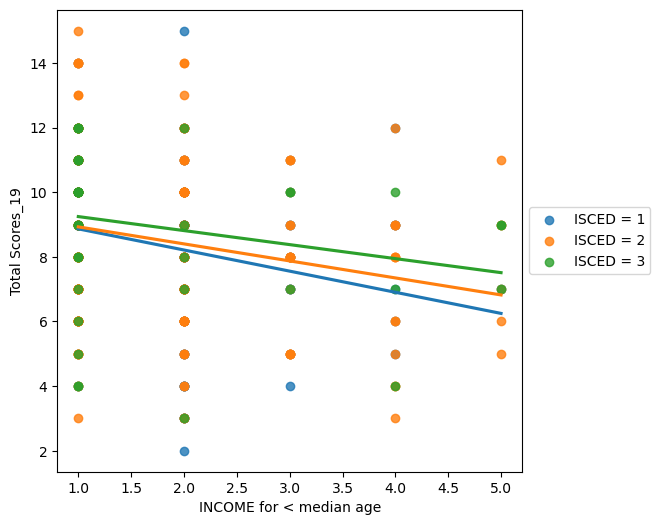

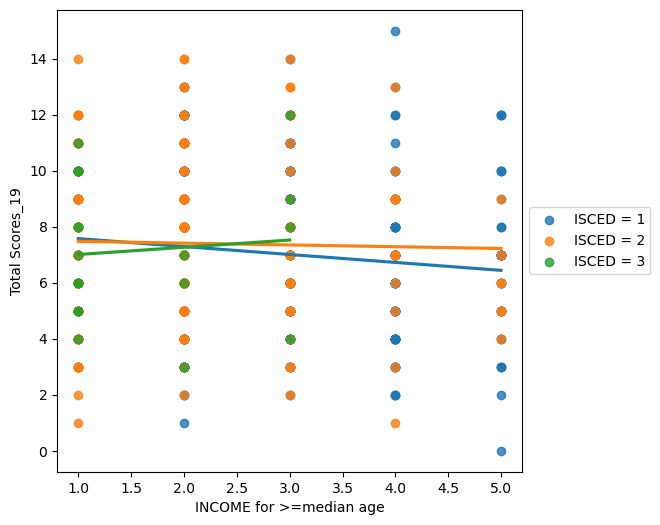

In [96]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] >= age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

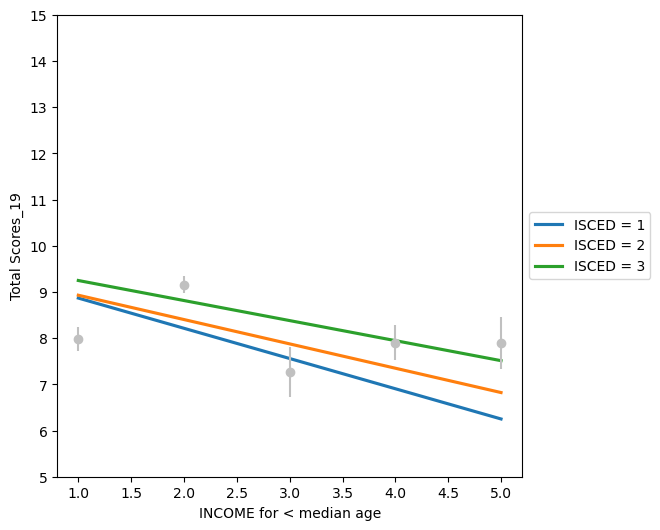

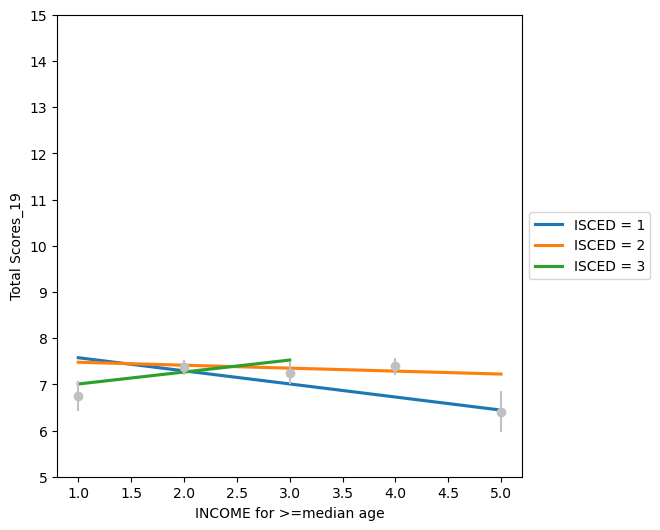

In [97]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['TotalScore_18'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['TotalScore_18'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='INCOME for >=median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

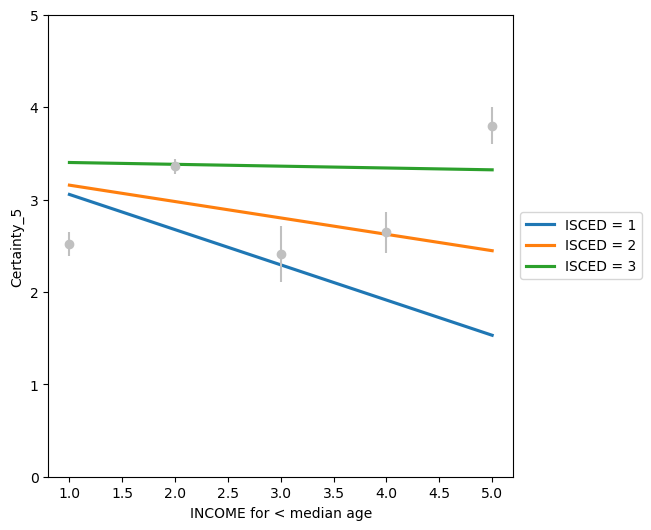

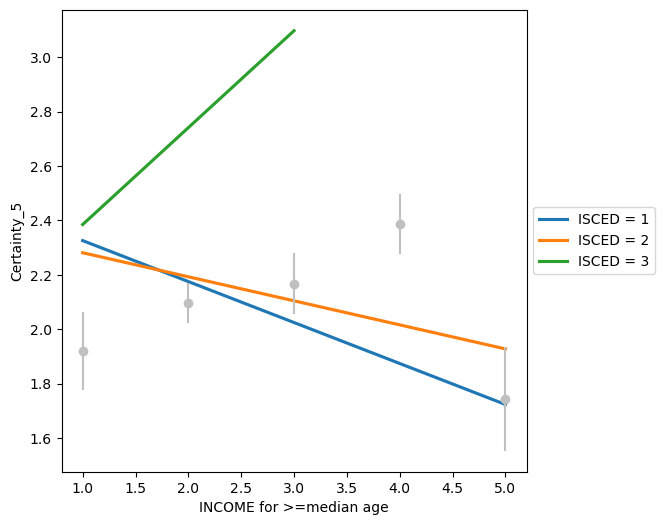

In [98]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_5', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_5', xlabel='INCOME for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

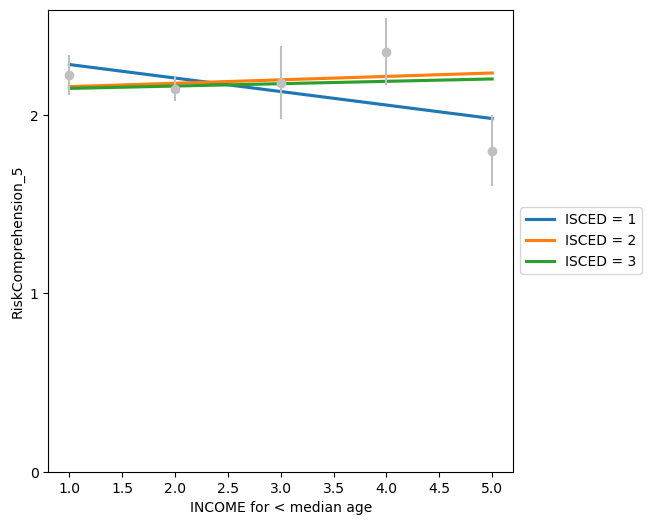

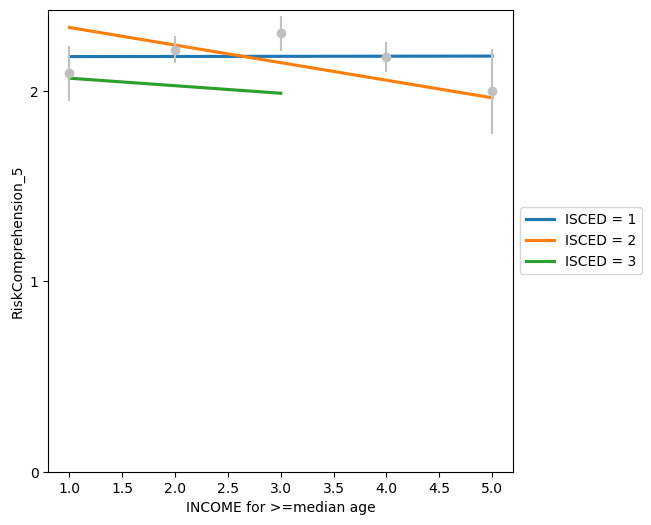

In [99]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_5', xlabel='INCOME for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_5', xlabel='INCOME for >=median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

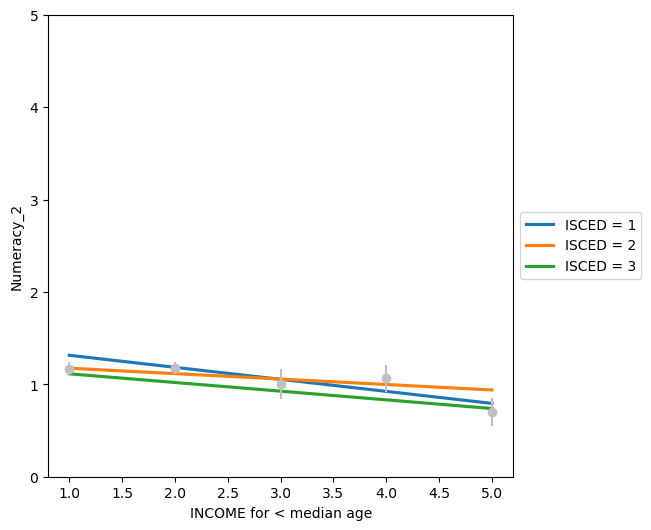

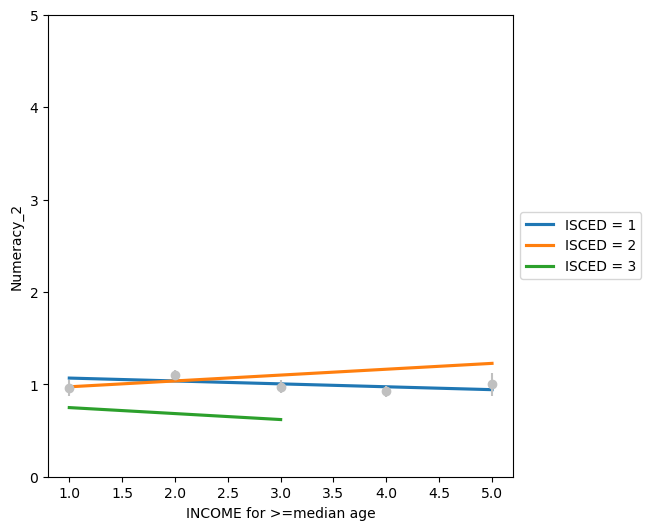

In [100]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Numeracy_2'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_2', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['Numeracy_2'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_2', xlabel='INCOME for >=median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

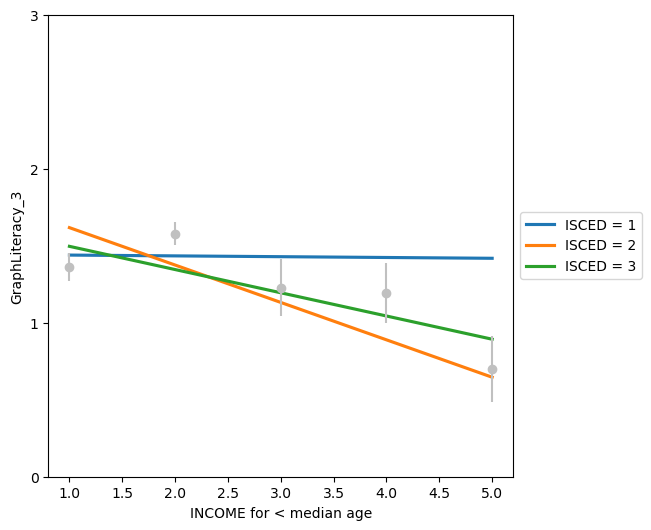

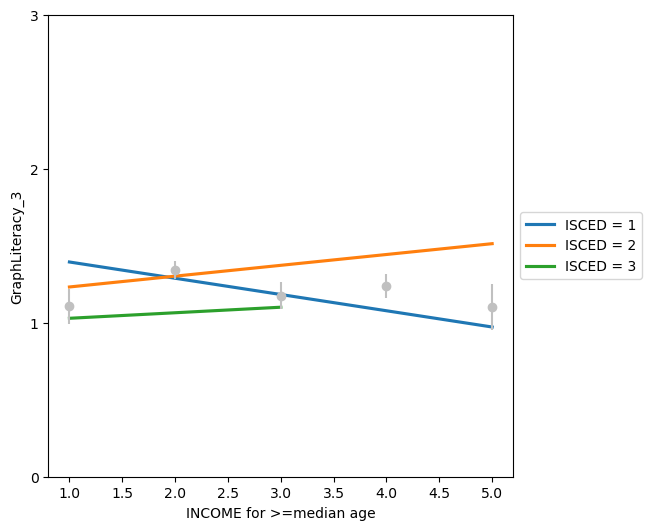

In [101]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for >=median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

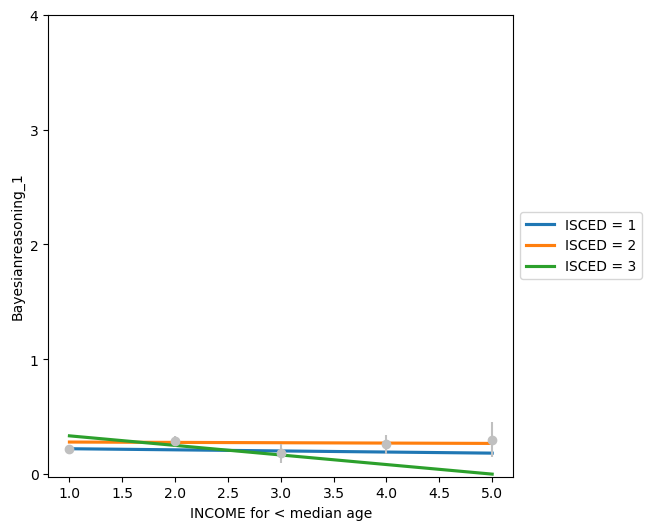

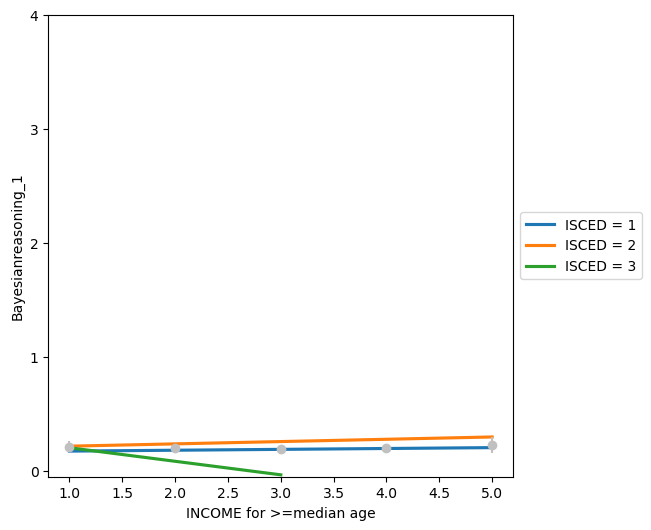

In [102]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for >=median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

## WEALTH

In [103]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "Quartile Number", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

ResponseId   age  age_rec  isced  income  \
0     2rkur9ckjvsyz36zmayz1zw2rkur9ckn  40.5        3      1       3   
1                    R_4DPGUOAP86yO30R  19.0        2      3       1   
2                    R_4fNO2Z5GF8KerZI  24.0        2      2       2   
3                    R_4lnmGavSf6rw1eE  31.0        2      1       1   
4     y139mcxc619h0ooosy139muk14mpfpvm  30.5        2      3       1   
...                                ...   ...      ...    ...     ...   
1008  35zux4sc18rplyz3dc85z35zux4sdfm4  21.5        2      2       4   
1009  wn9mk6m1k8o10l1twn9mk6b4z7l7yvhc  50.5        3      1       3   
1010  4udfypw7lf8mmgjmxr4d4udfym4sx1sf  40.5        3      1       3   
1011  oczyh23wpxpk4o0teoczy5zzzng3i6kk  30.5        2      2       5   
1012  zcj7ldokhyo6217f9sriwizcj7ldodwt  40.5        3      2       3   

           wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
0             0.0            3              0                    2   
1             0.0            4              2                    1   
2             0.0            4              0                    4   
3             0.0            1              0                    2   
4             0.0            5              0                    2   
...           ...          ...            ...                  ...   
1008  500000000.0            2              0                    1   
1009  500000000.0            2              0                    3   
1010  500000000.0            0              0                    3   
1011  500000000.0            1              0                    3   
1012  600000000.0            3              1                    2   

      GraphLiteracy_3  Numeracy_2  Bayesianreasoning_1  Certainty_%  \
0                   0           0                    0         60.0   
1                   2           1                    1         80.0   
2                   1           2                    0         80.0   
3                   1           2                    0         20.0   
4                   0           0                    1        100.0   
...               ...         ...                  ...          ...   
1008                0           1                    0         40.0   
1009                3           2                    0         40.0   
1010                0           0                    0          0.0   
1011                3           2                    0         20.0   
1012                1           2                    1         60.0   

      Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0               0.0                 40.0         0.000000         0.0   
1             100.0                 20.0        66.666667        50.0   
2               0.0                 80.0        33.333333       100.0   
3               0.0                 40.0        33.333333       100.0   
4               0.0                 40.0         0.000000         0.0   
...             ...                  ...              ...         ...   
1008            0.0                 20.0         0.000000        50.0   
1009            0.0                 60.0       100.000000       100.0   
1010            0.0                 60.0         0.000000         0.0   
1011            0.0                 60.0       100.000000       100.0   
1012           50.0                 40.0        33.333333       100.0   

      Bayesianreasoning_%  TotalScore_18  TotalScore_%  Quartile Number  
0                     0.0              5     27.777778                1  
1                   100.0             11     61.111111                1  
2                     0.0             11     61.111111                1  
3                     0.0              6     33.333333                1  
4                   100.0              8     44.444444                1  
...                   ...            ...           ...              ...  
1008                  0.0              4     22.222222                4  


<Axes: ylabel='TotalScore_18'>

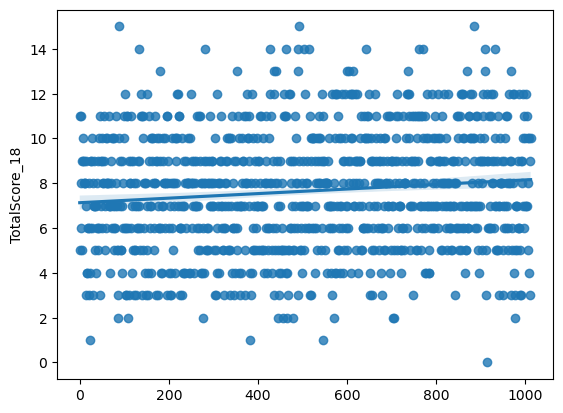

In [104]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses

sns.regplot (data = df4, x = df4.index, y = 'TotalScore_18')

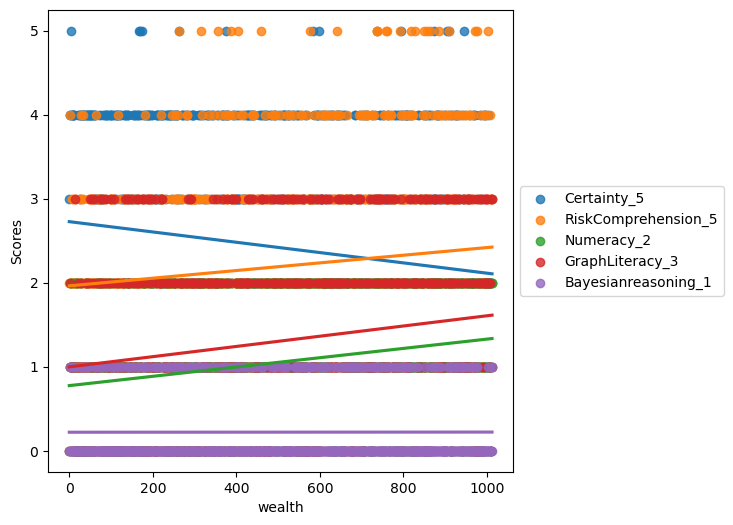

In [105]:
# Trend line for Absolute Independent Facet Score vs wealth reponses

fig1, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = df4.index, y = 'Certainty_5', fit_reg=True, ci=None, ax=ax1, label='Certainty_5')
sns.regplot (data = df4, x = df4.index, y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax1, label='RiskComprehension_5')
sns.regplot (data = df4, x = df4.index, y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax1, label='Numeracy_2')
sns.regplot (data = df4, x = df4.index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax1, label='GraphLiteracy_3')
sns.regplot (data = df4, x = df4.index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax1, label='Bayesianreasoning_1' )

ax1.set(ylabel='Scores', xlabel='wealth')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [106]:
# Count of number of responses under each quartile

df4.groupby('Quartile Number')[['Quartile Number']].count()

Quartile Number
Quartile Number                 
1                            255
2                            296
3                            242
4                            220

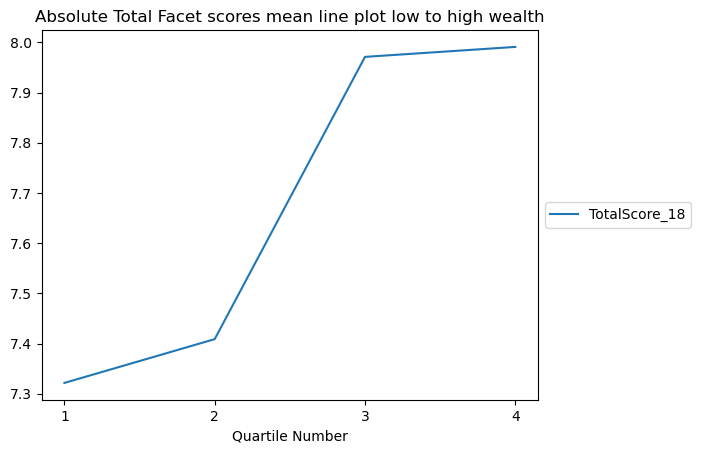

In [107]:
# Absolute Total Facet scores mean line plot from low to high Wealth

df4.groupby('Quartile Number')[['TotalScore_18']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

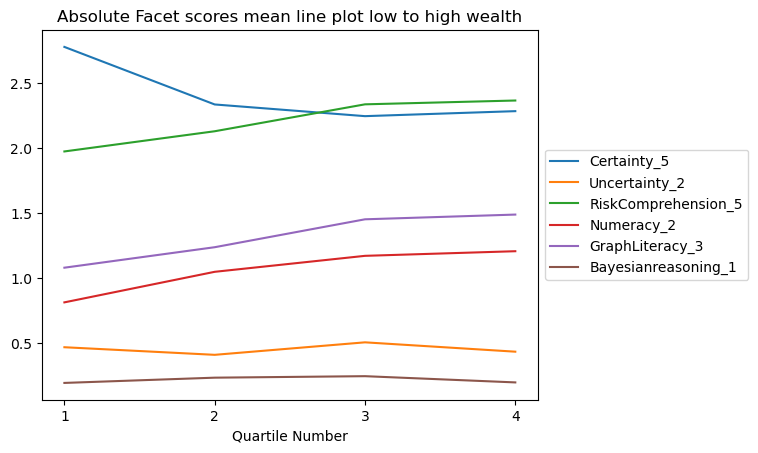

In [108]:
# Absolute Facet scores mean line plot from low to high wealth

df4.groupby('Quartile Number')[['Certainty_5', "Uncertainty_2", 'RiskComprehension_5','Numeracy_2','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

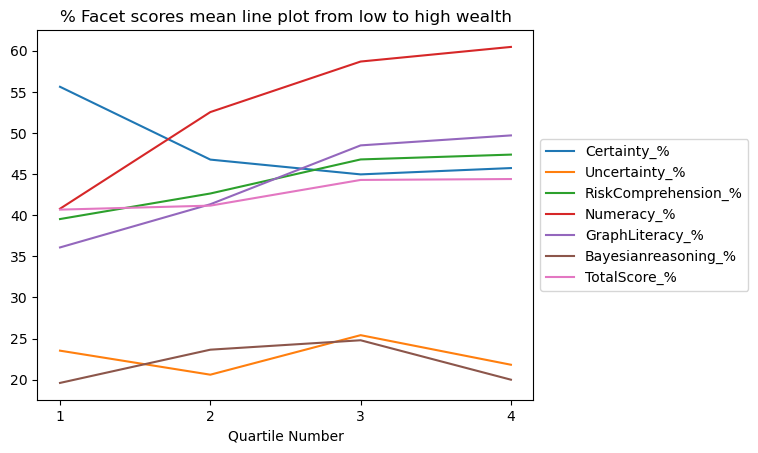

In [109]:
# Normalised Facet scores mean line plot from low to high wealth


df4.groupby('Quartile Number')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = '% Facet scores mean line plot from low to high wealth',  xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

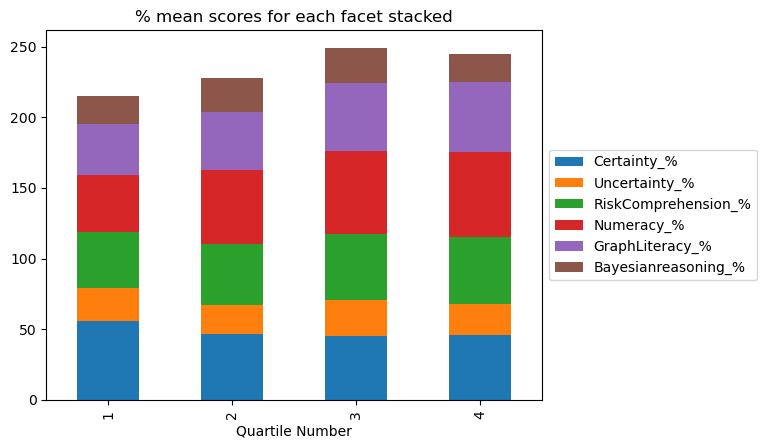

In [110]:
# Normalised mean scores for each facet stacked

df4.groupby('Quartile Number')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = '% mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

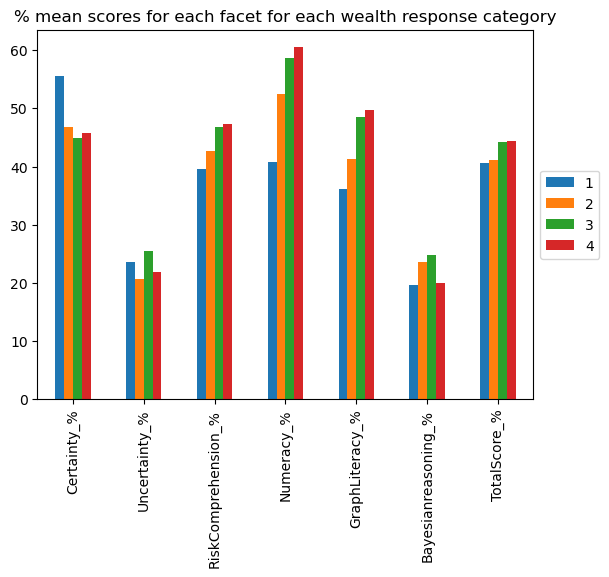

In [111]:
# Normalised mean scores for each facet for each wealth response Quartile

df4.groupby('Quartile Number')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = '% mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Quartile Number', ylabel='TotalScore_18'>

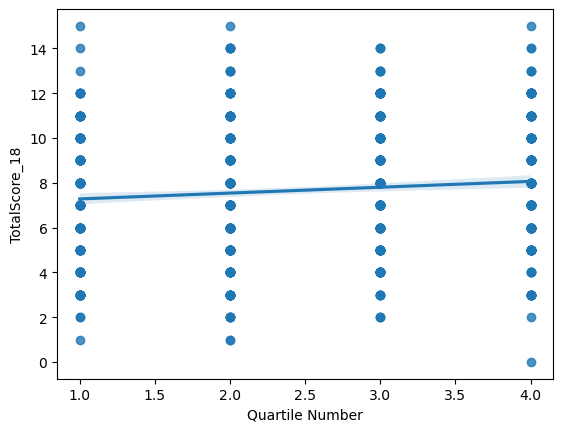

In [112]:
# Trend line for Absolute Total Facet Score vs Quartiles

sns.regplot (data = df4, x = 'Quartile Number', y = 'TotalScore_18')

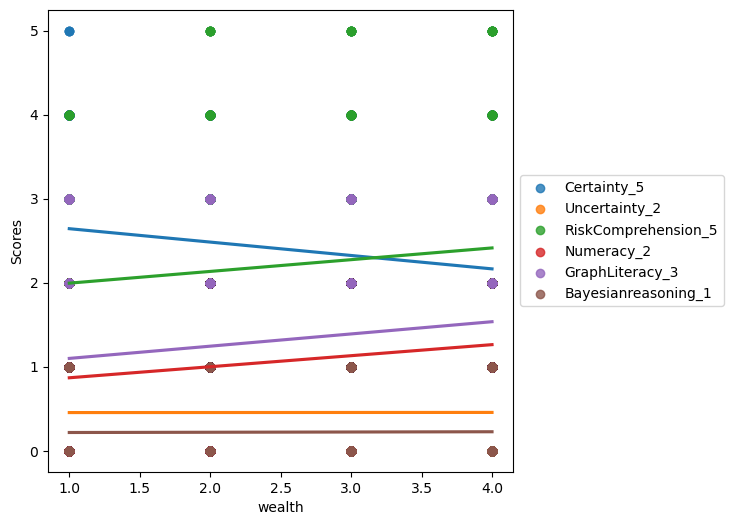

In [113]:
# Trend line for Absolute Independent Facet Score vs Quartiles

fig2, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax2, label='Certainty_5')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Uncertainty_2', fit_reg=True, ci=None, ax=ax2, label='Uncertainty_2')
sns.regplot (data = df4, x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_5')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax2, label='Numeracy_2')
sns.regplot (data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Quartile Number', ylabel='TotalScore_18'>

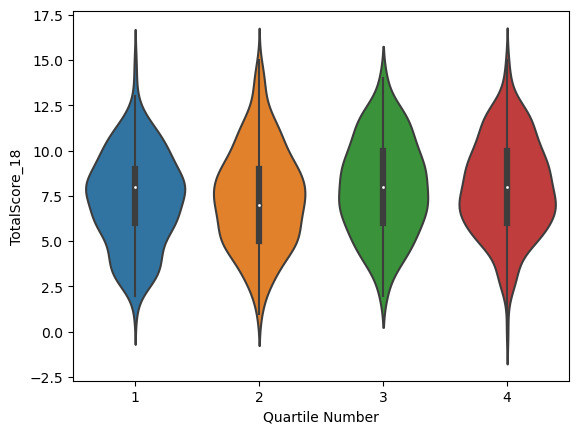

In [114]:
# Violine Plot for TotalScore_18 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'TotalScore_18')

<Axes: xlabel='Quartile Number', ylabel='Certainty_5'>

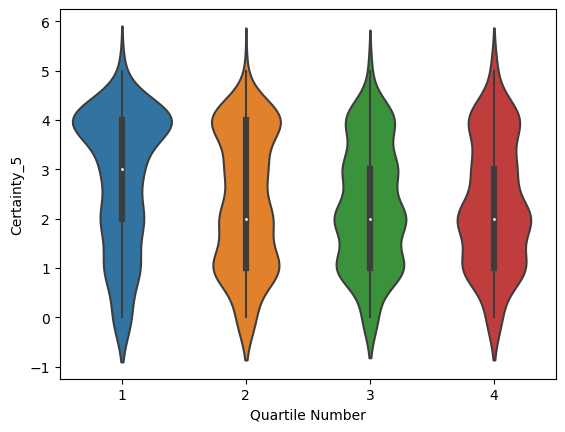

In [115]:
# Violine Plot for Certainty_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Certainty_5')

<Axes: xlabel='Quartile Number', ylabel='Uncertainty_2'>

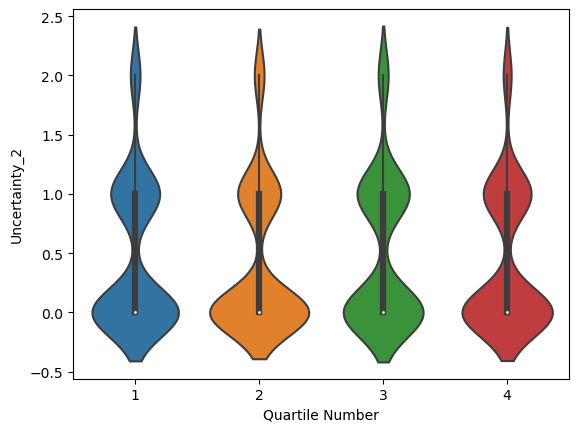

In [116]:
# Violine Plot for Certainty_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Uncertainty_2')

<Axes: xlabel='Quartile Number', ylabel='RiskComprehension_5'>

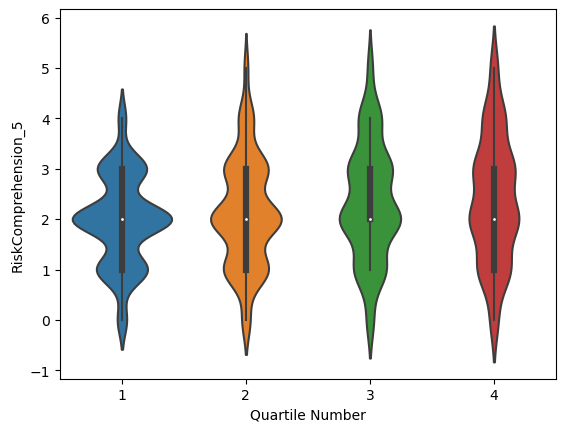

In [117]:
# Violine Plot for RiskComprehension_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'RiskComprehension_5')

<Axes: xlabel='Quartile Number', ylabel='GraphLiteracy_3'>

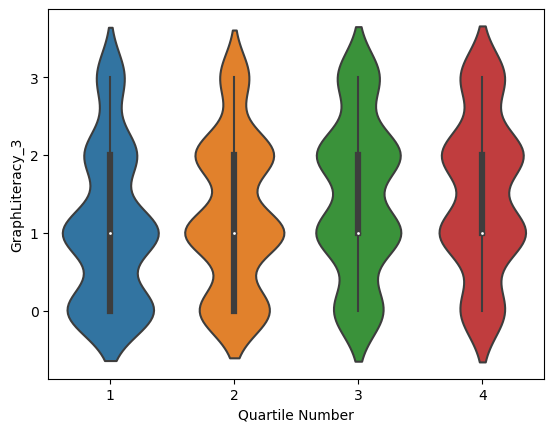

In [118]:
# Violine Plot for GraphLiteracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3')

<Axes: xlabel='Quartile Number', ylabel='Numeracy_2'>

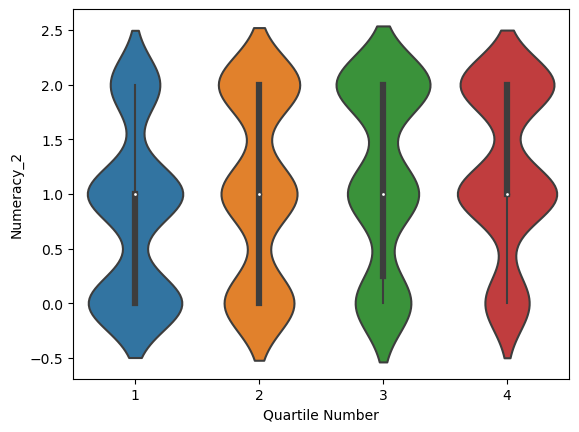

In [119]:
# Violine Plot for Numeracy_2 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Numeracy_2')

<Axes: xlabel='Quartile Number', ylabel='Bayesianreasoning_1'>

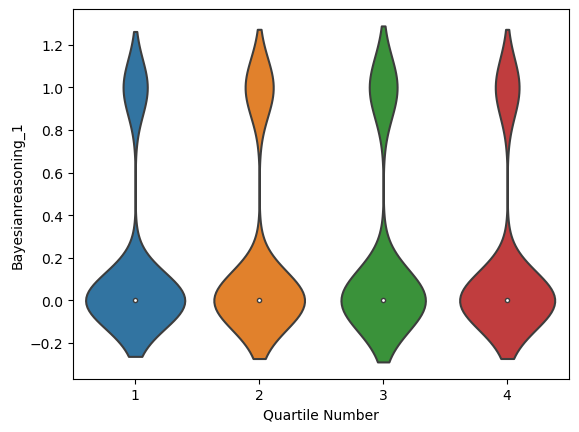

In [120]:
# Violine Plot for Bayesianreasoning_1 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1')

### WEALTH vs SCORES w/ ISCED classification

In [121]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df6 = df5.dropna(axis = 0, subset = 'wealth')
# df6.drop(df6[df6['wealth'] == 3500000].index, inplace = True)
df6.loc[df6['isced']==1][['wealth']].describe()

wealth
count  5.310000e+02
mean   1.043356e+07
std    4.024320e+07
min    0.000000e+00
25%    4.000000e+05
50%    1.500000e+06
75%    6.000000e+06
max    5.000000e+08

In [122]:
# Descriptive stats for the data set, isced = 2

df6.loc[df6['isced']==2][['wealth']].describe()

wealth
count  4.170000e+02
mean   9.459245e+06
std    4.913786e+07
min    0.000000e+00
25%    2.000000e+05
50%    6.900000e+05
75%    4.000000e+06
max    6.000000e+08

In [123]:
# Descriptive stats for the data set, isced = 3

df6.loc[df6['isced']==3][['wealth']].describe()

wealth
count  6.500000e+01
mean   3.763119e+06
std    1.307520e+07
min    0.000000e+00
25%    5.000000e+04
50%    2.000000e+05
75%    2.000000e+06
max    1.000000e+08

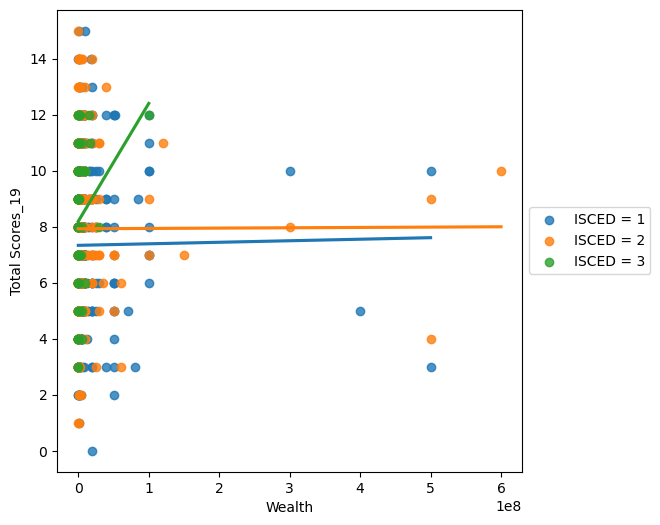

In [124]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='Wealth')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

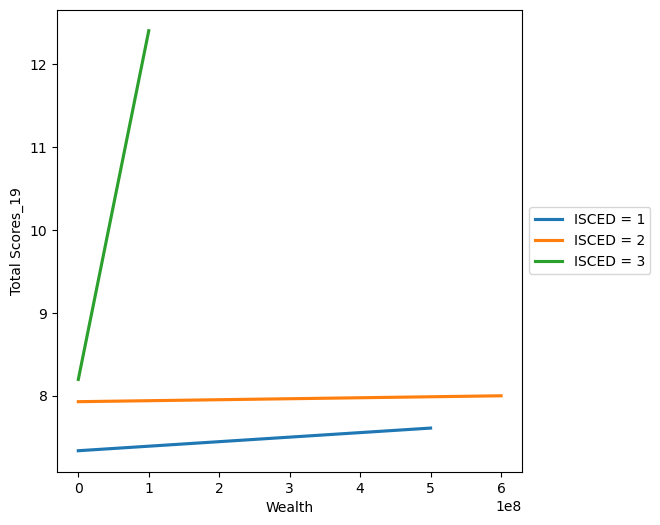

In [125]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='Wealth')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

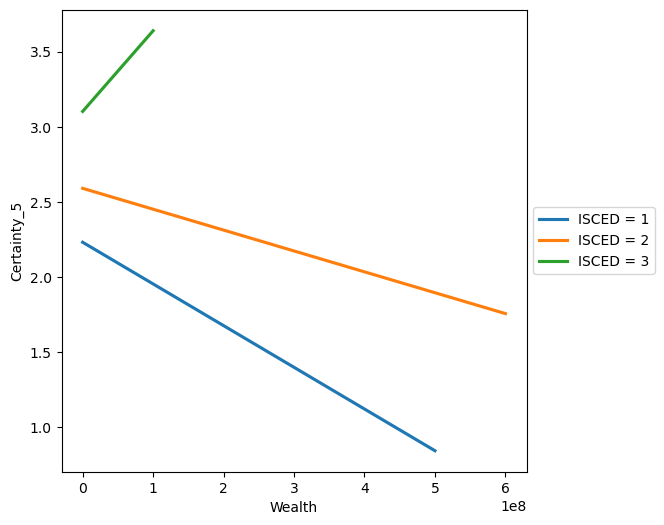

In [126]:
# Trend line for Absolute Certainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_5', xlabel='Wealth')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

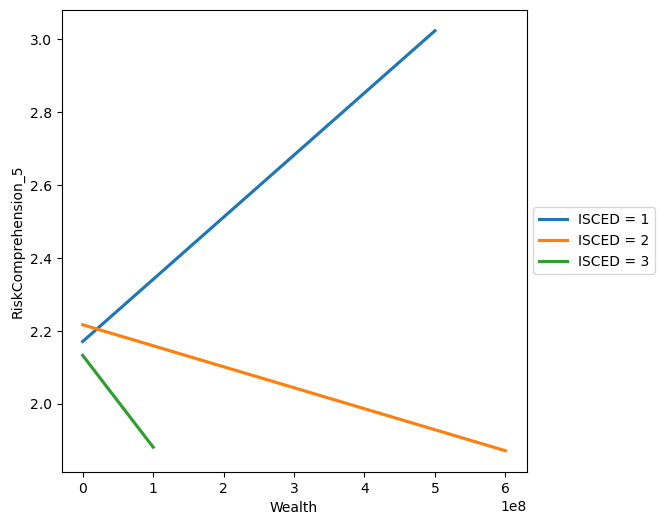

In [127]:
# Trend line for Absolute Uncertainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_5', xlabel='Wealth')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

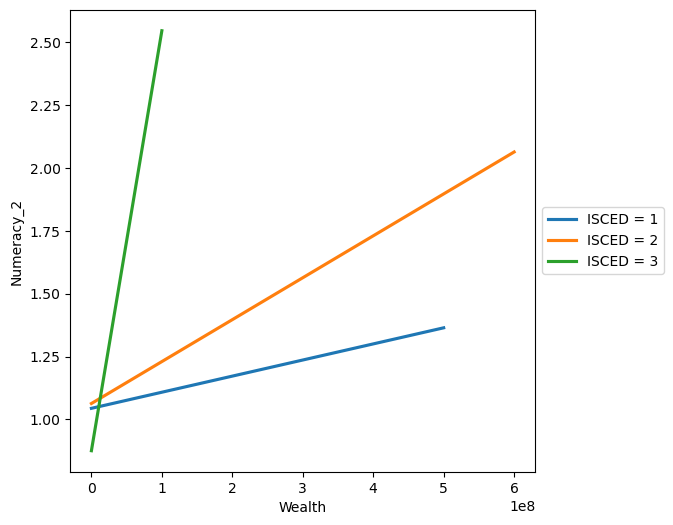

In [128]:
# Trend line for Absolute Number Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_2', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

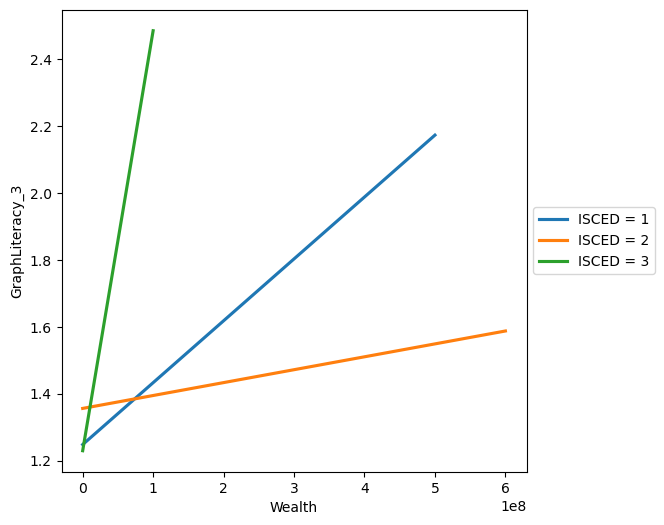

In [129]:
# Trend line for Absolute Graph Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

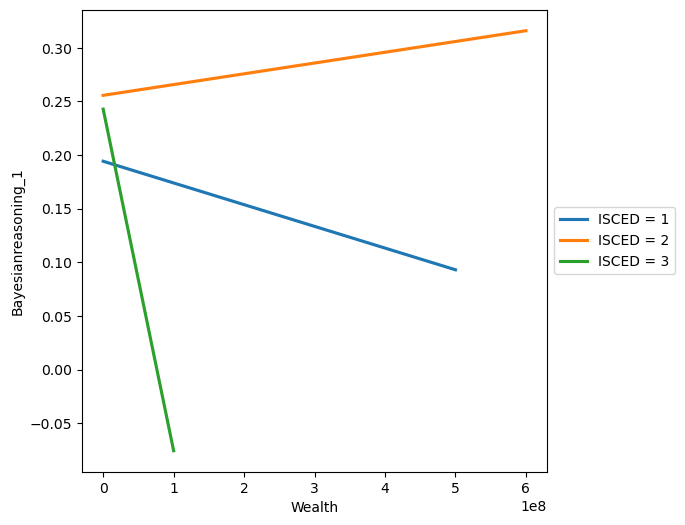

In [130]:
# Trend line for Absolute Bayesian Reasoning Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='Wealth')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### WEALTH Quartile Number vs SCORES w/ ISCED and AGE based classification

In [131]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df4.loc[df4['isced']==1].describe()

age     age_rec  isced      income        wealth  Certainty_5  \
count  531.000000  531.000000  531.0  531.000000  5.310000e+02   531.000000   
mean    34.803202    2.425612    1.0    2.448211  1.043356e+07     2.203390   
std      9.256072    0.562695    0.0    1.120416  4.024320e+07     1.290045   
min     18.000000    2.000000    1.0    1.000000  0.000000e+00     0.000000   
25%     30.500000    2.000000    1.0    2.000000  4.000000e+05     1.000000   
50%     30.500000    2.000000    1.0    2.000000  1.500000e+06     2.000000   
75%     40.500000    3.000000    1.0    3.000000  6.000000e+06     3.000000   
max     70.500000    4.000000    1.0    5.000000  5.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     531.000000           531.000000       531.000000  531.000000   
mean        0.438795             2.188324         1.267420    1.050847   
std         0.599938             1.138658         0.965466    0.771701   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count           531.000000   531.000000     531.000000           531.000000   
mean              0.192090    44.067797      21.939736            43.766478   
std               0.394315    25.800891      29.996920            22.773165   
min               0.000000     0.000000       0.000000             0.000000   
25%               0.000000    20.000000       0.000000            20.000000   
50%               0.000000    40.000000       0.000000            40.000000   
75%               0.000000    60.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       531.000000  531.000000           531.000000     531.000000   
mean         42.247332   52.542373            19.209040       7.340866   
std          32.182211   38.585064            39.431522       2.622581   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333    0.000000             0.000000       5.500000   
50%          33.333333   50.000000             0.000000       7.000000   
75%          66.666667  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  Quartile Number  
count    531.000000       531.000000  
mean      40.782591         2.593220  
std       14.569894         1.083439  
min        0.000000         1.000000  
25%       30.555556         2.000000  
50%       38.888889         3.000000  
75%       50.000000         4.000000  
max       83.333333         4.000000

In [132]:
df4.loc[df4['isced']==2].describe()

age     age_rec  isced      income        wealth  Certainty_5  \
count  417.000000  417.000000  417.0  417.000000  4.170000e+02   417.000000   
mean    30.781775    2.263789    2.0    1.896882  9.459245e+06     2.577938   
std      9.887607    0.507120    0.0    1.031436  4.913786e+07     1.335280   
min     18.000000    2.000000    2.0    1.000000  0.000000e+00     0.000000   
25%     22.000000    2.000000    2.0    1.000000  2.000000e+05     1.000000   
50%     30.500000    2.000000    2.0    2.000000  6.900000e+05     3.000000   
75%     34.000000    2.000000    2.0    2.000000  4.000000e+06     4.000000   
max     70.000000    4.000000    2.0    5.000000  6.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     417.000000           417.000000       417.000000  417.000000   
mean        0.443645             2.211031         1.359712    1.079137   
std         0.618088             1.050903         0.997645    0.818048   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count           417.000000   417.000000     417.000000           417.000000   
mean              0.256595    51.558753      22.182254            44.220624   
std               0.437278    26.705607      30.904402            21.018061   
min               0.000000     0.000000       0.000000             0.000000   
25%               0.000000    20.000000       0.000000            20.000000   
50%               0.000000    60.000000       0.000000            40.000000   
75%               1.000000    80.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       417.000000  417.000000           417.000000     417.000000   
mean         45.323741   53.956835            25.659472       7.928058   
std          33.254842   40.902417            43.727842       2.670999   
min           0.000000    0.000000             0.000000       1.000000   
25%          33.333333    0.000000             0.000000       6.000000   
50%          33.333333   50.000000             0.000000       8.000000   
75%          66.666667  100.000000           100.000000      10.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  Quartile Number  
count    417.000000       417.000000  
mean      44.044764         2.285372  
std       14.838883         1.048168  
min        5.555556         1.000000  
25%       33.333333         1.000000  
50%       44.444444         2.000000  
75%       55.555556         3.000000  
max       83.333333         4.000000

In [133]:
df4.loc[df4['isced']==3].describe()

age    age_rec  isced     income        wealth  Certainty_5  \
count  65.000000  65.000000   65.0  65.000000  6.500000e+01    65.000000   
mean   27.138462   2.230769    3.0   1.661538  3.763119e+06     3.123077   
std    12.124519   0.580119    0.0   1.135739  1.307520e+07     1.192525   
min    16.000000   0.000000    3.0   1.000000  0.000000e+00     1.000000   
25%    19.000000   2.000000    3.0   1.000000  5.000000e+04     2.000000   
50%    21.500000   2.000000    3.0   1.000000  2.000000e+05     4.000000   
75%    30.500000   2.000000    3.0   2.000000  2.000000e+06     4.000000   
max    70.500000   4.000000    3.0   5.000000  1.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count      65.000000            65.000000        65.000000   65.000000   
mean        0.661538             2.123077         1.276923    0.938462   
std         0.667947             0.910146         0.976404    0.826834   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             2.000000         0.000000    0.000000   
50%         1.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             4.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count            65.000000    65.000000      65.000000            65.000000   
mean              0.230769    62.461538      33.076923            42.461538   
std               0.424604    23.850496      33.397374            18.202916   
min               0.000000    20.000000       0.000000             0.000000   
25%               0.000000    40.000000       0.000000            40.000000   
50%               0.000000    80.000000      50.000000            40.000000   
75%               0.000000    80.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000            80.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count        65.000000   65.000000            65.000000      65.000000   
mean         42.564103   46.923077            23.076923       8.353846   
std          32.546810   41.341681            42.460389       2.546019   
min           0.000000    0.000000             0.000000       3.000000   
25%           0.000000    0.000000             0.000000       7.000000   
50%          33.333333   50.000000             0.000000       9.000000   
75%          66.666667  100.000000             0.000000      10.000000   
max         100.000000  100.000000           100.000000      12.000000   

       TotalScore_%  Quartile Number  
count     65.000000        65.000000  
mean      46.410256         1.892308  
std       14.144549         1.091488  
min       16.666667         1.000000  
25%       38.888889         1.000000  
50%       50.000000         1.000000  
75%       55.555556         3.000000  
max       66.666667         4.000000

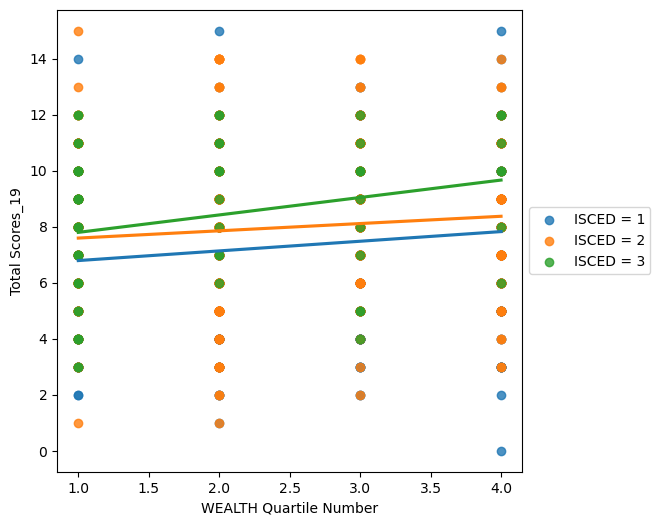

In [134]:
# Trend line for Absolute Tota Facet Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[df4['isced']==1]['TotalScore_18'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[df4['isced']==2]['TotalScore_18'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[df4['isced']==3]['TotalScore_18'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

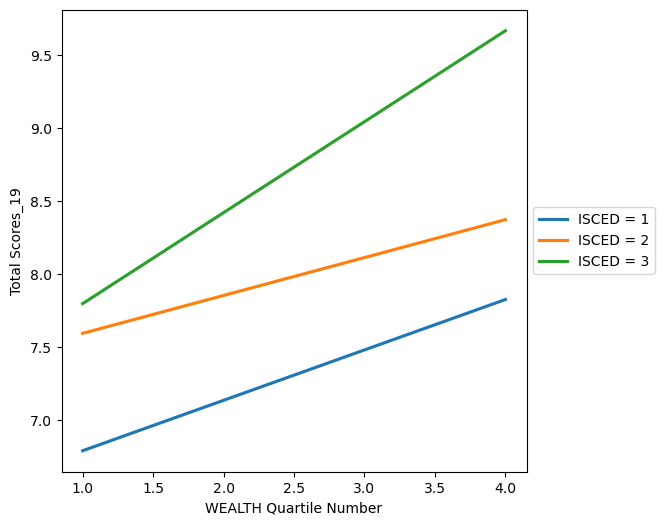

In [135]:
# Trend line for Absolute Tota Facet Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'TotalScore_18', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

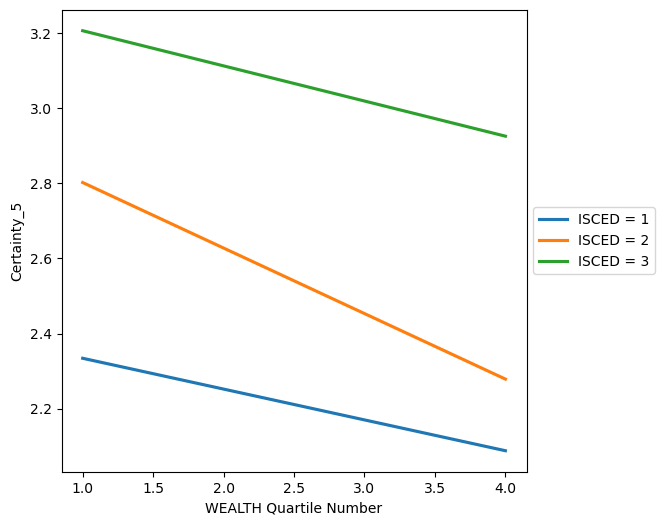

In [136]:
# Trend line for Absolute Certainty Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

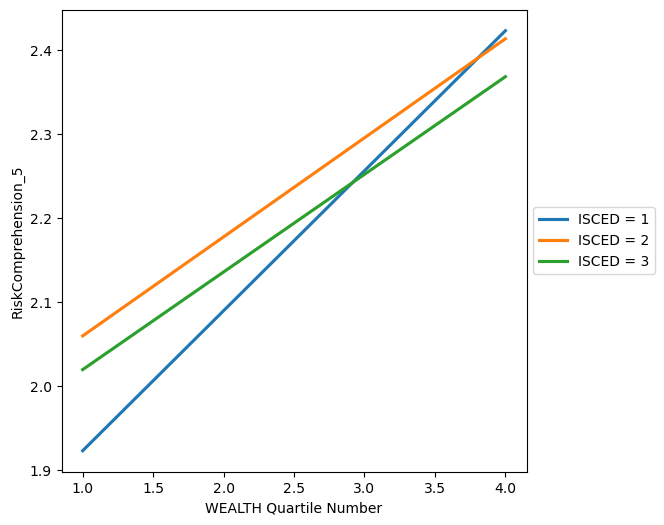

In [137]:
# Trend line for Absolute Risk Comprehension Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

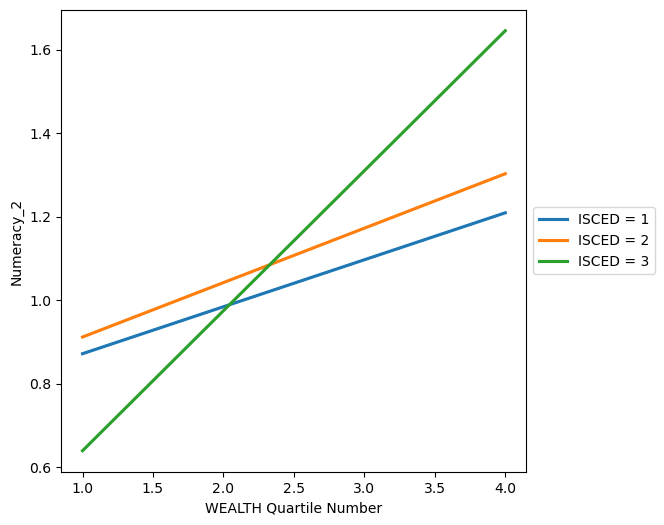

In [138]:
# Trend line for Absolute Number Comprehension Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'Numeracy_2', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_2', xlabel='WEALTH Quartile Number')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

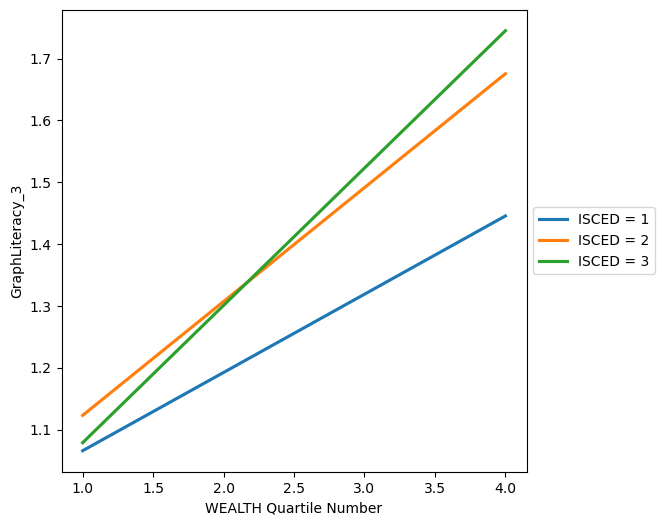

In [139]:
# Trend line for Absolute Graph Comprehension Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

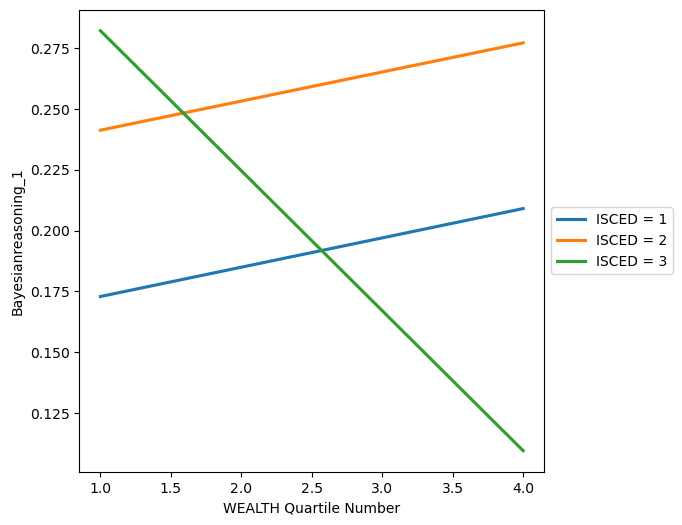

In [140]:
# Trend line for Absolute Bayesian Reasoning Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [141]:
df4

ResponseId   age  age_rec  isced  income  \
0     2rkur9ckjvsyz36zmayz1zw2rkur9ckn  40.5        3      1       3   
1                    R_4DPGUOAP86yO30R  19.0        2      3       1   
2                    R_4fNO2Z5GF8KerZI  24.0        2      2       2   
3                    R_4lnmGavSf6rw1eE  31.0        2      1       1   
4     y139mcxc619h0ooosy139muk14mpfpvm  30.5        2      3       1   
...                                ...   ...      ...    ...     ...   
1008  35zux4sc18rplyz3dc85z35zux4sdfm4  21.5        2      2       4   
1009  wn9mk6m1k8o10l1twn9mk6b4z7l7yvhc  50.5        3      1       3   
1010  4udfypw7lf8mmgjmxr4d4udfym4sx1sf  40.5        3      1       3   
1011  oczyh23wpxpk4o0teoczy5zzzng3i6kk  30.5        2      2       5   
1012  zcj7ldokhyo6217f9sriwizcj7ldodwt  40.5        3      2       3   

           wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
0             0.0            3              0                    2   
1             0.0            4              2                    1   
2             0.0            4              0                    4   
3             0.0            1              0                    2   
4             0.0            5              0                    2   
...           ...          ...            ...                  ...   
1008  500000000.0            2              0                    1   
1009  500000000.0            2              0                    3   
1010  500000000.0            0              0                    3   
1011  500000000.0            1              0                    3   
1012  600000000.0            3              1                    2   

      GraphLiteracy_3  Numeracy_2  Bayesianreasoning_1  Certainty_%  \
0                   0           0                    0         60.0   
1                   2           1                    1         80.0   
2                   1           2                    0         80.0   
3                   1           2                    0         20.0   
4                   0           0                    1        100.0   
...               ...         ...                  ...          ...   
1008                0           1                    0         40.0   
1009                3           2                    0         40.0   
1010                0           0                    0          0.0   
1011                3           2                    0         20.0   
1012                1           2                    1         60.0   

      Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
0               0.0                 40.0         0.000000         0.0   
1             100.0                 20.0        66.666667        50.0   
2               0.0                 80.0        33.333333       100.0   
3               0.0                 40.0        33.333333       100.0   
4               0.0                 40.0         0.000000         0.0   
...             ...                  ...              ...         ...   
1008            0.0                 20.0         0.000000        50.0   
1009            0.0                 60.0       100.000000       100.0   
1010            0.0                 60.0         0.000000         0.0   
1011            0.0                 60.0       100.000000       100.0   
1012           50.0                 40.0        33.333333       100.0   

      Bayesianreasoning_%  TotalScore_18  TotalScore_%  Quartile Number  
0                     0.0              5     27.777778                1  
1                   100.0             11     61.111111                1  
2                     0.0             11     61.111111                1  
3                     0.0              6     33.333333                1  
4                   100.0              8     44.444444                1  
...                   ...            ...           ...              ...  
1008                  0.0              4     22.222222                4  


In [142]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [143]:
df4.loc[(df4['age_rec']==2)].describe()

age  age_rec       isced      income        wealth  Certainty_5  \
count  693.000000    693.0  693.000000  693.000000  6.930000e+02   693.000000   
mean    27.116162      2.0    1.603175    2.059163  7.513477e+06     2.473304   
std      4.547104      0.0    0.617511    1.083624  3.290550e+07     1.350849   
min     18.000000      2.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     22.000000      2.0    1.000000    1.000000  2.000000e+05     1.000000   
50%     30.500000      2.0    2.000000    2.000000  8.000000e+05     2.000000   
75%     30.500000      2.0    2.000000    3.000000  3.500000e+06     4.000000   
max     35.000000      2.0    3.000000    5.000000  5.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     693.000000           693.000000       693.000000  693.000000   
mean        0.458874             2.155844         1.326118    1.057720   
std         0.629338             1.069256         0.978303    0.802535   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count            693.00000   693.000000     693.000000           693.000000   
mean               0.23088    49.466089      22.943723            43.116883   
std                0.42170    27.016973      31.466902            21.385112   
min                0.00000     0.000000       0.000000             0.000000   
25%                0.00000    20.000000       0.000000            20.000000   
50%                0.00000    40.000000       0.000000            40.000000   
75%                0.00000    80.000000      50.000000            60.000000   
max                1.00000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       693.000000  693.000000           693.000000     693.000000   
mean         44.203944   52.886003            23.088023       7.702742   
std          32.610103   40.126750            42.170032       2.639946   
min           0.000000    0.000000             0.000000       0.000000   
25%          33.333333    0.000000             0.000000       6.000000   
50%          33.333333   50.000000             0.000000       8.000000   
75%          66.666667  100.000000             0.000000      10.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  Quartile Number  
count    693.000000       693.000000  
mean      42.793009         2.300144  
std       14.666365         1.044923  
min        0.000000         1.000000  
25%       33.333333         1.000000  
50%       44.444444         2.000000  
75%       55.555556         3.000000  
max       83.333333         4.000000

In [144]:
df4.loc[(df4['age_rec']==3)].describe()

age  age_rec       isced      income        wealth  Certainty_5  \
count  285.000000    285.0  285.000000  285.000000  2.850000e+02   285.000000   
mean    42.577193      3.0    1.385965    2.445614  1.463604e+07     2.277193   
std      4.501683      0.0    0.573916    1.166442  6.251005e+07     1.298837   
min     36.000000      3.0    1.000000    1.000000  0.000000e+00     0.000000   
25%     40.500000      3.0    1.000000    2.000000  3.000000e+05     1.000000   
50%     40.500000      3.0    1.000000    2.000000  2.000000e+06     2.000000   
75%     44.000000      3.0    2.000000    3.000000  7.500000e+06     3.000000   
max     54.000000      3.0    3.000000    5.000000  6.000000e+08     5.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count     285.000000           285.000000       285.000000  285.000000   
mean        0.445614             2.266667         1.235088    1.042105   
std         0.576558             1.109710         0.984473    0.781599   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             2.000000         0.000000    0.000000   
50%         0.000000             2.000000         1.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count           285.000000   285.000000     285.000000           285.000000   
mean              0.196491    45.543860      22.280702            45.333333   
std               0.398043    25.976744      28.827898            22.194192   
min               0.000000     0.000000       0.000000             0.000000   
25%               0.000000    20.000000       0.000000            40.000000   
50%               0.000000    40.000000       0.000000            40.000000   
75%               0.000000    60.000000      50.000000            60.000000   
max               1.000000   100.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count       285.000000  285.000000           285.000000     285.000000   
mean         41.169591   52.105263            19.649123       7.463158   
std          32.815766   39.079949            39.804315       2.706840   
min           0.000000    0.000000             0.000000       1.000000   
25%           0.000000    0.000000             0.000000       5.000000   
50%          33.333333   50.000000             0.000000       7.000000   
75%          66.666667  100.000000             0.000000       9.000000   
max         100.000000  100.000000           100.000000      15.000000   

       TotalScore_%  Quartile Number  
count    285.000000       285.000000  
mean      41.461988         2.628070  
std       15.038000         1.136116  
min        5.555556         1.000000  
25%       27.777778         2.000000  
50%       38.888889         3.000000  
75%       50.000000         4.000000  
max       83.333333         4.000000

In [145]:
df4.loc[(df4['age_rec']==4)].describe()

age  age_rec      isced     income        wealth  Certainty_5  \
count  34.000000     34.0  34.000000  34.000000  3.400000e+01    34.000000   
mean   62.897059      4.0   1.500000   2.176471  1.032985e+07     2.382353   
std     4.344588      0.0   0.615457   1.217812  1.451734e+07     0.953930   
min    57.000000      4.0   1.000000   1.000000  1.000000e+05     1.000000   
25%    60.500000      4.0   1.000000   1.000000  1.437500e+06     2.000000   
50%    60.500000      4.0   1.000000   2.000000  6.000000e+06     2.000000   
75%    64.250000      4.0   2.000000   2.000000  1.000000e+07     3.000000   
max    70.500000      4.0   3.000000   5.000000  5.250000e+07     4.000000   

       Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_2  \
count      34.000000            34.000000        34.000000   34.000000   
mean        0.441176             2.323529         1.529412    1.117647   
std         0.612554             1.296162         0.928841    0.769286   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000             1.000000         1.000000    1.000000   
50%         0.000000             2.000000         2.000000    1.000000   
75%         1.000000             3.000000         2.000000    2.000000   
max         2.000000             5.000000         3.000000    2.000000   

       Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
count            34.000000    34.000000      34.000000            34.000000   
mean              0.235294    47.647059      22.058824            46.470588   
std               0.430562    19.078597      30.627717            25.923238   
min               0.000000    20.000000       0.000000             0.000000   
25%               0.000000    40.000000       0.000000            20.000000   
50%               0.000000    40.000000       0.000000            40.000000   
75%               0.000000    60.000000      50.000000            60.000000   
max               1.000000    80.000000     100.000000           100.000000   

       GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_18  \
count        34.000000   34.000000            34.000000      34.000000   
mean         50.980392   55.882353            23.529412       8.029412   
std          30.961358   38.464281            43.056155       2.587678   
min           0.000000    0.000000             0.000000       3.000000   
25%          33.333333   50.000000             0.000000       6.000000   
50%          66.666667   50.000000             0.000000       7.500000   
75%          66.666667  100.000000             0.000000      10.000000   
max         100.000000  100.000000           100.000000      13.000000   

       TotalScore_%  Quartile Number  
count     34.000000        34.000000  
mean      44.607843         3.205882  
std       14.375990         0.946426  
min       16.666667         1.000000  
25%       33.333333         3.000000  
50%       41.666667         3.500000  
75%       55.555556         4.000000  
max       72.222222         4.000000

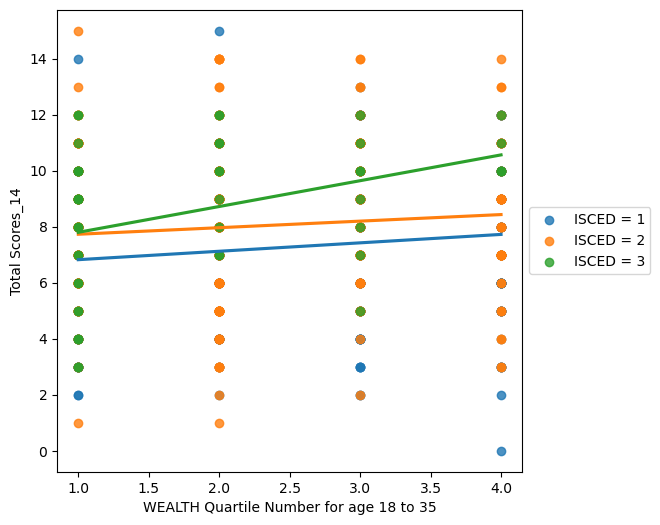

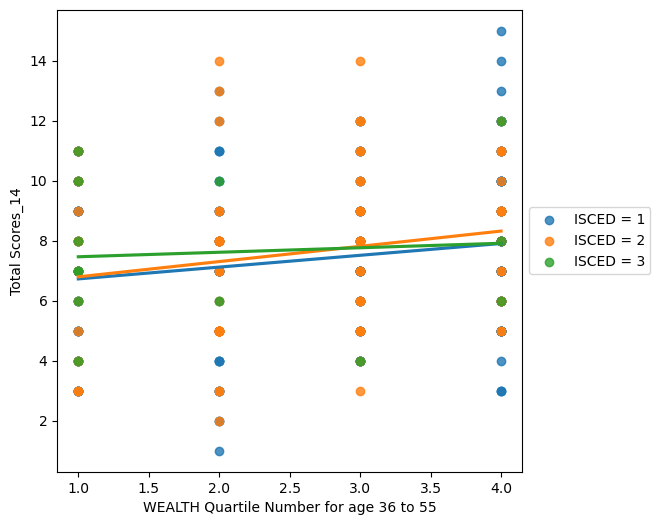

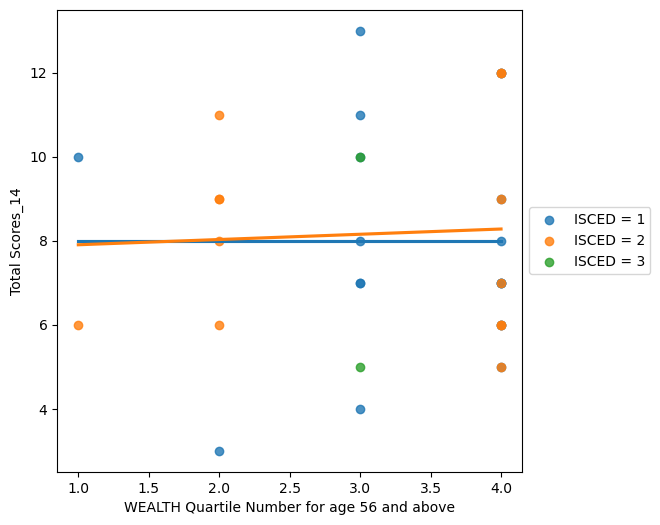

In [146]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 36 to 55')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 56 and above')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

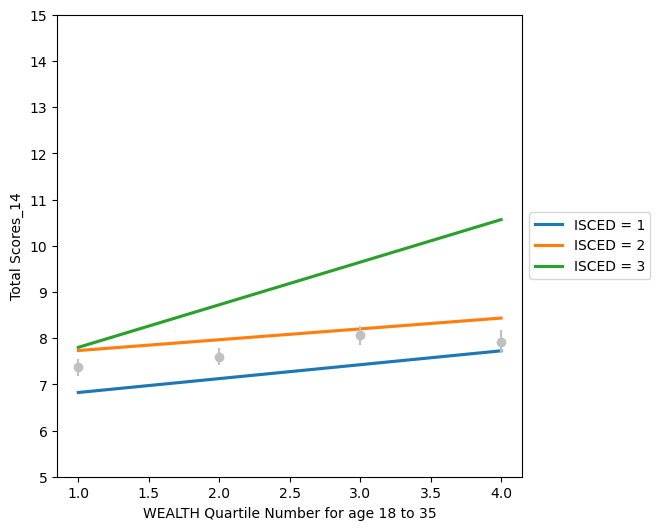

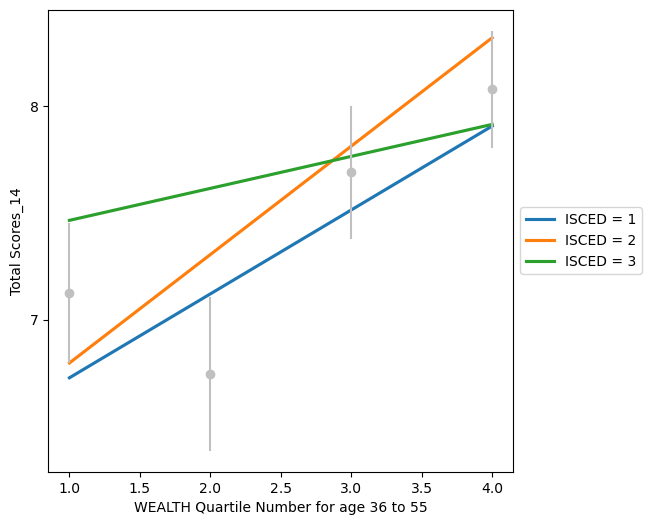

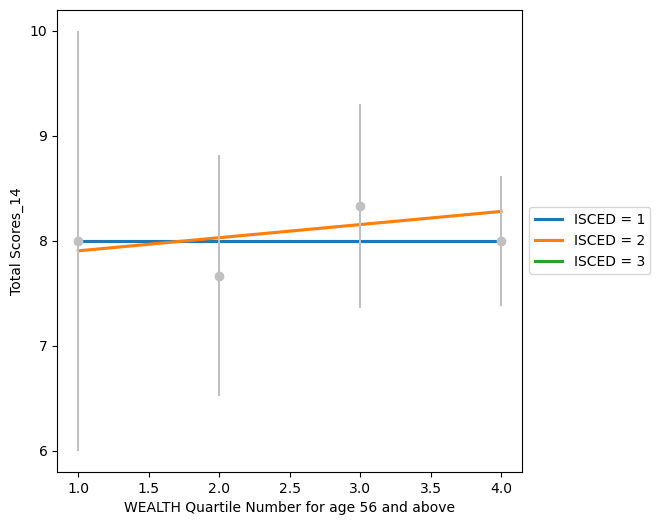

In [147]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number']).mean(numeric_only=True)['TotalScore_18'], yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number']).mean(numeric_only=True)['TotalScore_18'], yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number']).mean(numeric_only=True)['TotalScore_18'], yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

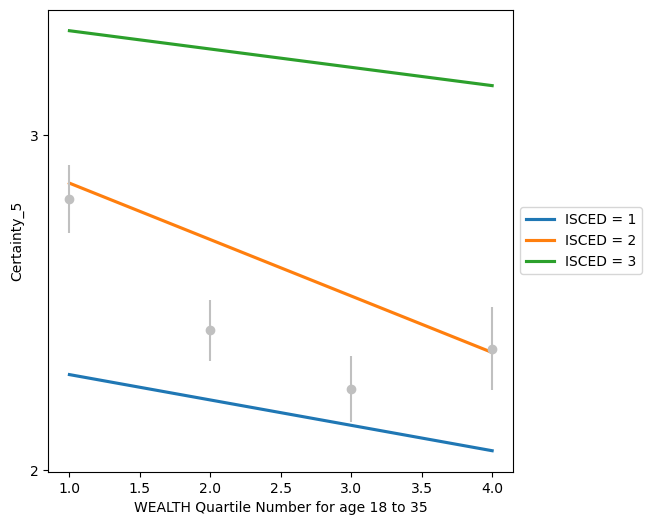

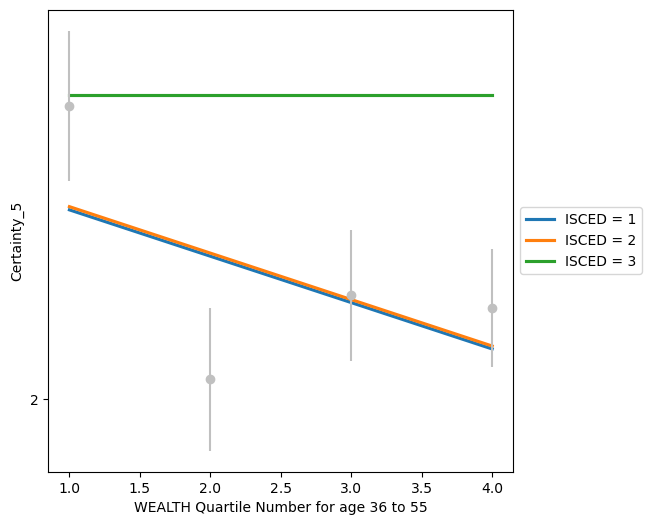

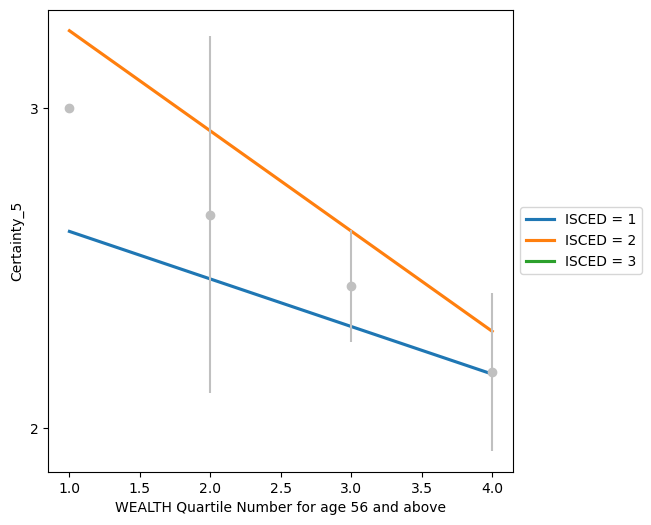

In [148]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

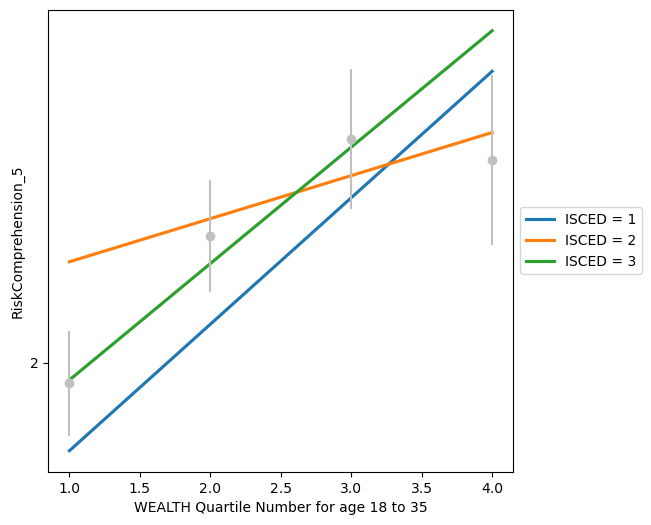

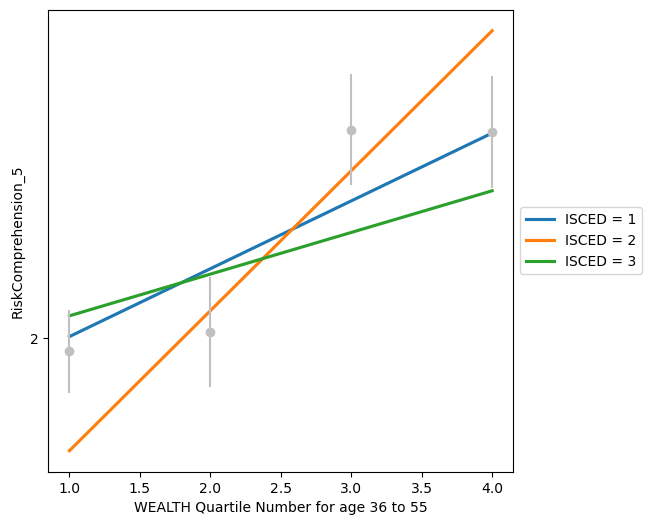

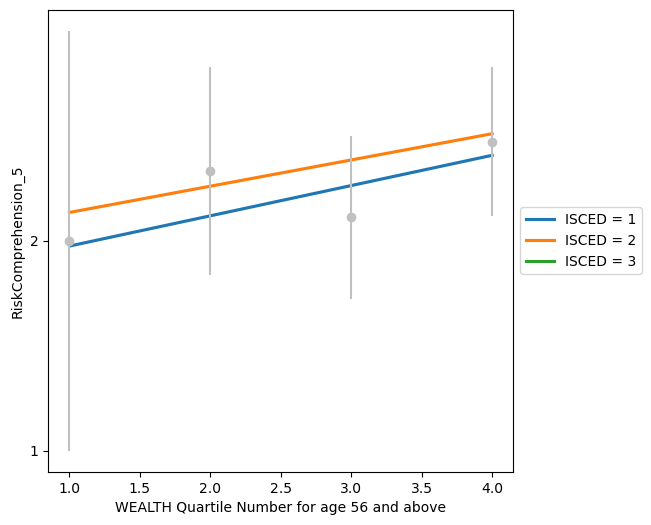

In [149]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

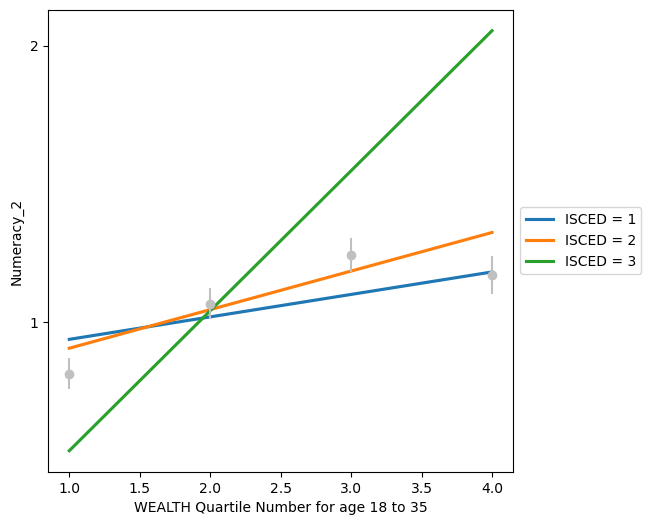

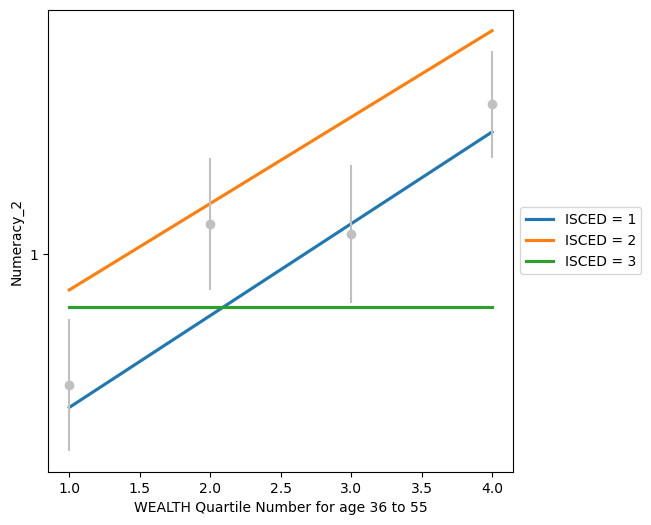

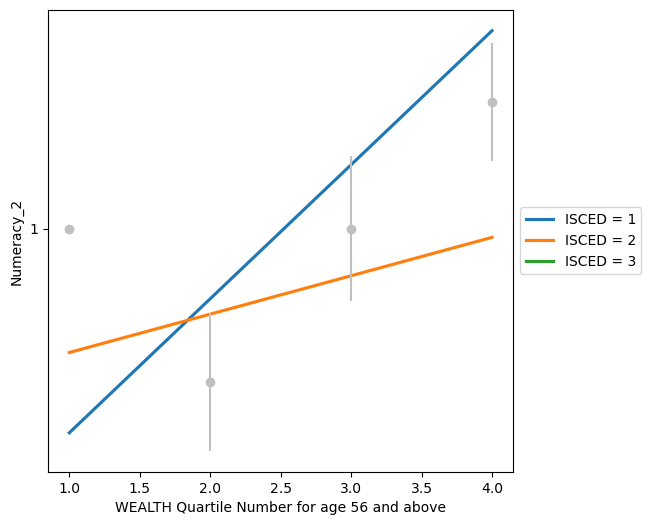

In [150]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_2', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['Numeracy_2'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_2', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['Numeracy_2'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_2', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['Numeracy_2'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

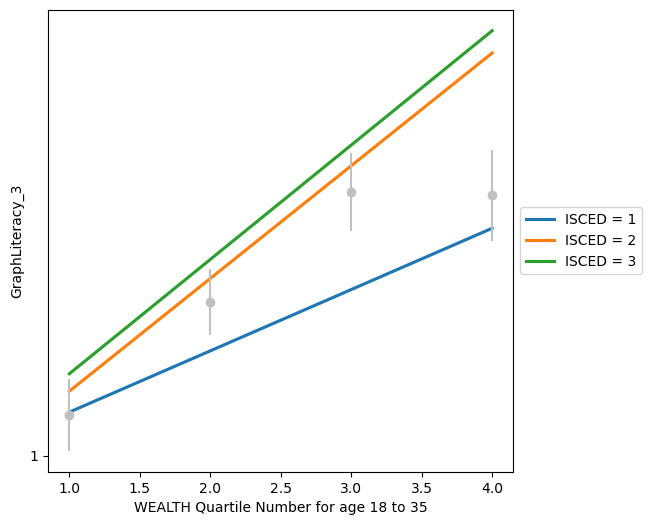

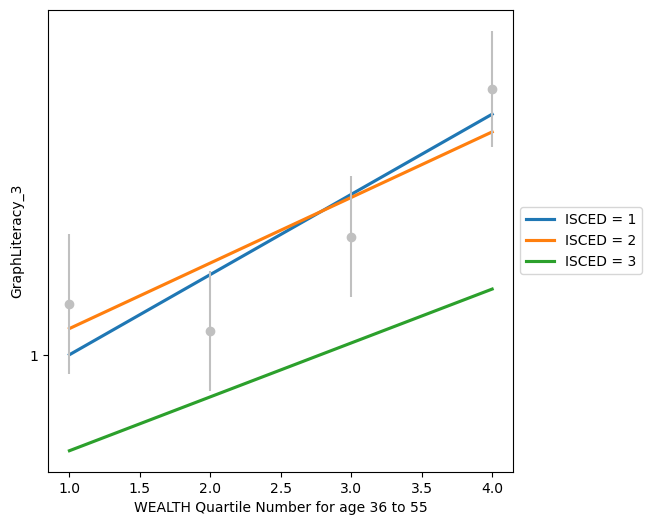

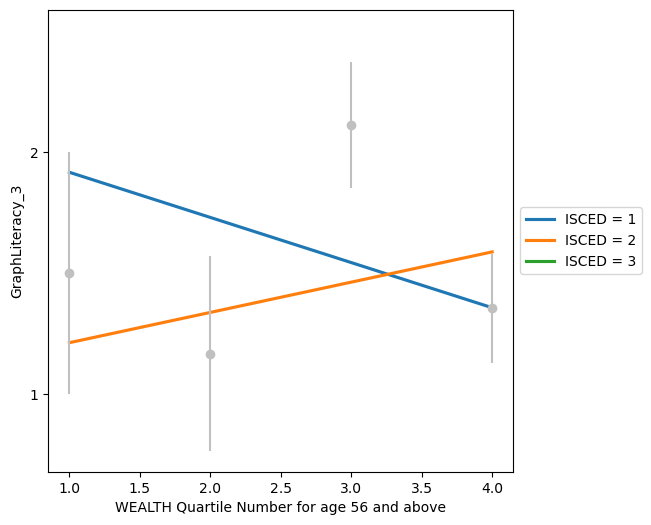

In [151]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

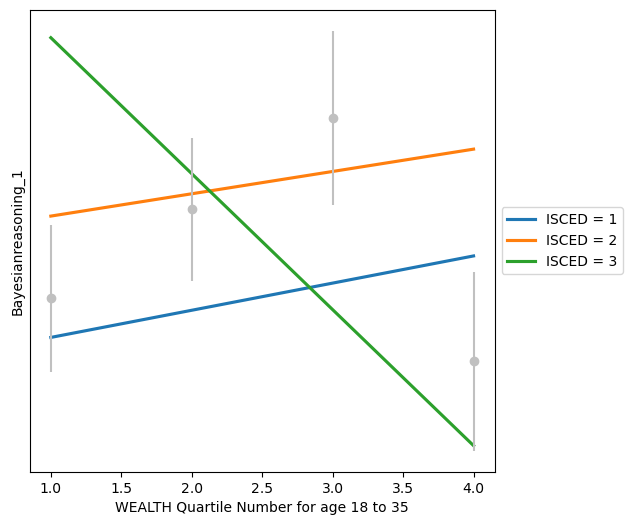

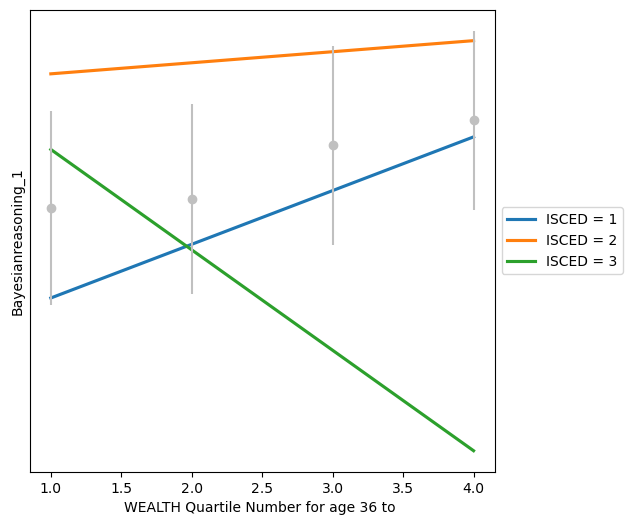

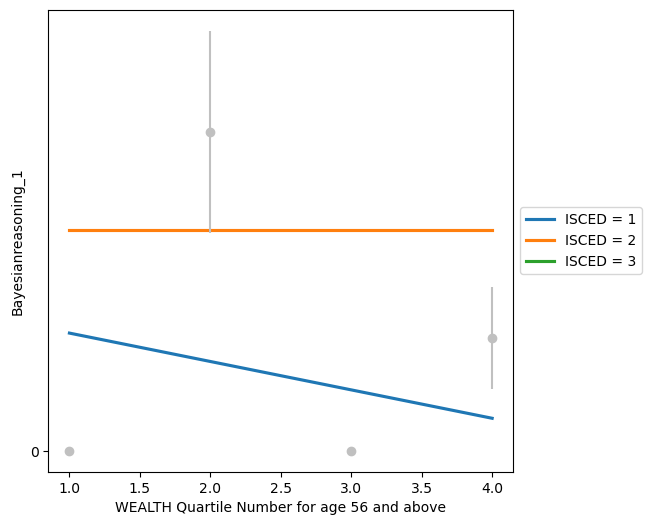

In [152]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for age 36 to ',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [153]:
# Age mean method
# Age_mean

In [154]:
age_m = df2["age"].median()
age_m

30.5

In [155]:
df4["Quartile Number"].value_counts()

Quartile Number
2    296
1    255
3    242
4    220
Name: count, dtype: int64

In [156]:
df4.loc[(df4['age'] < age_m)].describe()

age     age_rec       isced      income        wealth  \
count  338.000000  338.000000  338.000000  338.000000  3.380000e+02   
mean    23.139053    1.994083    1.837278    1.825444  7.068495e+06   
std      3.331116    0.108786    0.630694    1.037432  3.523029e+07   
min     16.000000    0.000000    1.000000    1.000000  0.000000e+00   
25%     21.500000    2.000000    1.000000    1.000000  1.000000e+05   
50%     21.500000    2.000000    2.000000    2.000000  5.000000e+05   
75%     26.000000    2.000000    2.000000    2.000000  2.000000e+06   
max     30.000000    2.000000    3.000000    5.000000  5.000000e+08   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   338.000000     338.000000           338.000000       338.000000   
mean      2.970414       0.520710             2.183432         1.423077   
std       1.253723       0.659005             0.987499         0.981279   
min       0.000000       0.000000             0.000000         0.000000   
25%       2.000000       0.000000             2.000000         1.000000   
50%       4.000000       0.000000             2.000000         1.000000   
75%       4.000000       1.000000             3.000000         2.000000   
max       4.000000       2.000000             5.000000         3.000000   

       Numeracy_2  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  338.000000           338.000000   338.000000     338.000000   
mean     1.136095             0.257396    59.408284      26.035503   
std      0.800111             0.437848    25.074468      32.950263   
min      0.000000             0.000000     0.000000       0.000000   
25%      0.000000             0.000000    40.000000       0.000000   
50%      1.000000             0.000000    80.000000       0.000000   
75%      2.000000             1.000000    80.000000      50.000000   
max      2.000000             1.000000    80.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           338.000000       338.000000  338.000000           338.000000   
mean             43.668639        47.435897   56.804734            25.739645   
std              19.749987        32.709292   40.005530            43.784781   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333    0.000000             0.000000   
50%              40.000000        33.333333   50.000000             0.000000   
75%              60.000000        66.666667  100.000000           100.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_18  TotalScore_%  Quartile Number  
count     338.000000    338.000000       338.000000  
mean        8.491124     47.172913         2.071006  
std         2.547165     14.150919         1.019536  
min         2.000000     11.111111         1.000000  
25%         7.000000     38.888889         1.000000  
50%         9.000000     50.000000         2.000000  
75%        10.000000     55.555556         3.000000  
max        15.000000     83.333333         4.000000

In [157]:
df4.loc[(df4['age'] >= age_m)].describe()

age     age_rec       isced      income        wealth  \
count  675.000000  675.000000  675.000000  675.000000  6.750000e+02   
mean    37.421481    2.522963    1.391111    2.343704  1.087433e+07   
std      8.757857    0.592227    0.548462    1.127128  4.645892e+07   
min     30.500000    2.000000    1.000000    1.000000  0.000000e+00   
25%     30.500000    2.000000    1.000000    2.000000  3.775000e+05   
50%     34.000000    2.000000    1.000000    2.000000  1.500000e+06   
75%     40.500000    3.000000    2.000000    3.000000  6.000000e+06   
max     70.500000    4.000000    3.000000    5.000000  6.000000e+08   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   675.000000     675.000000           675.000000       675.000000   
mean      2.139259       0.422222             2.198519         1.247407   
std       1.275720       0.587540             1.137047         0.974210   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             1.000000         0.000000   
50%       2.000000       0.000000             2.000000         1.000000   
75%       3.000000       1.000000             3.000000         2.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_2  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  675.000000           675.000000   675.000000     675.000000   
mean     1.014815             0.202963    42.785185      21.111111   
std      0.789256             0.402503    25.514407      29.376979   
min      0.000000             0.000000     0.000000       0.000000   
25%      0.000000             0.000000    20.000000       0.000000   
50%      1.000000             0.000000    40.000000       0.000000   
75%      2.000000             0.000000    60.000000      50.000000   
max      2.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           675.000000       675.000000  675.000000           675.000000   
mean             43.970370        41.580247   50.740741            20.296296   
std              22.740942        32.473656   39.462818            40.250343   
min               0.000000         0.000000    0.000000             0.000000   
25%              20.000000         0.000000    0.000000             0.000000   
50%              40.000000        33.333333   50.000000             0.000000   
75%              60.000000        66.666667  100.000000             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_18  TotalScore_%  Quartile Number  
count     675.000000    675.000000       675.000000  
mean        7.225185     40.139918         2.597037  
std         2.611255     14.506972         1.078791  
min         0.000000      0.000000         1.000000  
25%         5.000000     27.777778         2.000000  
50%         7.000000     38.888889         3.000000  
75%         9.000000     50.000000         4.000000  
max        15.000000     83.333333         4.000000

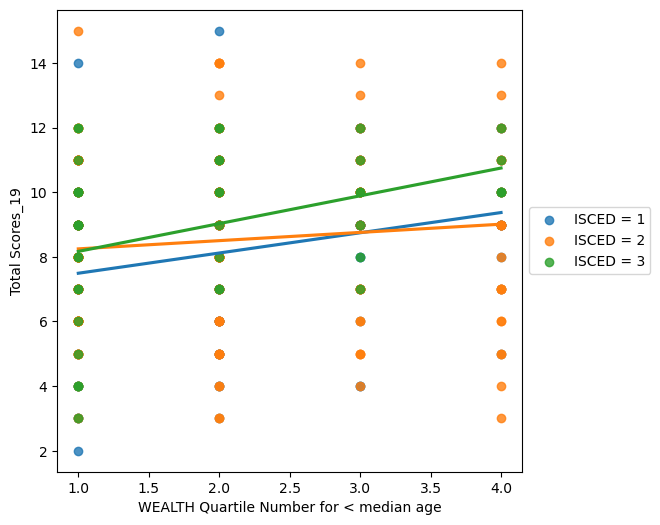

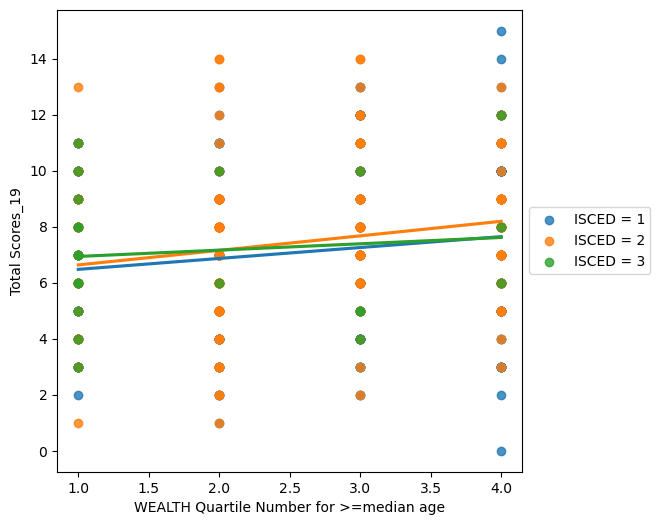

In [158]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age'] >= age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

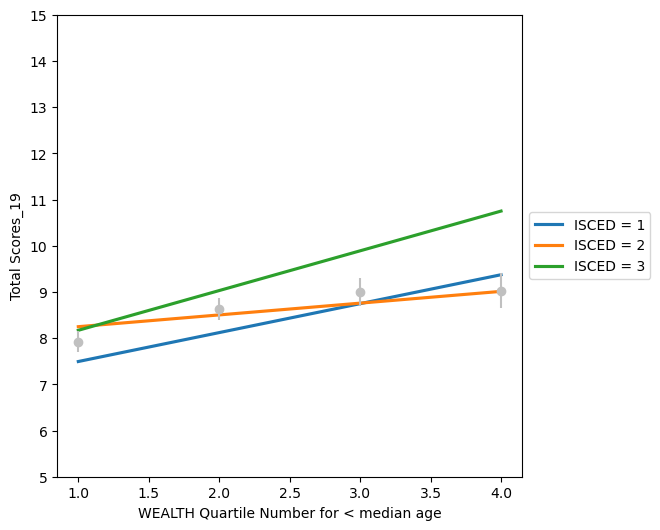

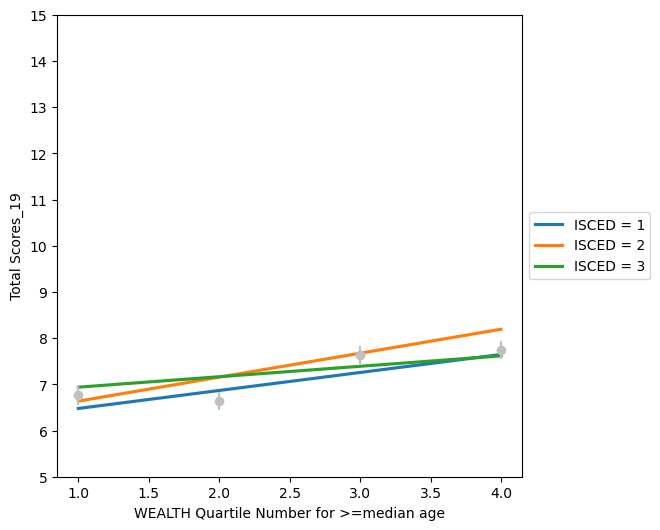

In [159]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['TotalScore_18'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['TotalScore_18'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['TotalScore_18'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['TotalScore_18'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

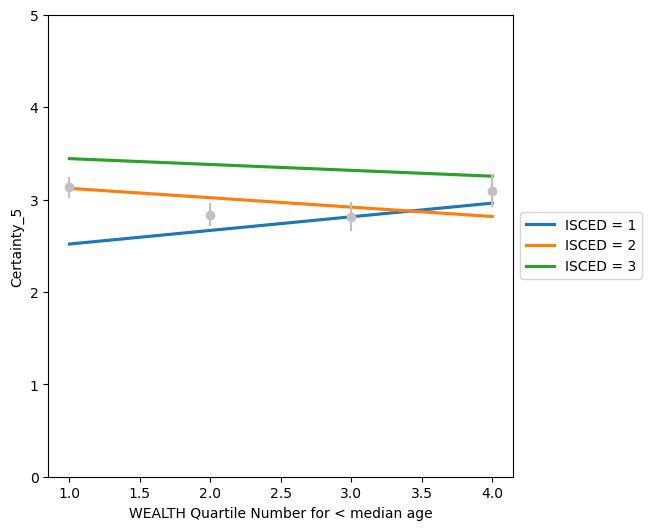

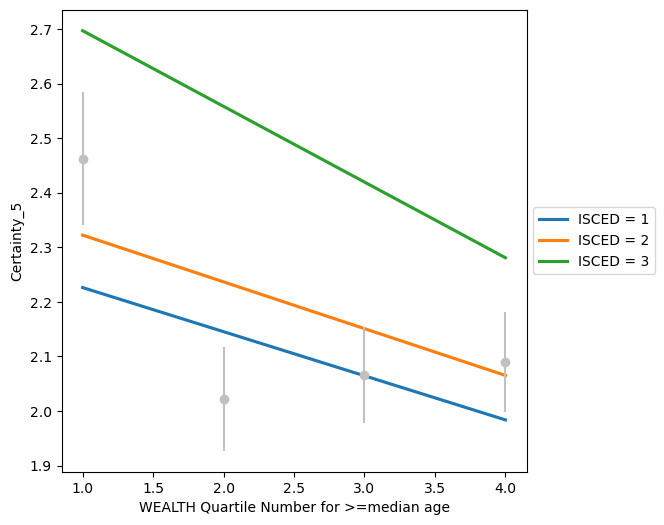

In [160]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

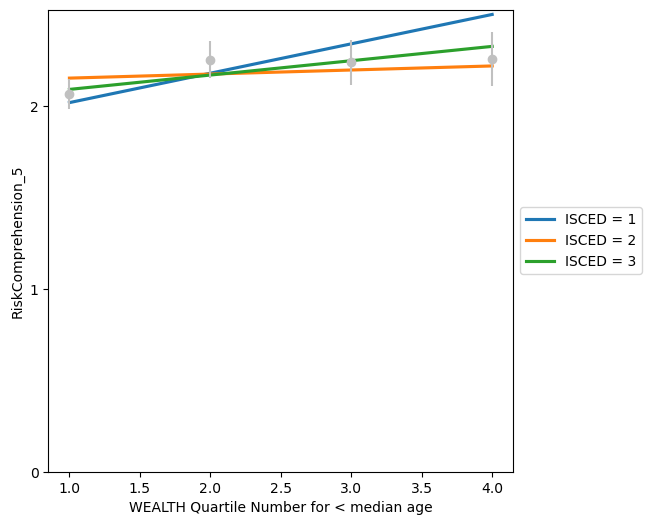

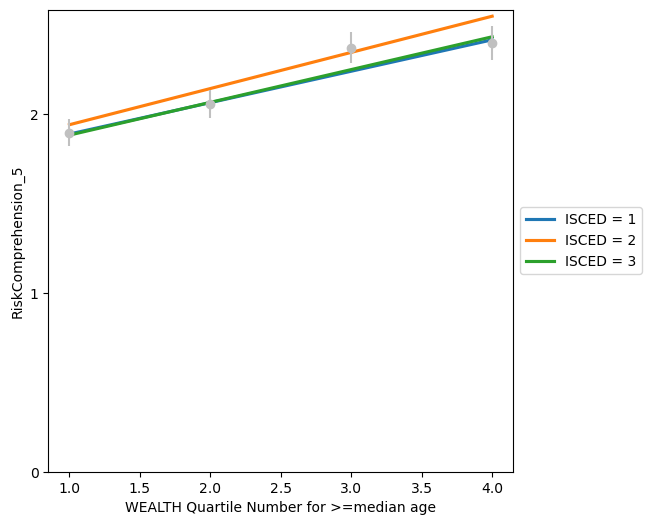

In [161]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

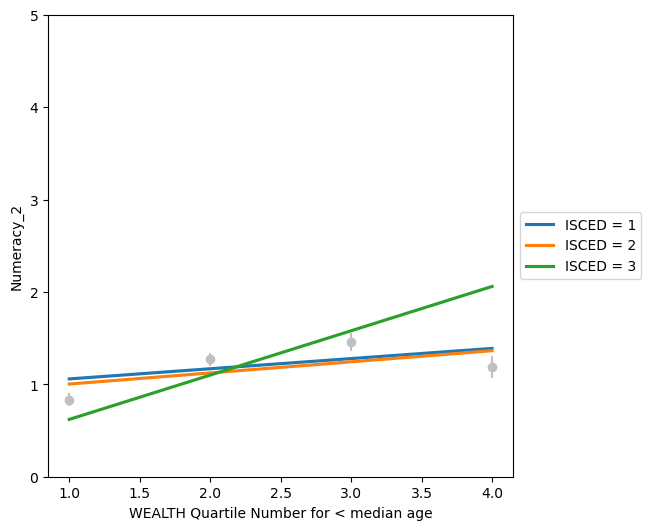

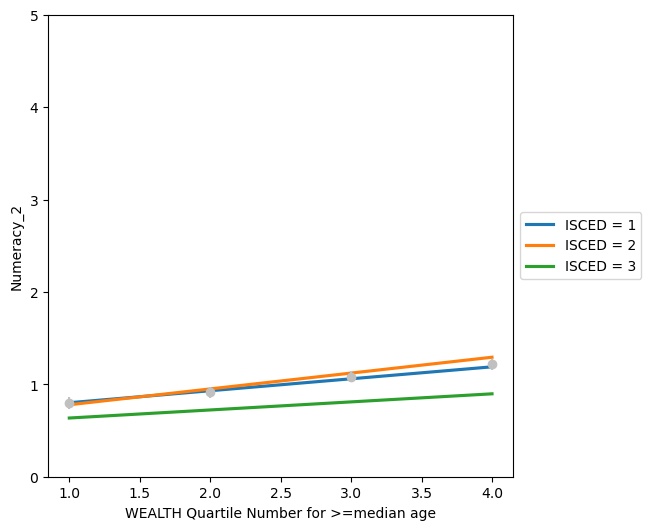

In [162]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['Numeracy_2'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_2', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['Numeracy_2'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['Numeracy_2'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['Numeracy_2'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_2', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

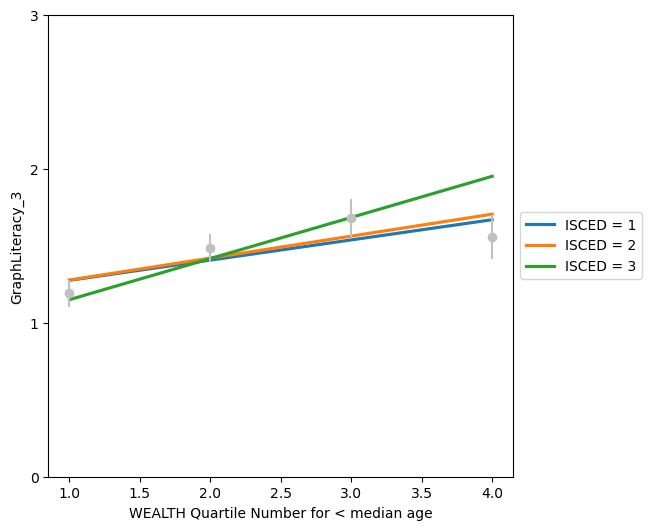

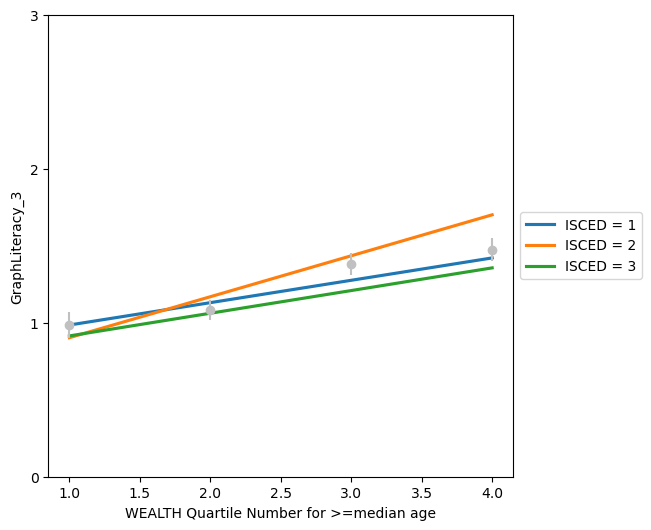

In [163]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

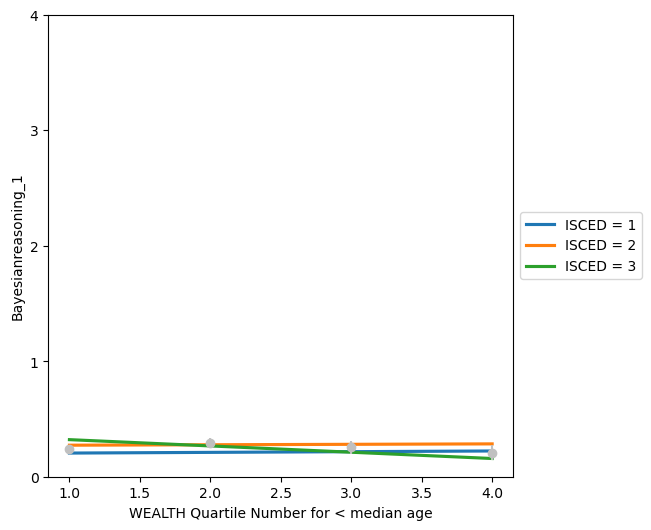

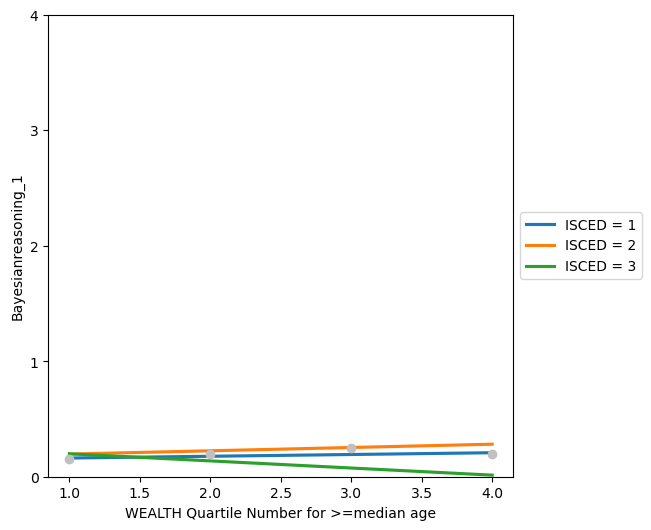

In [164]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()